In [182]:
# import libraries
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [183]:
# load the train and test dataset
train = pd.read_csv("/kaggle/input/bluechip-summit-credit-worthiness-prediction/Train.csv")
test = pd.read_csv("/kaggle/input/bluechip-summit-credit-worthiness-prediction/Test.csv")
sub = pd.read_csv("/kaggle/input/bluechip-summit-credit-worthiness-prediction/Sample Submission.csv")

In [184]:
sub.head()

,ID,Loan_Status
0,70607,NaN
1,58412,NaN
2,88755,NaN
3,97271,NaN
4,70478,NaN


In [185]:
sub.rename(columns={'Loan_Status': 'Target'}, inplace=True)

In [186]:
sub.head()

,ID,Target
0,70607,NaN
1,58412,NaN
2,88755,NaN
3,97271,NaN
4,70478,NaN


In [187]:
# make a copy of original data
# so that even if we have to make any changes in these datasets we would not lose the original datasets

train_original = train.copy()
test_original = test.copy()
# data = train.copy()



train_df = train.copy()
test_df= test.copy()
# data = train.copy()


In [188]:
#check for duplicate
duplicate = train[train['Loan_ID'].duplicated()]
duplicate

,ID,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
2,70497,LP002231,0,0,0,0,0,4989,314.472511,17,348,1,0,0,6000
4,33964,LP002231,1,1,1,0,0,8059,0.000000,17,372,1,0,1,3750
8,69254,LP001385,1,1,1,1,0,15965,0.000000,17,347,1,2,1,6000
10,76014,LP002231,1,1,3+,0,0,6245,78.649436,102,371,1,1,1,3750
11,54856,LP002585,1,1,1,0,0,16140,677.080005,17,372,1,2,1,3750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5893,65288,LP002560,0,1,0,0,0,1297,3293.124489,17,373,1,1,1,3750
5894,86963,LP002585,1,1,0,0,0,7358,0.000000,17,365,1,2,1,3547
5895,69407,LP002175,1,1,2,0,0,150,0.000000,170,353,1,1,1,3750
5896,82002,LP002560,1,0,0,0,0,2230,0.000000,222,367,1,2,0,3750


In [189]:
train.duplicated().sum(),test.duplicated().sum()
# no duplicate

(0, 0)

In [190]:
#

In [191]:
# take a look at the top 5 rows of the train set, notice the column "Loan_Status"
train.head()

,ID,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,74768,LP002231,1,1,0,1,0,8328,0.000000,17,363,1,2,1,6000
1,79428,LP001448,1,1,0,0,0,150,3857.458782,188,370,1,1,0,6000
2,70497,LP002231,0,0,0,0,0,4989,314.472511,17,348,1,0,0,6000
3,87480,LP001385,1,1,0,0,0,150,0.000000,232,359,1,1,1,3750
4,33964,LP002231,1,1,1,0,0,8059,0.000000,17,372,1,0,1,3750


In [192]:
train['ID'].value_counts()

ID
74768    1
52017    1
66995    1
67421    1
26778    1
        ..
55061    1
57095    1
53863    1
73654    1
84112    1
Name: count, Length: 5898, dtype: int64

In [193]:
train['Loan_ID'].value_counts()[:20]

Loan_ID
LP002585    767
LP002187    740
LP002231    718
LP002175    463
LP002224    364
LP002560    364
LP001790    107
LP002582    105
LP001385    105
LP002181     94
LP002571     75
LP001778     74
LP001369     74
LP002229     54
LP001844     52
LP002170     51
LP001448     51
LP002556     46
LP002180     41
LP001384     37
Name: count, dtype: int64

In [194]:
# take a look at the top 5 rows of the test set, notice the absense of "Loan_Status" that we will predict
test.head()

,ID,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Total_Income
0,70607,LP002560,1,1,0,1,0,15890,871.075952,188,371,1,1,6000
1,58412,LP001379,1,1,0,0,1,6582,896.718887,17,373,0,1,6000
2,88755,LP002560,0,0,0,0,0,7869,572.900354,17,373,1,1,6000
3,97271,LP002560,1,1,0,0,0,150,0.000000,247,349,1,2,6000
4,70478,LP002231,1,1,0,0,0,8362,0.000000,17,12,1,2,3750


In [195]:
# show the shape of the dataset i.e. no of rows, no of columns
train.shape, test.shape

((5898, 15), (2528, 14))

In [196]:
# calculate train-test-split ratio
train.shape[0]/(train.shape[0]+test.shape[0]), test.shape[0]/(train.shape[0]+test.shape[0])

(0.6999762639449324, 0.30002373605506766)

In [197]:
# take a look at the features (i.e. independent variables) in the dataset
train.columns, test.columns

(Index(['ID', 'Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
        'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
        'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
        'Total_Income'],
       dtype='object'),
 Index(['ID', 'Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
        'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
        'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Total_Income'],
       dtype='object'))

In [198]:
# show the data types for each column of the train set
train.dtypes

ID                     int64
Loan_ID               object
Gender                 int64
Married                int64
Dependents            object
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount             int64
Loan_Amount_Term       int64
Credit_History         int64
Property_Area          int64
Loan_Status            int64
Total_Income           int64
dtype: object

In [199]:
# concise summary of the dataset, info about index dtype, column dtypes, non-null values and memory usage
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5898 entries, 0 to 5897
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 5898 non-null   int64  
 1   Loan_ID            5898 non-null   object 
 2   Gender             5898 non-null   int64  
 3   Married            5898 non-null   int64  
 4   Dependents         5898 non-null   object 
 5   Education          5898 non-null   int64  
 6   Self_Employed      5898 non-null   int64  
 7   ApplicantIncome    5898 non-null   int64  
 8   CoapplicantIncome  5898 non-null   float64
 9   LoanAmount         5898 non-null   int64  
 10  Loan_Amount_Term   5898 non-null   int64  
 11  Credit_History     5898 non-null   int64  
 12  Property_Area      5898 non-null   int64  
 13  Loan_Status        5898 non-null   int64  
 14  Total_Income       5898 non-null   int64  
dtypes: float64(1), int64(12), object(2)
memory usage: 691.3+ KB


# Univaiate Analysis

In [200]:
# frequency table of a variable will give us the count of each category in that variable
train['Loan_Status'].value_counts()

Loan_Status
1    4913
0     985
Name: count, dtype: int64

In [201]:
# percentage distribution can be calculated by setting the normalize=True to show proportions instead of number 
train['Loan_Status'].value_counts(normalize=True)

Loan_Status
1    0.832994
0    0.167006
Name: proportion, dtype: float64

<Axes: xlabel='Loan_Status'>

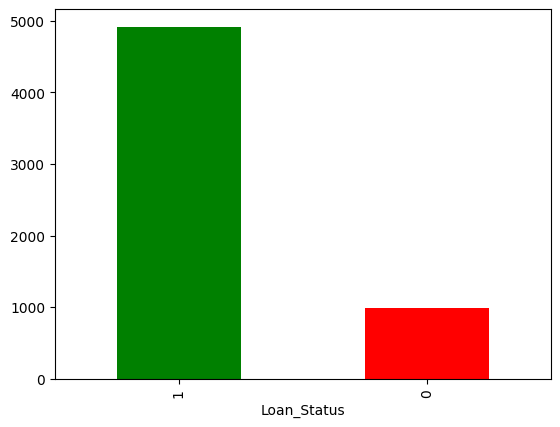

In [202]:
# bar plot to visualize the frequency
train['Loan_Status'].value_counts().plot.bar(color=['green', 'red'])

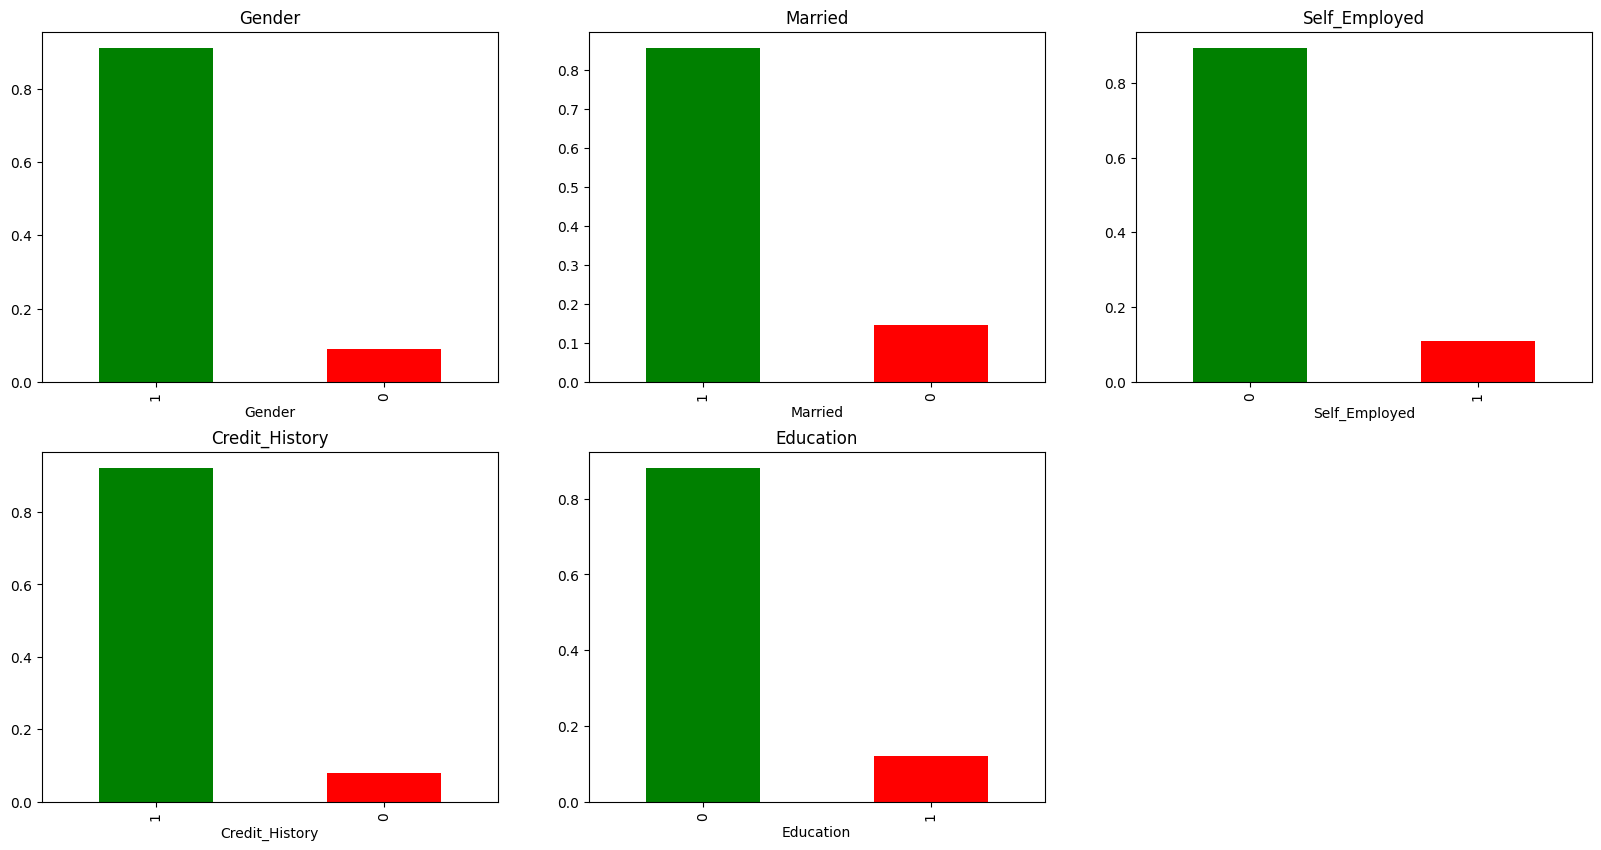

In [203]:
# Visualizing categorical features
# plt.figure(1)
plt.subplot(231)
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Gender',color=['green', 'red'])

plt.subplot(232)
train['Married'].value_counts(normalize=True).plot.bar(title= 'Married',color=['green', 'red'])

plt.subplot(233)
train['Self_Employed'].value_counts(normalize=True).plot.bar(title= 'Self_Employed',color=['green', 'red'])

plt.subplot(234)
train['Credit_History'].value_counts(normalize=True).plot.bar(title= 'Credit_History',color=['green', 'red'])

plt.subplot(235)
train['Education'].value_counts(normalize=True).plot.bar(title= 'Education',color=['green', 'red'])

plt.show()

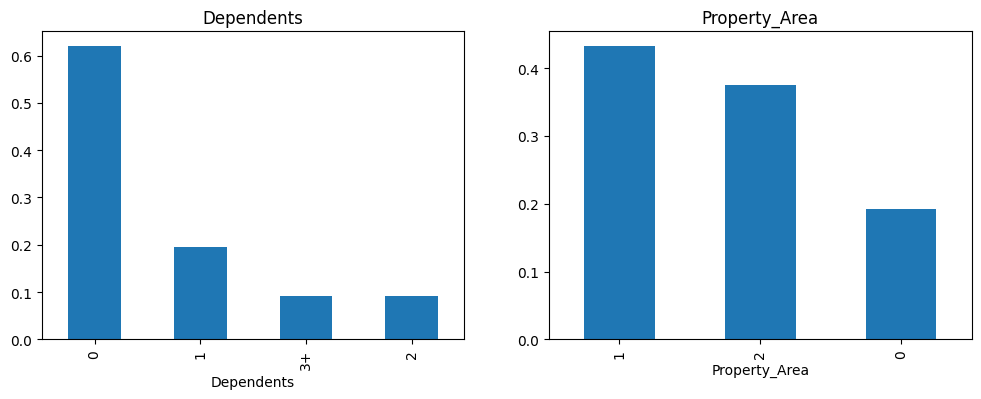

In [204]:
# Visualizing remaining categorical features
# plt.figure(1)
plt.subplot(121)
train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(12,4), title= 'Dependents')

plt.subplot(122)
train['Property_Area'].value_counts(normalize=True).plot.bar(title= 'Property_Area')

plt.show()

#### Numerical

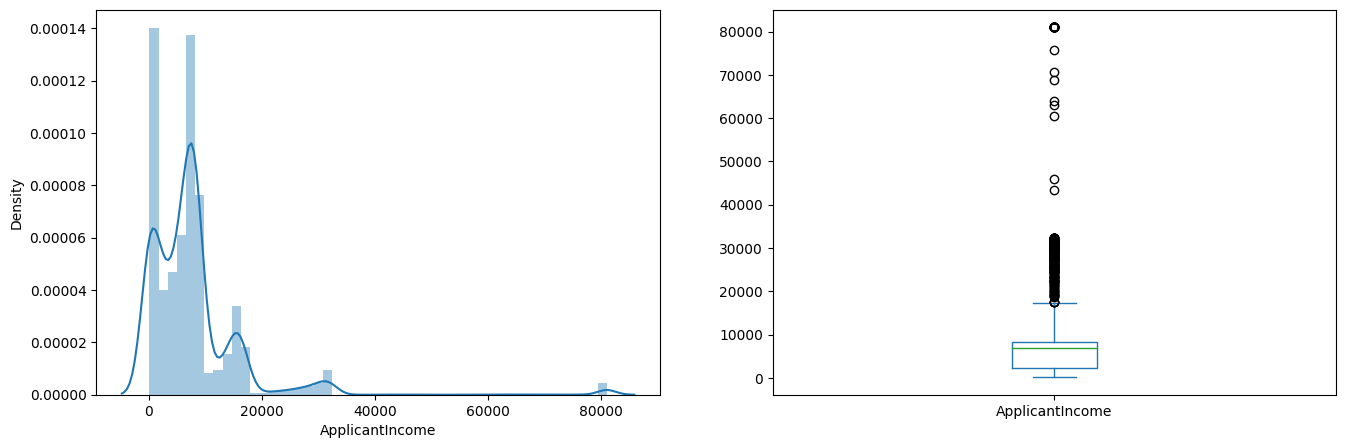

In [205]:
# Visualizing ApplicantIncome
# plt.figure(1)
plt.subplot(121)
sns.distplot(train['ApplicantIncome']);

plt.subplot(122)
train['ApplicantIncome'].plot.box(figsize=(16,5))

plt.show()

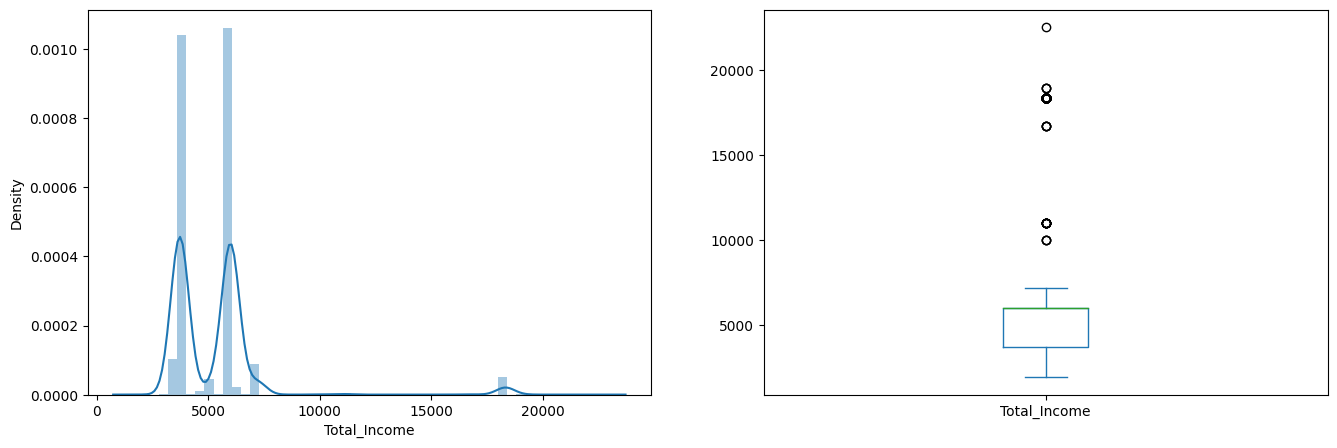

In [206]:
# Visualizing ApplicantIncome
# plt.figure(1)
plt.subplot(121)
sns.distplot(train['Total_Income']);

plt.subplot(122)
train['Total_Income'].plot.box(figsize=(16,5))

plt.show()

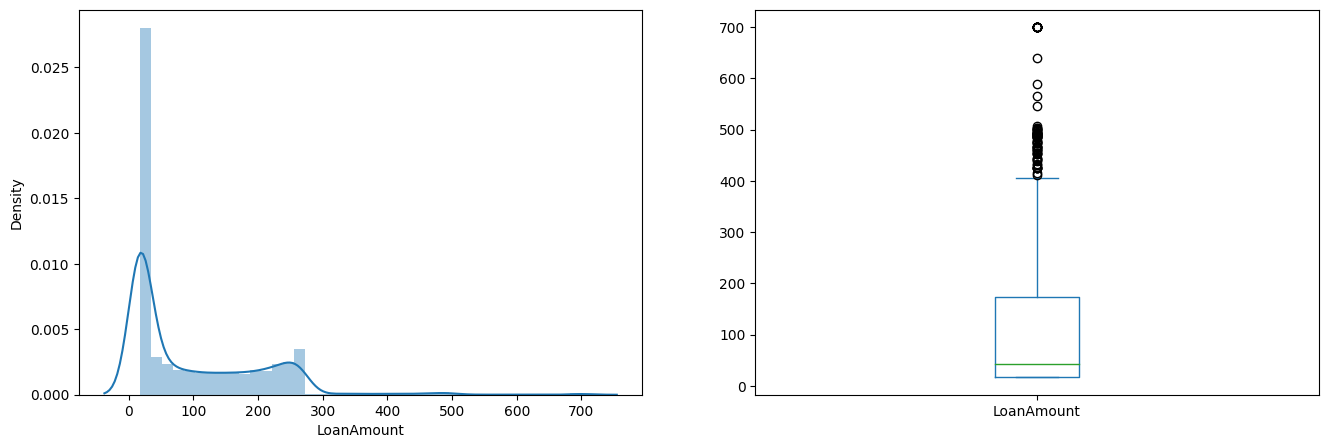

In [207]:
# Visualizing ApplicantIncome
# plt.figure(1)
plt.subplot(121)
sns.distplot(train['LoanAmount']);

plt.subplot(122)
train['LoanAmount'].plot.box(figsize=(16,5))

plt.show()

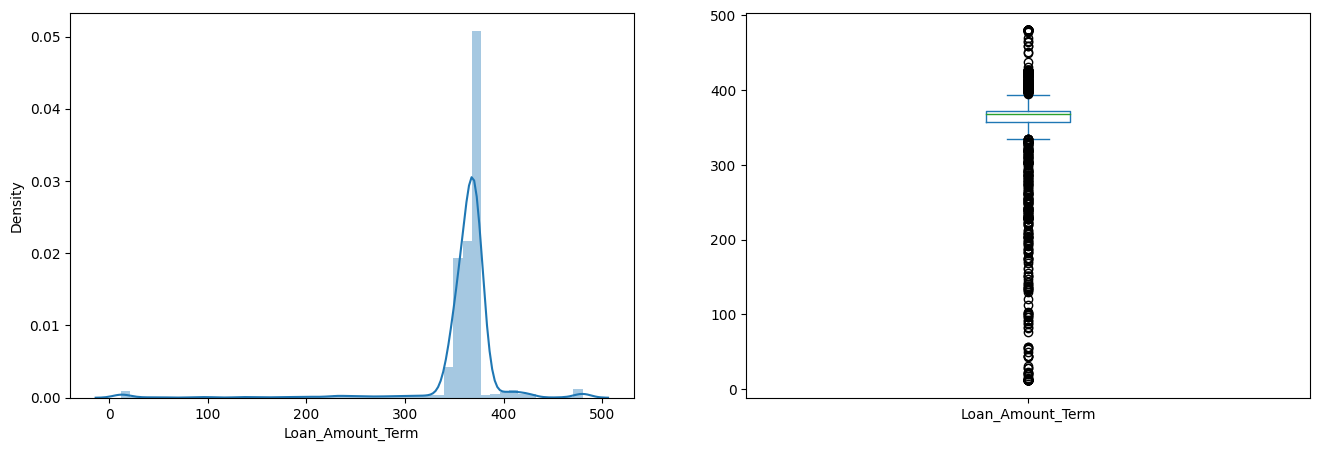

In [208]:
# Visualizing ApplicantIncome
# plt.figure(1)
plt.subplot(121)
sns.distplot(train['Loan_Amount_Term']);

plt.subplot(122)
train['Loan_Amount_Term'].plot.box(figsize=(16,5))

plt.show()

In [209]:
# frequency table of a variable will give us the count of each category in that variable
train['Loan_Amount_Term'].value_counts()

Loan_Amount_Term
372    856
373    666
371    473
370    323
369    240
      ... 
222      1
175      1
279      1
300      1
310      1
Name: count, Length: 259, dtype: int64

In [210]:
# frequency table of a variable will give us the count of each category in that variable
train['Loan_Amount_Term'].value_counts()

Loan_Amount_Term
372    856
373    666
371    473
370    323
369    240
      ... 
222      1
175      1
279      1
300      1
310      1
Name: count, Length: 259, dtype: int64

In [211]:
# # plot bar chart
# train['Loan_Amount_Term'].value_counts(normalize=True).plot.bar(title= 'Loan_Amount_Term')

In [212]:
#Treating outliers
def get_Upper_LOwer_range(data,col):
    lower_range=0
    upper_range=0
    Q3=np.quantile(data[col],0.75)
    Q1=np.quantile(data[col],0.25)
    IQR=Q3-Q1
    lower_range =Q1 -1.5*IQR
    upper_range=Q3 + 1.5*IQR
    return upper_range, lower_range

In [213]:
get_Upper_LOwer_range(train,'ApplicantIncome')

(17424.125, -6706.875)

In [214]:
# Calculate statistics
median_income = train['ApplicantIncome'].median()
q1 = train['ApplicantIncome'].quantile(0.25)  # First quartile
q3 = train['ApplicantIncome'].quantile(0.75)  # Third quartile
iqr = q3 - q1  # Interquartile range

# Define upper and lower ranges (e.g., 1.5 * IQR rule)
lower_range = q1 - 1.5 * iqr
upper_range = q3 + 1.5 * iqr

# Replace values greater than the upper range with the median
train['ApplicantIncome'] = train['ApplicantIncome'].apply(
    lambda x: median_income if x > upper_range else x
)

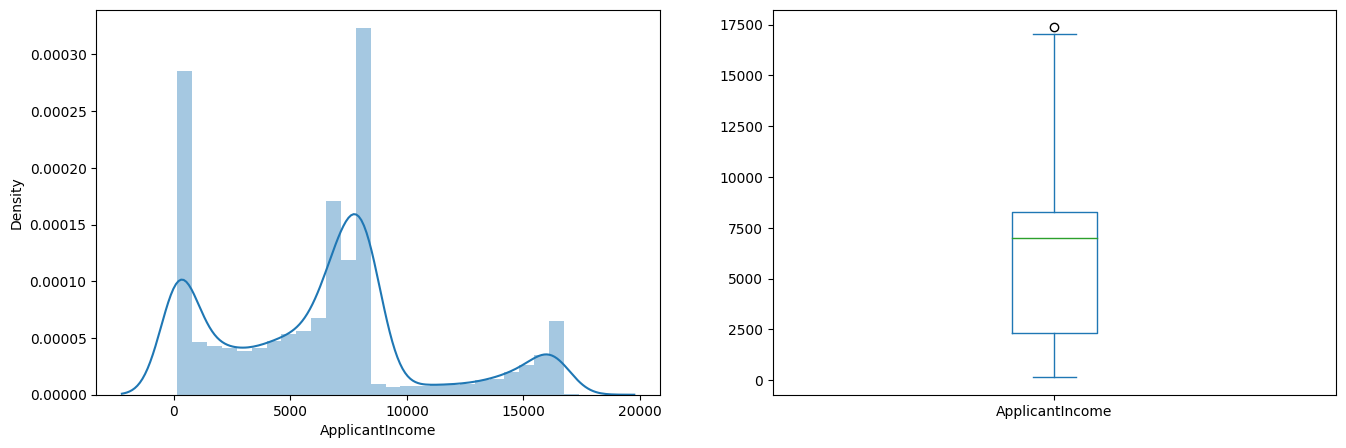

In [215]:
# Visualizing ApplicantIncome
# plt.figure(1)
plt.subplot(121)
sns.distplot(train['ApplicantIncome']);

plt.subplot(122)
train['ApplicantIncome'].plot.box(figsize=(16,5))

plt.show()

In [216]:
# Calculate statistics
median_income = train['LoanAmount'].median()
q1 = train['LoanAmount'].quantile(0.25)  # First quartile
q3 = train['LoanAmount'].quantile(0.75)  # Third quartile
iqr = q3 - q1  # Interquartile range

# Define upper and lower ranges (e.g., 1.5 * IQR rule)
lower_range = q1 - 1.5 * iqr
upper_range = q3 + 1.5 * iqr

# Replace values greater than the upper range with the median
train['LoanAmount'] = train['LoanAmount'].apply(
    lambda x: median_income if x > upper_range else x
)

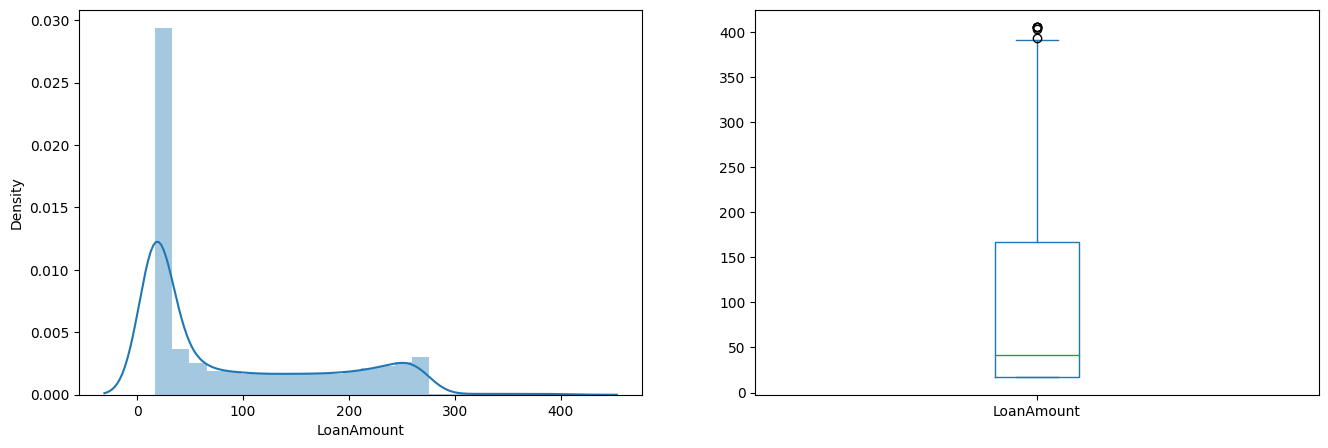

In [217]:
# Visualizing ApplicantIncome
# plt.figure(1)
plt.subplot(121)
sns.distplot(train['LoanAmount']);

plt.subplot(122)
train['LoanAmount'].plot.box(figsize=(16,5))

plt.show()

# Bivariate Analysis

<Axes: xlabel='Loan_Status', ylabel='count'>

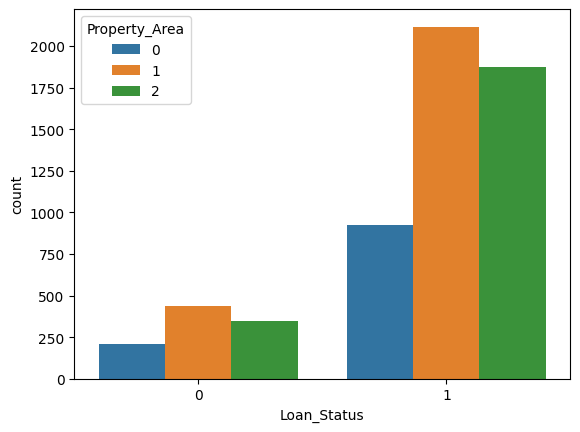

In [218]:
sns.countplot(data=train,x='Loan_Status',hue ='Property_Area')

<Axes: xlabel='Loan_Status', ylabel='count'>

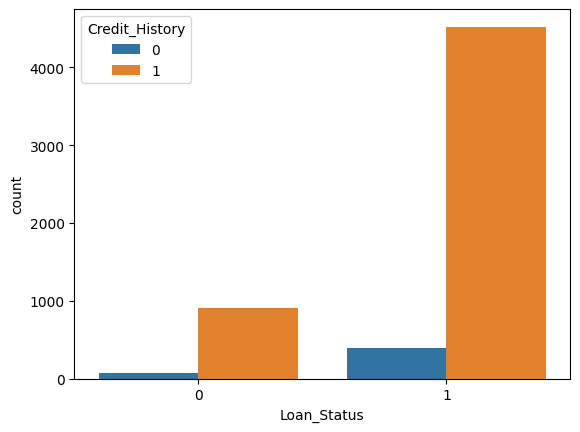

In [219]:
sns.countplot(data=train,x='Loan_Status',hue ='Credit_History')

In [220]:
# sns.countplot(data=train,x='Loan_Status',hue ='Loan_Amount_Term')

<Axes: xlabel='Loan_Status', ylabel='LoanAmount'>

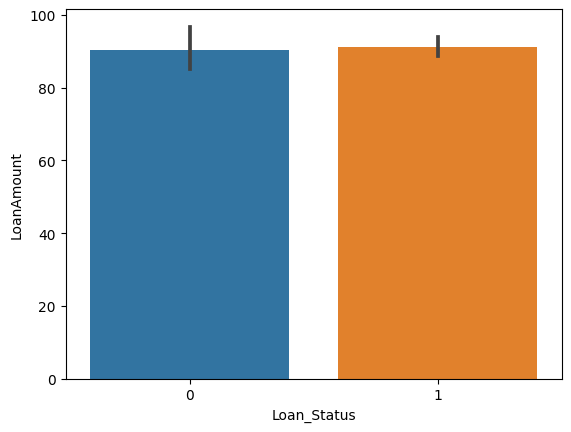

In [221]:
sns.barplot(data=train,x='Loan_Status',y ='LoanAmount')

<Axes: xlabel='Loan_Status', ylabel='CoapplicantIncome'>

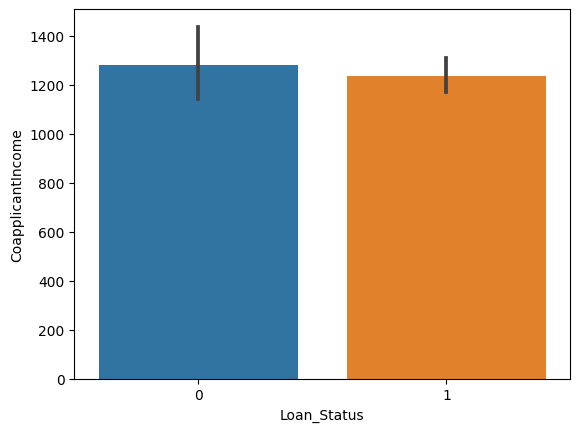

In [222]:
sns.barplot(data=train,x='Loan_Status',y ='CoapplicantIncome')

<Axes: xlabel='Loan_Status', ylabel='ApplicantIncome'>

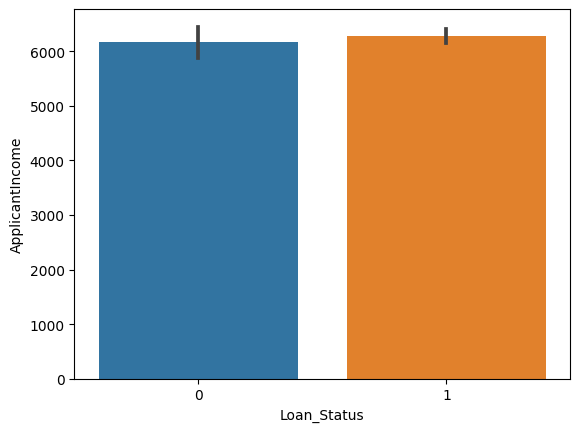

In [223]:
sns.barplot(data=train,x='Loan_Status',y='ApplicantIncome')

<Axes: xlabel='Loan_Status', ylabel='count'>

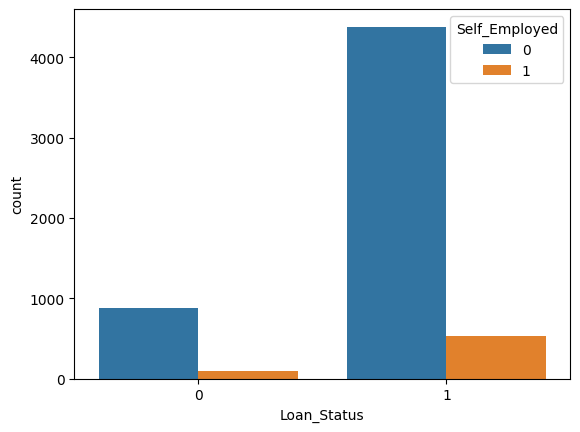

In [224]:
sns.countplot(data=train,x='Loan_Status',hue ='Self_Employed')

<Axes: xlabel='Loan_Status', ylabel='count'>

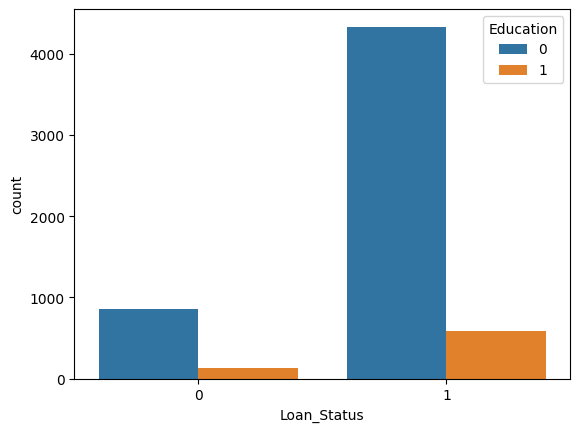

In [225]:
sns.countplot(data=train,x='Loan_Status',hue ='Education')

<Axes: xlabel='Loan_Status', ylabel='count'>

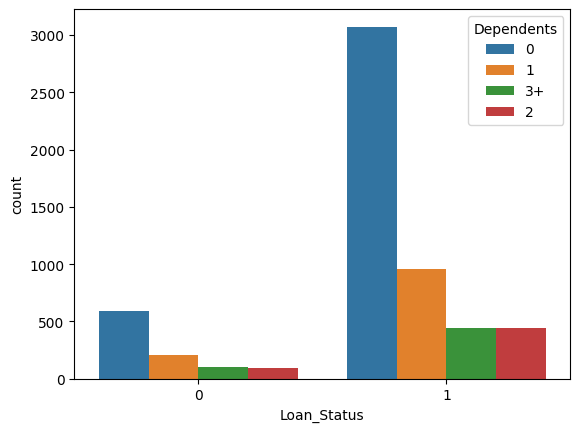

In [226]:
sns.countplot(data=train,x='Loan_Status',hue ='Dependents')

<Axes: xlabel='Loan_Status', ylabel='count'>

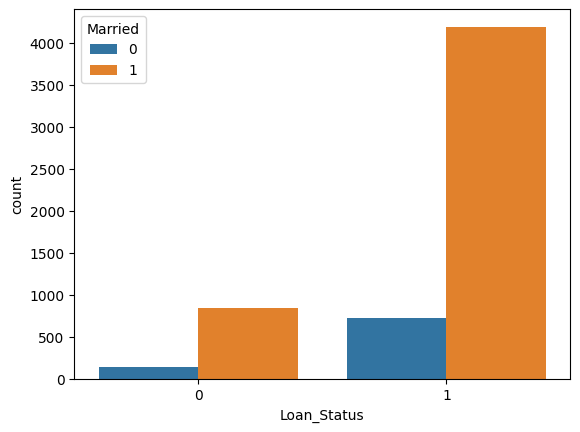

In [227]:
sns.countplot(data=train,x='Loan_Status',hue ='Married')

<Axes: xlabel='Loan_Status', ylabel='count'>

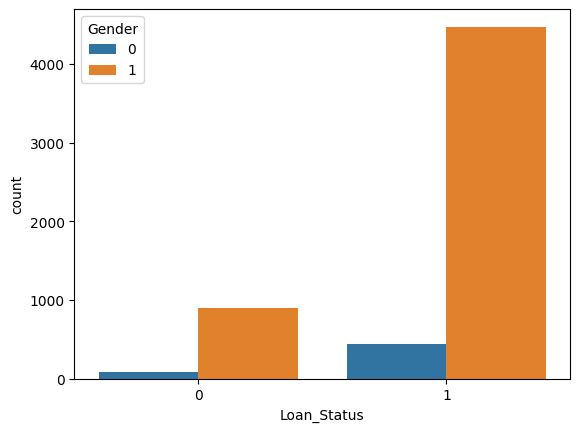

In [228]:
sns.countplot(data=train,x='Loan_Status',hue ='Gender')

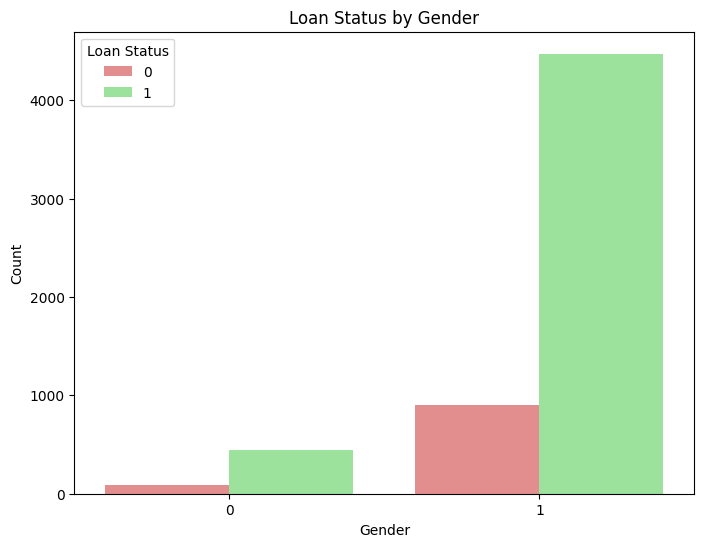

In [229]:

palette = {1: 'lightgreen', 0: 'lightcoral'}

# Create the countplot
plt.figure(figsize=(8, 6))
sns.countplot(data=train, x='Gender', hue='Loan_Status', palette=palette, dodge=True)

# Customize the plot
plt.title('Loan Status by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Loan Status')

plt.show()

<Figure size 1000x600 with 0 Axes>

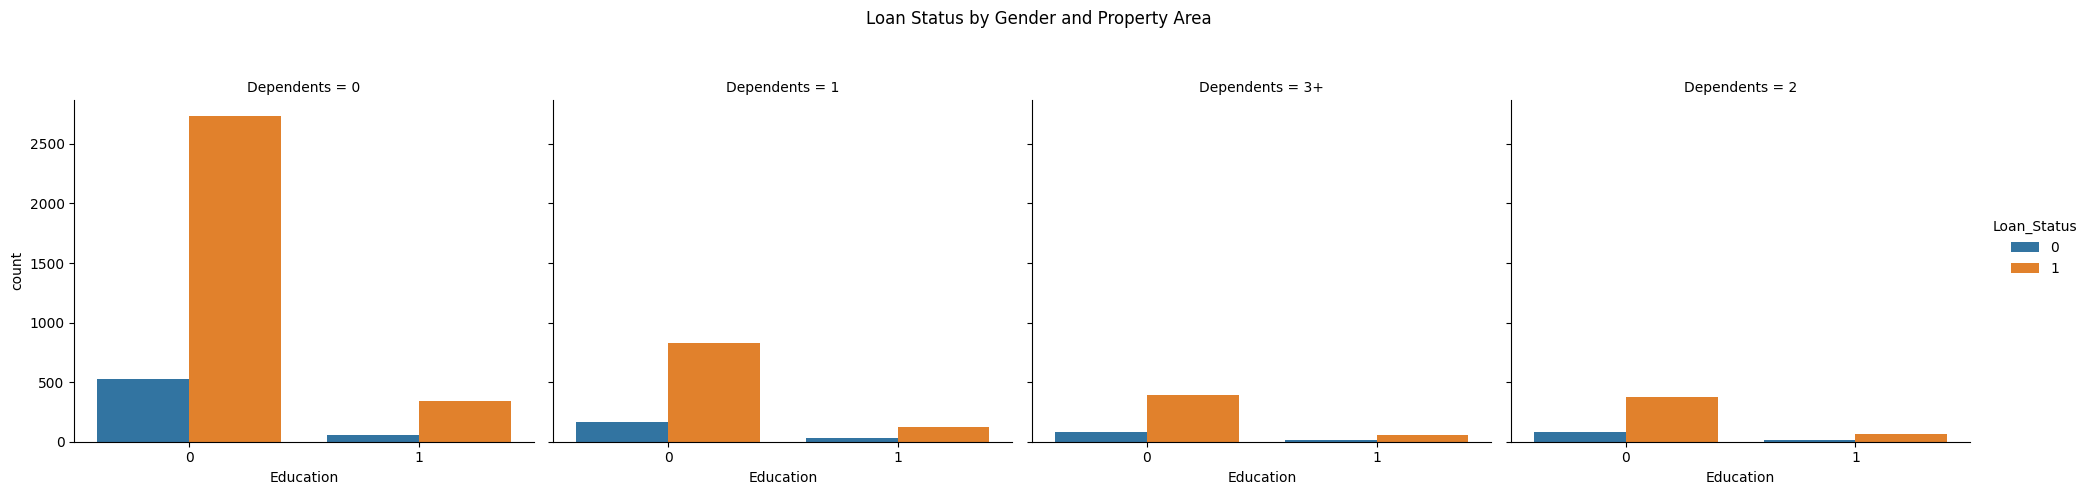

In [230]:
# Grouped bar plot with three categories
plt.figure(figsize=(10, 6))
sns.catplot(data=train, x='Education', hue='Loan_Status', col='Dependents', kind='count', height=5, aspect=1)

# Customize plot
plt.subplots_adjust(top=0.8)
plt.suptitle('Loan Status by Gender and Property Area')
plt.show()

<Figure size 1000x600 with 0 Axes>

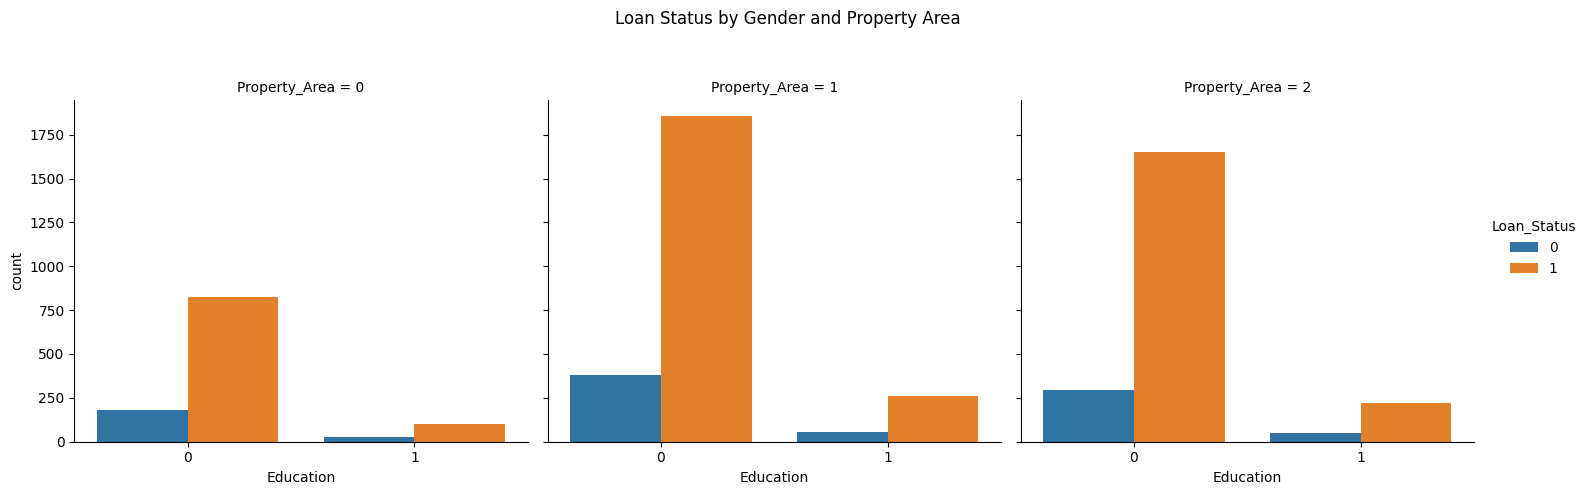

In [231]:
# Grouped bar plot with three categories
plt.figure(figsize=(10, 6))
sns.catplot(data=train, x='Education', hue='Loan_Status', col='Property_Area', kind='count', height=5, aspect=1)

# Customize plot
plt.subplots_adjust(top=0.8)
plt.suptitle('Loan Status by Gender and Property Area')
plt.show()

In [232]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5898 entries, 0 to 5897
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 5898 non-null   int64  
 1   Loan_ID            5898 non-null   object 
 2   Gender             5898 non-null   int64  
 3   Married            5898 non-null   int64  
 4   Dependents         5898 non-null   object 
 5   Education          5898 non-null   int64  
 6   Self_Employed      5898 non-null   int64  
 7   ApplicantIncome    5898 non-null   float64
 8   CoapplicantIncome  5898 non-null   float64
 9   LoanAmount         5898 non-null   float64
 10  Loan_Amount_Term   5898 non-null   int64  
 11  Credit_History     5898 non-null   int64  
 12  Property_Area      5898 non-null   int64  
 13  Loan_Status        5898 non-null   int64  
 14  Total_Income       5898 non-null   int64  
dtypes: float64(3), int64(10), object(2)
memory usage: 691.3+ KB


### Numerical classification for Ordinal Categorical Feature

In [233]:

# # Define the ranking for each category
# #Train
# ranking = {'0': 2, '1': 1, '2': 0, '3+': 0}

# # Apply ranking to create binary columns
# for category, rank in ranking.items():
#     train[f'dependents_{category}'] = (train['Dependents'] == category).astype(int) * rank




In [234]:

# # Define the ranking for each category
# #Test
# ranking = {'0': 2, '1': 1, '2': 0, '3+': 0}

# # Apply ranking to create binary columns
# for category, rank in ranking.items():
#     test[f'dependents_{category}'] = (test['Dependents'] == category).astype(int) * rank




In [235]:
test.head()

,ID,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Total_Income
0,70607,LP002560,1,1,0,1,0,15890,871.075952,188,371,1,1,6000
1,58412,LP001379,1,1,0,0,1,6582,896.718887,17,373,0,1,6000
2,88755,LP002560,0,0,0,0,0,7869,572.900354,17,373,1,1,6000
3,97271,LP002560,1,1,0,0,0,150,0.000000,247,349,1,2,6000
4,70478,LP002231,1,1,0,0,0,8362,0.000000,17,12,1,2,3750


### Subsetting the Columns

In [236]:
train.columns

Index(['ID', 'Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'Total_Income'],
      dtype='object')

In [237]:
# test= test[['Gender', 'Married', 'Education',
#        'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
#        'Loan_Amount_Term', 'Credit_History', 'Property_Area',
#        'Total_Income', 'dependents_0', 'dependents_1', 'dependents_2',
#        'dependents_3+']]


In [238]:
# take a look at the train set
train.head(8)

,ID,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,74768,LP002231,1,1,0,1,0,8328.0,0.000000,17.0,363,1,2,1,6000
1,79428,LP001448,1,1,0,0,0,150.0,3857.458782,188.0,370,1,1,0,6000
2,70497,LP002231,0,0,0,0,0,4989.0,314.472511,17.0,348,1,0,0,6000
3,87480,LP001385,1,1,0,0,0,150.0,0.000000,232.0,359,1,1,1,3750
4,33964,LP002231,1,1,1,0,0,8059.0,0.000000,17.0,372,1,0,1,3750
5,20364,LP001778,0,1,0,0,0,1911.0,4145.477647,65.0,373,1,2,1,6000
6,63354,LP002180,1,1,3+,0,0,7121.0,926.791025,17.0,425,1,1,1,6000
7,67110,LP002585,1,1,1,0,0,3417.0,647.162564,17.0,366,1,0,1,6000


In [239]:
train.describe()

,ID,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
count,5898.000000,5898.000000,5898.000000,5898.000000,5898.000000,5898.000000,5898.000000,5898.000000,5898.000000,5898.000000,5898.000000,5898.000000,5898.000000
mean,54964.183452,0.910817,0.854527,0.120210,0.107664,6261.801119,1245.954548,91.129366,359.114954,0.920482,1.183961,0.832994,5239.284503
std,26133.640949,0.285032,0.352607,0.325235,0.309981,4508.035961,2368.012349,90.932839,48.876088,0.270569,0.730568,0.373013,2308.679455
min,10002.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,17.000000,12.000000,0.000000,0.000000,0.000000,1963.000000
25%,32337.000000,1.000000,1.000000,0.000000,0.000000,2342.250000,0.000000,17.000000,357.000000,1.000000,1.000000,1.000000,3750.000000
50%,55501.000000,1.000000,1.000000,0.000000,0.000000,6988.000000,117.562275,42.000000,368.000000,1.000000,1.000000,1.000000,6000.000000
75%,77775.750000,1.000000,1.000000,0.000000,0.000000,8267.750000,1680.894542,167.000000,372.000000,1.000000,2.000000,1.000000,6000.000000
max,99998.000000,1.000000,1.000000,1.000000,1.000000,17376.000000,20000.000000,405.000000,480.000000,1.000000,2.000000,1.000000,22500.000000


In [240]:
test.head()

,ID,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Total_Income
0,70607,LP002560,1,1,0,1,0,15890,871.075952,188,371,1,1,6000
1,58412,LP001379,1,1,0,0,1,6582,896.718887,17,373,0,1,6000
2,88755,LP002560,0,0,0,0,0,7869,572.900354,17,373,1,1,6000
3,97271,LP002560,1,1,0,0,0,150,0.000000,247,349,1,2,6000
4,70478,LP002231,1,1,0,0,0,8362,0.000000,17,12,1,2,3750


In [241]:
test.columns

Index(['ID', 'Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Total_Income'],
      dtype='object')

In [242]:
import pandas as pd
from sklearn.model_selection import KFold

# # Target encoding function
# def target_encode(df, column, target, smooth=1):
#     # Calculate the global mean of the target
#     global_mean = df[target].mean()

#     # Calculate mean of target for each category and the count of each category
#     category_stats = df.groupby(column)[target].agg(['mean', 'count'])
    
#     # Apply smoothing
#     category_stats['smoothed'] = (category_stats['mean'] * category_stats['count'] + global_mean * smooth) / (category_stats['count'] + smooth)
    
#     # Map the smoothed value back to the column in the DataFrame
#     return df[column].map(category_stats['smoothed'])

# # Apply target encoding to the 'Category' column
# train['Total_Income_bin'] = target_encode(train, column='Total_Income_bin', target='Loan_Status')

# # # Display the result
# # print(df[['Category', 'Target', 'Category_encoded']])


In [243]:
# # Target Encoding

# def encode_ordinal(df, column, target):
#     """
#     Encodes a categorical column into ordinal values based on the mean of the target variable.
#     """
#     ordered_labels = df.groupby([column])[target].mean().sort_values().index
#     ordinal_label = {k: i for i, k in enumerate(ordered_labels, 0)}
#     return df[column].map(ordinal_label)

# #categorical_columns = ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus',"OverTime"]
# categorical_columns = ['Total_Income_bin']


# for col in categorical_columns:
#     train[f'{col}_ordered'] = encode_ordinal(train, col, 'Loan_Status')

In [244]:
# # Target Encoding

# def encode_ordinal(df, column, target):
#     """
#     Encodes a categorical column into ordinal values based on the mean of the target variable.
#     """
#     ordered_labels = df.groupby([column])[target].mean().sort_values().index
#     ordinal_label = {k: i for i, k in enumerate(ordered_labels, 0)}
#     return df[column].map(ordinal_label)

# #categorical_columns = ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus',"OverTime"]
# categorical_columns = ['Total_Income_bin']


# for col in categorical_columns:
#     test[f'{col}_ordered'] = encode_ordinal(train, col, 'Loan_Status')

In [245]:
train.head()

,ID,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,74768,LP002231,1,1,0,1,0,8328.0,0.000000,17.0,363,1,2,1,6000
1,79428,LP001448,1,1,0,0,0,150.0,3857.458782,188.0,370,1,1,0,6000
2,70497,LP002231,0,0,0,0,0,4989.0,314.472511,17.0,348,1,0,0,6000
3,87480,LP001385,1,1,0,0,0,150.0,0.000000,232.0,359,1,1,1,3750
4,33964,LP002231,1,1,1,0,0,8059.0,0.000000,17.0,372,1,0,1,3750


In [246]:
test.head()

,ID,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Total_Income
0,70607,LP002560,1,1,0,1,0,15890,871.075952,188,371,1,1,6000
1,58412,LP001379,1,1,0,0,1,6582,896.718887,17,373,0,1,6000
2,88755,LP002560,0,0,0,0,0,7869,572.900354,17,373,1,1,6000
3,97271,LP002560,1,1,0,0,0,150,0.000000,247,349,1,2,6000
4,70478,LP002231,1,1,0,0,0,8362,0.000000,17,12,1,2,3750


In [247]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5898 entries, 0 to 5897
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 5898 non-null   int64  
 1   Loan_ID            5898 non-null   object 
 2   Gender             5898 non-null   int64  
 3   Married            5898 non-null   int64  
 4   Dependents         5898 non-null   object 
 5   Education          5898 non-null   int64  
 6   Self_Employed      5898 non-null   int64  
 7   ApplicantIncome    5898 non-null   float64
 8   CoapplicantIncome  5898 non-null   float64
 9   LoanAmount         5898 non-null   float64
 10  Loan_Amount_Term   5898 non-null   int64  
 11  Credit_History     5898 non-null   int64  
 12  Property_Area      5898 non-null   int64  
 13  Loan_Status        5898 non-null   int64  
 14  Total_Income       5898 non-null   int64  
dtypes: float64(3), int64(10), object(2)
memory usage: 691.3+ KB


## Feature Engineering

In [248]:
train['DTI'] = train['LoanAmount']/(train['ApplicantIncome'] +train['CoapplicantIncome'])
train['ITR'] = (train['ApplicantIncome']+train['CoapplicantIncome'])/train['LoanAmount']
train['LTE'] = train['LoanAmount']/train['Loan_Amount_Term']


test['DTI'] = test['LoanAmount']/(test['ApplicantIncome'] +test['CoapplicantIncome'])
test['ITR'] = (test['ApplicantIncome']+test['CoapplicantIncome'])/test['LoanAmount']
test['LTE'] = test['LoanAmount']/test['Loan_Amount_Term']

Text(0.5, 1.0, 'Test')

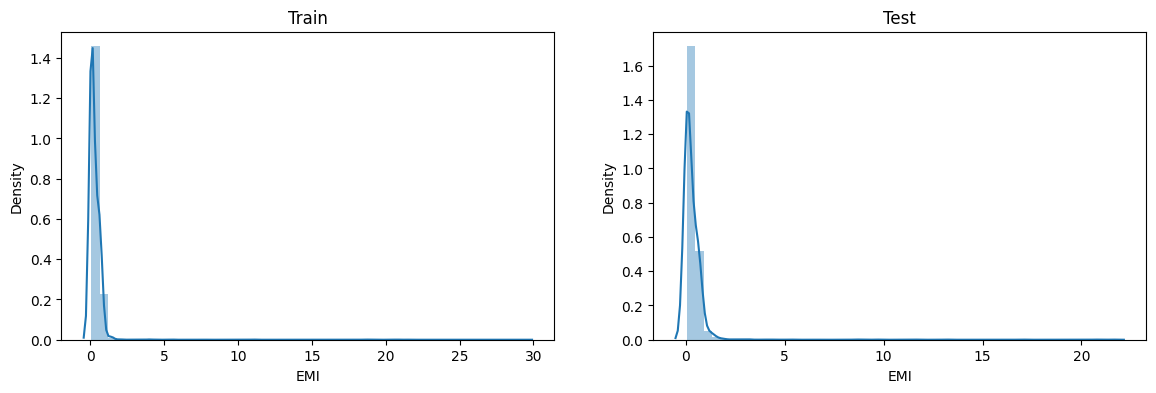

In [249]:
# create EMI feature
train['EMI'] = train['LoanAmount'] / train['Loan_Amount_Term']
test['EMI'] = test['LoanAmount'] / test['Loan_Amount_Term']
train['Total_Income_2'] = train['ApplicantIncome'] + train['CoapplicantIncome']
test['Total_Income_2'] = train['ApplicantIncome']+ test['CoapplicantIncome']
train['Net_Income'] = train['Total_Income'] - train['EMI']
test['Net_Income'] = train['Total_Income'] - test['EMI']
#Let’s check the distribution of EMI variable. EMI is a continuous numerical variable.

# check the distribution of EMI

fig = plt.figure(figsize=(14, 4))
ax1 = plt.subplot(121)
sns.distplot(train['EMI'])
ax1.set_title("Train")

ax1 = plt.subplot(122)
sns.distplot(test['EMI'])
ax1.set_title("Test")

Text(0.5, 1.0, 'Train')

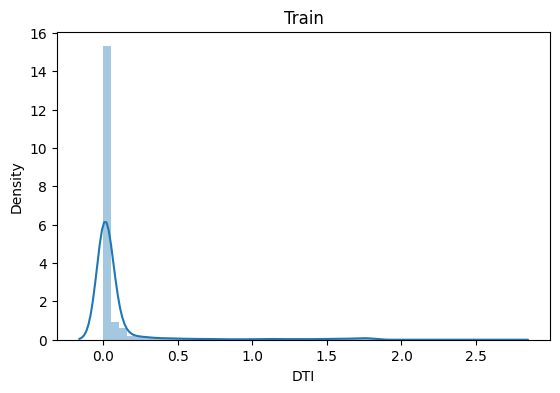

In [250]:

fig = plt.figure(figsize=(14, 4))
ax1 = plt.subplot(121)
sns.distplot(train['DTI'])
ax1.set_title("Train")

Text(0.5, 1.0, 'Test')

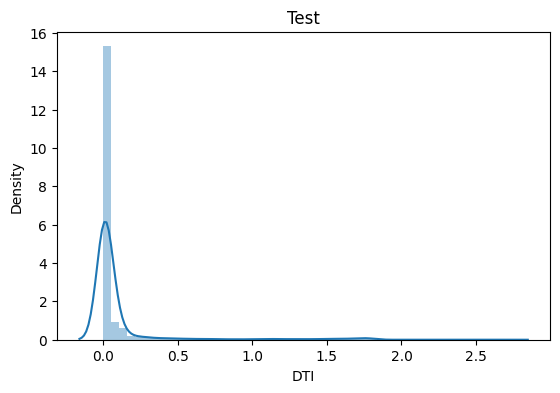

In [251]:

fig = plt.figure(figsize=(14, 4))
ax1 = plt.subplot(121)
sns.distplot(train['DTI'])
ax1.set_title("Test")

In [252]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5898 entries, 0 to 5897
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 5898 non-null   int64  
 1   Loan_ID            5898 non-null   object 
 2   Gender             5898 non-null   int64  
 3   Married            5898 non-null   int64  
 4   Dependents         5898 non-null   object 
 5   Education          5898 non-null   int64  
 6   Self_Employed      5898 non-null   int64  
 7   ApplicantIncome    5898 non-null   float64
 8   CoapplicantIncome  5898 non-null   float64
 9   LoanAmount         5898 non-null   float64
 10  Loan_Amount_Term   5898 non-null   int64  
 11  Credit_History     5898 non-null   int64  
 12  Property_Area      5898 non-null   int64  
 13  Loan_Status        5898 non-null   int64  
 14  Total_Income       5898 non-null   int64  
 15  DTI                5898 non-null   float64
 16  ITR                5898 

In [253]:
# import pandas as pd
# import numpy as np

# # def engineer_30_features(df):
# #     """Engineers 30 new features for loan application data."""

# #     # # 1. Total Income
#     # df['Total_Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']

#     # 2. Loan Amount to Total Income Ratio
#     # df['Loan_Amount_to_Total_Income_Ratio'] = df['LoanAmount'] / df['Total_Income']

#     # # 3. Applicant Income to Loan Amount Ratio
#     # df['Applicant_Income_to_Loan_Amount_Ratio'] = df['ApplicantIncome'] / df['LoanAmount']

#     # # 4. Coapplicant Income to Loan Amount Ratio
#     # df['Coapplicant_Income_to_Loan_Amount_Ratio'] = df['CoapplicantIncome'] / df['LoanAmount']

#     # 5. Log of Total Income
#     df['Log_Total_Income'] = np.log1p(df['Total_Income'])

#     # 6. Log of Loan Amount
#    df ['Log_LoanAmount'] = np.log1p(df['LoanAmount'])

#     # 7. Income per Dependent
#     df['Income_per_Dependent'] = df['Total_Income'] / (df['Dependents'].replace({'3+': 3}).astype(float) + 1)

#     # 8. Has Co-applicant
#     df['Has_Coapplicant'] = df['CoapplicantIncome'].apply(lambda x: 1 if x > 0 else 0)

#     # 9. Loan Term in Years
#     df['Loan_Term_Years'] = df['Loan_Amount_Term'] / 12

#     # 10. Income Stability (Combined ratio)
#     df['Income_Stability'] = df['Applicant_Income_to_Loan_Amount_Ratio'] + df['Coapplicant_Income_to_Loan_Amount_Ratio']

#     # --- Features based on ratios and logs ---
#     # 11. Log of Applicant Income to Loan Amount Ratio
#     df['Log_Applicant_Income_to_Loan_Amount_Ratio'] = np.log1p(df['Applicant_Income_to_Loan_Amount_Ratio'])

#     # 12. Log of Coapplicant Income to Loan Amount Ratio
#     df['Log_Coapplicant_Income_to_Loan_Amount_Ratio'] = np.log1p(df['Coapplicant_Income_to_Loan_Amount_Ratio'])

#     # 13. Log of Income per Dependent
#     df['Log_Income_per_Dependent'] = np.log1p(df['Income_per_Dependent'])

#     # 14. Square of Log Total Income
#     df['Sq_Log_Total_Income'] = df['Log_Total_Income'] ** 2

#     # 15. Square of Log Loan Amount
#     df['Sq_Log_LoanAmount'] = df['Log_LoanAmount'] ** 2


#     # --- Adding Squared root transformations
#     df['Sqrt_Total_Income'] = np.sqrt(df['Total_Income'])
#     df['Sqrt_LoanAmount'] = np.sqrt(df['LoanAmount'])
#     df['Sqrt_ApplicantIncome'] = np.sqrt(df['ApplicantIncome'])
#     df['Sqrt_CoapplicantIncome'] = np.sqrt(df['CoapplicantIncome'])

#     # --- Combined Features ---
#     df['Combined_Income_Loan'] = df['Total_Income'] * df['LoanAmount']
#     df['Combined_Income_Term'] = df['Total_Income'] * df['Loan_Amount_Term']
#     df['Combined_Loan_Term'] = df['LoanAmount'] * df['Loan_Amount_Term']
#     df['Combined_Income_Loan_Term'] = df['Total_Income'] * df['LoanAmount'] * df['Loan_Amount_Term']

#     # --- Dummy Variables for Categorical Features ---
#     categorical_cols = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area']
#     df = pd.get_dummies(df, columns=categorical_cols, dummy_na=True, prefix=categorical_cols)



#     #--- Dependents ---
#     df['Dependents'] = df['Dependents'].replace({'3+': 3}).astype(float)
#     df = pd.get_dummies(df, columns=['Dependents'], dummy_na=True, prefix='Dependents')

#     df['Credit_History'] = df['Credit_History'].astype(float) # Ensure Credit_History is numeric
    


#     return df

In [254]:
# Apply Label Encoding
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# 
train['Dependents'] = label_encoder.fit_transform(train['Dependents'])


In [255]:
test['Dependents'] = label_encoder.fit_transform(test['Dependents'])


In [256]:
#TRAIN
train['Loan_Amount_to_Total_Income_Ratio'] = train['LoanAmount'] / train['Total_Income']
test['Loan_Amount_to_Total_Income_Ratio'] = test['LoanAmount'] / test['Total_Income']


train['Applicant_Income_to_Loan_Amount_Ratio'] = train['ApplicantIncome'] / train['LoanAmount']
test['Applicant_Income_to_Loan_Amount_Ratio'] = test['ApplicantIncome'] / test['LoanAmount']


train['Coapplicant_Income_to_Loan_Amount_Ratio'] = train['CoapplicantIncome'] / train['LoanAmount']
test['Coapplicant_Income_to_Loan_Amount_Ratio'] = test['CoapplicantIncome'] / test['LoanAmount']

train['Log_Total_Income'] = np.log1p(train['Total_Income_2'])
test['Log_Total_Income'] = np.log1p(test['Total_Income_2'])


#TRAIN

train['Log_Total_Income'] = np.log1p(train['Total_Income'])

    # 6. Log of Loan Amount
train['Log_LoanAmount'] = np.log1p(train['LoanAmount'])

    # 7. Income per Dependent
train['Income_per_Dependent'] = train['Total_Income'] / (train['Dependents'].replace({'3+': 3}).astype(float) + 1)

    # 8. Has Co-applicant
train['Has_Coapplicant'] = train['CoapplicantIncome'].apply(lambda x: 1 if x > 0 else 0)

    # 9. Loan Term in Years
train['Loan_Term_Years'] = train['Loan_Amount_Term'] / 12

    # 10. Income Stability (Combined ratio)
train['Income_Stability'] = train['Applicant_Income_to_Loan_Amount_Ratio'] + train['Coapplicant_Income_to_Loan_Amount_Ratio']



# TEST
test['Log_Total_Income'] = np.log1p(test['Total_Income'])

    # 6. Log of Loan Amount
test['Log_LoanAmount'] = np.log1p(test['LoanAmount'])

    # 7. Income per Dependent
test['Income_per_Dependent'] = test['Total_Income'] / (train['Dependents'].replace({'3+': 3}).astype(float) + 1)

    # 8. Has Co-applicant
test['Has_Coapplicant'] = test['CoapplicantIncome'].apply(lambda x: 1 if x > 0 else 0)

    # 9. Loan Term in Years
test['Loan_Term_Years'] = test['Loan_Amount_Term'] / 12

    # 10. Income Stability (Combined ratio)
test['Income_Stability'] = test['Applicant_Income_to_Loan_Amount_Ratio'] + test['Coapplicant_Income_to_Loan_Amount_Ratio']


#TRAIN
train['Log_Applicant_Income_to_Loan_Amount_Ratio'] = np.log1p(train['Applicant_Income_to_Loan_Amount_Ratio'])

    # 12. Log of Coapplicant Income to Loan Amount Ratio
train['Log_Coapplicant_Income_to_Loan_Amount_Ratio'] = np.log1p(train['Coapplicant_Income_to_Loan_Amount_Ratio'])

    # 13. Log of Income per Dependent
train['Log_Income_per_Dependent'] = np.log1p(train['Income_per_Dependent'])


#TEST
test['Log_Applicant_Income_to_Loan_Amount_Ratio'] = np.log1p(test['Applicant_Income_to_Loan_Amount_Ratio'])

    # 12. Log of Coapplicant Income to Loan Amount Ratio
test['Log_Coapplicant_Income_to_Loan_Amount_Ratio'] = np.log1p(test['Coapplicant_Income_to_Loan_Amount_Ratio'])

    # 13. Log of Income per Dependent
test['Log_Income_per_Dependent'] = np.log1p(test['Income_per_Dependent'])

#TRAIN
 # 14. Square of Log Total Income
#train['Sq_Log_Total_Income'] = train['Log_Total_Income'] ** 2

    # 15. Square of Log Loan Amount
#train['Sq_Log_LoanAmount'] = train['Log_LoanAmount'] ** 2


    # --- Adding Squared root transformations
#train['Sqrt_Total_Income'] = np.sqrt(train['Total_Income'])
train['Sqrt_LoanAmount'] = np.sqrt(train['LoanAmount'])
train['Sqrt_ApplicantIncome'] = np.sqrt(train['ApplicantIncome'])
train['Sqrt_CoapplicantIncome'] = np.sqrt(train['CoapplicantIncome'])

#TEST

 # 14. Square of Log Total Income
#test['Sq_Log_Total_Income'] = train['Log_Total_Income'] ** 2

    # 15. Square of Log Loan Amount
#test['Sq_Log_LoanAmount'] = train['Log_LoanAmount'] ** 2


    # --- Adding Squared root transformations
#test['Sqrt_Total_Income'] = np.sqrt(test['Total_Income'])
test['Sqrt_LoanAmount'] = np.sqrt(test['LoanAmount'])
test['Sqrt_ApplicantIncome'] = np.sqrt(test['ApplicantIncome'])
test['Sqrt_CoapplicantIncome'] = np.sqrt(test['CoapplicantIncome'])

#TRAIN
# --- Combined Features ---
train['Combined_Income_Loan'] = train['Total_Income'] * train['LoanAmount']
#train['Combined_Income_Term'] = train['Total_Income'] * train['Loan_Amount_Term']
train['Combined_Loan_Term'] = train['LoanAmount'] * train['Loan_Amount_Term']
train['Combined_Income_Loan_Term'] = train['Total_Income'] * train['LoanAmount'] * train['Loan_Amount_Term']

#TEST
#TRAIN
# --- Combined Features ---
test['Combined_Income_Loan'] = test['Total_Income'] * test['LoanAmount']
#test['Combined_Income_Term'] = test['Total_Income'] * test['Loan_Amount_Term']
test['Combined_Loan_Term'] = test['LoanAmount'] * test['Loan_Amount_Term']
test['Combined_Income_Loan_Term'] = test['Total_Income'] * test['LoanAmount'] * test['Loan_Amount_Term']


In [257]:
train

,ID,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,...,Income_Stability,Log_Applicant_Income_to_Loan_Amount_Ratio,Log_Coapplicant_Income_to_Loan_Amount_Ratio,Log_Income_per_Dependent,Sqrt_LoanAmount,Sqrt_ApplicantIncome,Sqrt_CoapplicantIncome,Combined_Income_Loan,Combined_Loan_Term,Combined_Income_Loan_Term
0,74768,LP002231,1,1,0,1,0,8328.0,0.000000,17.0,...,489.882353,6.196204,0.000000,8.699681,4.123106,91.257876,0.000000,102000.0,6171.0,37026000.0
1,79428,LP001448,1,1,0,0,0,150.0,3857.458782,188.0,...,21.316270,0.586604,3.068908,8.699681,13.711309,12.247449,62.108444,1128000.0,69560.0,417360000.0
2,70497,LP002231,0,0,0,0,0,4989.0,314.472511,17.0,...,311.968971,5.685179,2.970332,8.699681,4.123106,70.632854,17.733373,102000.0,5916.0,35496000.0
3,87480,LP001385,1,1,0,0,0,150.0,0.000000,232.0,...,0.646552,0.498683,0.000000,8.229778,15.231546,12.247449,0.000000,870000.0,83288.0,312330000.0
4,33964,LP002231,1,1,1,0,0,8059.0,0.000000,17.0,...,474.058824,6.163439,0.000000,7.536897,4.123106,89.771933,0.000000,63750.0,6324.0,23715000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5893,65288,LP002560,0,1,0,0,0,1297.0,3293.124489,17.0,...,270.007323,4.347618,5.271528,8.229778,4.123106,36.013886,57.385752,63750.0,6341.0,23778750.0
5894,86963,LP002585,1,1,0,0,0,7358.0,0.000000,17.0,...,432.823529,6.072638,0.000000,8.174139,4.123106,85.778785,0.000000,60299.0,6205.0,22009135.0
5895,69407,LP002175,1,1,2,0,0,150.0,0.000000,170.0,...,0.882353,0.632523,0.000000,7.131699,13.038405,12.247449,0.000000,637500.0,60010.0,225037500.0
5896,82002,LP002560,1,0,0,0,0,2230.0,0.000000,222.0,...,10.045045,2.401982,0.000000,8.229778,14.899664,47.222876,0.000000,832500.0,81474.0,305527500.0


In [258]:


train['Loan_Amount_Term'] = train['Loan_Amount_Term'].astype(int)
test['Loan_Amount_Term'] = test['Loan_Amount_Term'].astype(int)


train['LTI_2'] = train['LoanAmount'] / train['ApplicantIncome']
test['LTI_2'] = train['LoanAmount'] / test['ApplicantIncome']


train['EMI_Ratio'] = train['EMI'] / train['ApplicantIncome']
test['EMI_Ratio'] = test['EMI'] / test['ApplicantIncome']



In [259]:

# train['Income_per_Dependent'] = train['Total_Income_2'] / 1 + train['Dependents]
# test['Income_per_Dependent'] = test['Total_Income_2'] / 1 + test['Dependents']

# train['Income_per_Dependent_1'] = train['Total_Income_2'] / train['Dependents_1.0'] 
# test['Income_per_Dependent_1'] = test['Total_Income_2'] / test['Dependents_1.0'] 

# train['Income_per_Dependent_2'] = train['Total_Income_2'] / train['Dependents_2.0'] 
# test['Income_per_Dependent_2'] = test['Total_Income_2'] / test['Dependents_2.0'] 

# train['Income_per_Dependent_3'] = train['Total_Income_2'] / train['Dependents_3.0'] 
# test['Income_per_Dependent_3'] = test['Total_Income_2'] / test['Dependents_3.0'] 


# train['Dependency_Load'] = (train['Dependents_0.0'] + train['Dependents_1.0'] ) / (train['Dependents_0.0'] + train['Dependents_1.0']  + 2)
# test['Dependency_Load'] = (test['Dependents_0.0'] + test['Dependents_1.0']) / (test['Dependents_0.0'] + test['Dependents_1.0']  + 2)



train['Adjusted_Loan_Term']= train['LoanAmount']/ train['Loan_Amount_Term']
test['Adjusted_Loan_Term']= test['LoanAmount']/ test['Loan_Amount_Term']

In [260]:
train['Affordability'] =0.5*train['DTI']+0.5*train['LTE']
test['Affordability'] =0.5*test['DTI']+0.5*test['LTE']

# train['Family_Size'] =(train['Dependents_0.0']) + 1+ (train['Married'] ==1)
# test['Family_Size'] =(test['Dependents_0.0'])+  1+ (test['Married'] ==1)

# train['Family_Size_2'] = (train['Dependents_1.0']) + 1 + (train['Married'] ==1)
# test['Family_Size_2'] =(test['Dependents_1.0']) +1 + (test['Married'] ==1)

# train['Family_Size_3'] = (train['Dependents_3.0']) + 1 + (train['Married'] ==1)
# test['Family_Size_3'] = (test['Dependents_3.0']) + 1 + (test['Married'] ==1)

In [261]:
train['Coapplicant_Contribution'] = train['CoapplicantIncome'] / train['Total_Income_2']
test['Coapplicant_Contribution'] = test['CoapplicantIncome'] / test['Total_Income_2']

# train['High_Risk'] = ((train['DTI'] <= 20) & (train['Credit_History'] == 0) & (train['Net_Income'] < 2000)).astype(int)
# test['High_Risk'] = ((test['DTI'] <= 20) & (test['Credit_History'] == 0) & (train['Net_Income'] < 2000)).astype(int)

# train['Loan_Burden_Score'] = 0.6 * train['DTI'] + 0.4 * train['LTI']
# test['Loan_Burden_Score'] = 0.6 * test['DTI'] + 0.4 * test['LTI']



# More Features

In [262]:
# Assuming the following columns exist in the DataFrame:
# 'LoanAmount' -> Total loan amount
# 'Loan_Amount_Term' -> Loan term in months
# 'Total_Income' -> Total income of the applicant (annual)

# Step 1: Calculate the monthly debt payment (EMI)
train['Monthly_Debt_Payments'] = train['LoanAmount'] / train['Loan_Amount_Term']  # Simple approximation

# Step 2: Calculate gross monthly income (Total_Income divided by 12)
train['Gross_Monthly_Income'] = train['Total_Income'] / 12  # Assuming Total_Income is annual

# Step 3: Calculate Debt-to-Income (DTI) ratio
train['DTI'] = (train['Monthly_Debt_Payments'] / (train['Gross_Monthly_Income'] + 1e-9) )*100 # Avoid division by zero

# You can adjust or refine the DTI based on other liabilities if necessary.


In [263]:
# Step 1: Calculate the monthly debt payment (EMI)
test['Monthly_Debt_Payments'] = test['LoanAmount'] / test['Loan_Amount_Term']  # Simple approximation

# Step 2: Calculate gross monthly income (Total_Income divided by 12)
test['Gross_Monthly_Income'] = test['Total_Income'] / 12  # Assuming Total_Income is annual

# Step 3: Calculate Debt-to-Income (DTI) ratio
test['DTI'] = (test['Monthly_Debt_Payments'] / (test['Gross_Monthly_Income'] + 1e-9) )*100 # Avoid division by zero

# You can adjust or refine the DTI based on other liabilities if necessary.


In [264]:
import pandas as pd

# Assuming `df` is your DataFrame
# Calculate basic discrepancy features
train['Income_Discrepancy'] = train['Total_Income'] - (train['ApplicantIncome'] + train['CoapplicantIncome'])
train['Discrepancy_Sign'] = train['Income_Discrepancy'].apply(lambda x: 1 if x > 0 else (0 if x < 0 else 0))

# Flag for high discrepancies
train['High_Discrepancy_Flag'] = abs(train['Income_Discrepancy']) > 10

# Relative discrepancy
train['Relative_Discrepancy'] = train['Income_Discrepancy'] / (train['ApplicantIncome'] +train['CoapplicantIncome'] + 1)

# Interaction features
train['Discrepancy_vs_Credit'] = train['Income_Discrepancy'] * train['Credit_History']
train['Discrepancy_vs_LoanAmount'] = train['Income_Discrepancy'] / (train['LoanAmount'] + 1)

# Ratio features
train['Income_to_Loan_Ratio'] = (train['ApplicantIncome'] + train['CoapplicantIncome']) / (train['LoanAmount'] + 1)
train['Loan_Amount_Per_Term'] = train['LoanAmount'] / train['Loan_Amount_Term']

# Binary flags
train['Is_Self_Employed_and_High_Income'] = (train['Self_Employed'] == 1) & (train['ApplicantIncome'] > train['ApplicantIncome'].median())
train['Has_Coapplicant'] = train['CoapplicantIncome'] > 0

# Combined features
train['Combined_Income_Credit_History'] = train['Total_Income'] * train['Credit_History']
train['Combined_Property_Income'] = train['Total_Income'] * train['Property_Area']

# Statistical features
train['Income_Per_Member'] = train['Total_Income'] / (train['Dependents'].replace('3+', 3).astype(int) + 1)

# Encoding Property_Area into binary flags
train['Is_Semi_Urban_Area'] = (train['Property_Area'] == 1).astype(int)
train['Is_Urban_Area'] = (train['Property_Area'] == 2).astype(int)

# Advanced income metrics
train['Log_Total_Income'] = (train['Total_Income'] + 1).apply(lambda x: np.log(x))

# Loan risk metrics
train['Loan_Amount_to_Total_Income'] = train['LoanAmount'] / (train['Total_Income'] + 1)
train['Loan_Term_to_Income'] = train['Loan_Amount_Term'] / (train['Total_Income'] + 1)

# Interaction with education
train['Educated_High_Income'] = ((train['Education'] == 1)\
                                 & (train['Total_Income'] >\
                                                              train['Total_Income'].median())).astype(int)

# Loan repayment indicators
train['Is_Long_Loan_Term'] = (train['Loan_Amount_Term'] > 360).astype(int)
train['Is_Large_Loan'] = (train['LoanAmount'] > train['LoanAmount'].median()).astype(int)


#Test
import pandas as pd

# Assuming `df` is your DataFrame
# Calculate basic discrepancy features
test['Income_Discrepancy'] = test['Total_Income'] - (test['ApplicantIncome'] + test['CoapplicantIncome'])
test['Discrepancy_Sign'] = test['Income_Discrepancy'].apply(lambda x: 1 if x > 0 else (0 if x < 0 else 0))

# Flag for high discrepancies
test['High_Discrepancy_Flag'] = abs(test['Income_Discrepancy']) > 10

# Relative discrepancy
test['Relative_Discrepancy'] = test['Income_Discrepancy'] / (test['ApplicantIncome'] + test['CoapplicantIncome'] + 1)

# Interaction features
test['Discrepancy_vs_Credit'] = test['Income_Discrepancy'] * test['Credit_History']
test['Discrepancy_vs_LoanAmount'] = test['Income_Discrepancy'] / (test['LoanAmount'] + 1)

# Ratio features
test['Income_to_Loan_Ratio'] = (test['ApplicantIncome'] + test['CoapplicantIncome']) / (test['LoanAmount'] + 1)
test['Loan_Amount_Per_Term'] = test['LoanAmount'] / test['Loan_Amount_Term']

# Binary flags
test['Is_Self_Employed_and_High_Income'] = (test['Self_Employed'] == 1) & (test['ApplicantIncome'] > test['ApplicantIncome'].median())
test['Has_Coapplicant'] = test['CoapplicantIncome'] > 0

# Combined features
test['Combined_Income_Credit_History'] = test['Total_Income'] * test['Credit_History']
test['Combined_Property_Income'] = test['Total_Income'] * test['Property_Area']

# Statistical features
test['Income_Per_Member'] = test['Total_Income'] / (test['Dependents'].replace('3+', 3).astype(int) + 1)

# Encoding Property_Area into binary flags
test['Is_Semi_Urban_Area'] = (test['Property_Area'] == 1).astype(int)
test['Is_Urban_Area'] = (test['Property_Area'] == 2).astype(int)

# Advanced income metrics
test['Log_Total_Income'] = (test['Total_Income'] + 1).apply(lambda x: np.log(x))

# Loan risk metrics
test['Loan_Amount_to_Total_Income'] = test['LoanAmount'] / (train['Total_Income'] + 1)
test['Loan_Term_to_Income'] = test['Loan_Amount_Term'] / (test['Total_Income'] + 1)

# Interaction with education
test['Educated_High_Income'] = ((test['Education'] == 1) & (test['Total_Income'] > train['Total_Income'].median())).astype(int)

# Loan repayment indicators
test['Is_Long_Loan_Term'] = (test['Loan_Amount_Term'] > 360).astype(int)
test['Is_Large_Loan'] = (test['LoanAmount'] > test['LoanAmount'].median()).astype(int)


In [265]:
# import numpy as np

# # Adjustments for Zero or Missing CoapplicantIncome
# #df['CoapplicantIncome'].fillna(0, inplace=True)  # Replace missing CoapplicantIncome with 0
# train['Adjusted_Total_Income'] = train['ApplicantIncome'] + train['CoapplicantIncome']

# # Handling cases where CoapplicantIncome is zero
# train['Is_Single_Applicant'] = (train['CoapplicantIncome'] == 0).astype(int)

# # Income Contribution Ratio
# train['Applicant_Contribution_Ratio'] = train['ApplicantIncome'] / (train['Adjusted_Total_Income'] + 1e-9)  # To avoid division by zero

# # Income Difference
# train['Income_Diff'] = train['Total_Income'] - train['Adjusted_Total_Income']

# # Normalize Total_Income for regional differences
# mean_income = train['Total_Income'].mean()
# std_income = train['Total_Income'].std()
# train['Normalized_Total_Income'] = (train['Total_Income'] - mean_income) / (std_income + 1e-9)

# # Adjusted Total_Income for marital status and dependents
# train['Adjusted_For_Marital_Status'] = train['Adjusted_Total_Income'] * (1.1 if train['Married'].mean() > 0 else 1.0)
# train['Adjusted_For_Dependents'] = train['Adjusted_Total_Income'] / (train['Dependents'].replace('3+', 3).astype(int) + 1)

# # Feature capturing bonuses or irregular earnings
# train['Irregular_Earnings'] = train['Total_Income'] - train['ApplicantIncome'] - train['CoapplicantIncome']
# train['Has_Irregular_Earnings'] = (train['Irregular_Earnings'] > 0).astype(int)

# # Regional adjustment for income (example: Property Area impact)
# area_income_adjustment = {2: 1.1, 1: 0.9, 0: 1.0}  # Example scaling for areas (Urban, Rural, Semi-Urban)
# train['Region_Adjusted_Income'] = train['Total_Income'] * train['Property_Area'].map(area_income_adjustment)

# # Finalized Adjusted Income considering all factors
# train['Final_Income'] = (
#     train['Adjusted_Total_Income']
#     + train['Region_Adjusted_Income']
#     + train['Irregular_Earnings']
#     - train['Adjusted_For_Dependents']
# )

# # Check discrepancies for significant adjustments
# train['Significant_Income_Discrepancy'] = abs(train['Income_Diff']) > (0.1 * train['Total_Income'])

# # Flagging high contribution from applicant (dominant applicant income)
# train['High_Applicant_Contribution_Flag'] = (train['Applicant_Contribution_Ratio'] > 0.75).astype(int)
# # Flagging discrepancies
# train['Discrepancy_Flag'] = train['Income_Discrepancy'].apply(lambda x: 1 if x >= 0 else 0)

# train['Income_Discrepancy'] = train['Income_Discrepancy'].apply(lambda x: mean_income if x <= 0 else x)


In [266]:
# import numpy as np
# #Test
# # Adjustments for Zero or Missing CoapplicantIncome
# #df['CoapplicantIncome'].fillna(0, inplace=True)  # Replace missing CoapplicantIncome with 0
# test['Adjusted_Total_Income'] = test['ApplicantIncome'] + test['CoapplicantIncome']

# # Handling cases where CoapplicantIncome is zero
# test['Is_Single_Applicant'] = (test['CoapplicantIncome'] == 0).astype(int)

# # Income Contribution Ratio
# test['Applicant_Contribution_Ratio'] = test['ApplicantIncome'] / (test['Adjusted_Total_Income'] + 1e-9)  # To avoid division by zero

# # Income Difference
# test['Income_Diff'] = test['Total_Income'] - test['Adjusted_Total_Income']

# # Normalize Total_Income for regional differences
# mean_income = test['Total_Income'].mean()
# std_income = test['Total_Income'].std()
# test['Normalized_Total_Income'] = (test['Total_Income'] - mean_income) / (std_income + 1e-9)

# # Adjusted Total_Income for marital status and dependents
# test['Adjusted_For_Marital_Status'] = test['Adjusted_Total_Income'] * (1.1 if test['Married'].mean() > 0 else 1.0)
# test['Adjusted_For_Dependents'] = test['Adjusted_Total_Income'] / (test['Dependents'].replace('3+', 3).astype(int) + 1)

# # Feature capturing bonuses or irregular earnings
# test['Irregular_Earnings'] = test['Total_Income'] - train['ApplicantIncome'] - train['CoapplicantIncome']
# test['Has_Irregular_Earnings'] = (test['Irregular_Earnings'] > 0).astype(int)

# # Regional adjustment for income (example: Property Area impact)
# area_income_adjustment = {1: 1.1, 2: 0.9, 3: 1.0}  # Example scaling for areas (Urban, Rural, Semi-Urban)
# test['Region_Adjusted_Income'] = test['Total_Income'] * test['Property_Area'].map(area_income_adjustment)

# # Finalized Adjusted Income considering all factors
# test['Final_Income'] = (
#     test['Adjusted_Total_Income']
#     + test['Region_Adjusted_Income']
#     + test['Irregular_Earnings']
#     - test['Adjusted_For_Dependents']
# )

# # Check discrepancies for significant adjustments
# test['Significant_Income_Discrepancy'] = abs(test['Income_Diff']) > (0.1 * test['Total_Income'])

# # Flagging high contribution from applicant (dominant applicant income)
# test['High_Applicant_Contribution_Flag'] = (test['Applicant_Contribution_Ratio'] > 0.75).astype(int)



In [267]:
train.describe()

,ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,...,Combined_Income_Credit_History,Combined_Property_Income,Income_Per_Member,Is_Semi_Urban_Area,Is_Urban_Area,Loan_Amount_to_Total_Income,Loan_Term_to_Income,Educated_High_Income,Is_Long_Loan_Term,Is_Large_Loan
count,5898.000000,5898.000000,5898.000000,5898.000000,5898.000000,5898.000000,5898.000000,5898.000000,5898.000000,5898.000000,...,5898.000000,5898.000000,5898.000000,5898.000000,5898.000000,5898.000000,5898.000000,5898.000000,5898.000000,5898.000000
mean,54964.183452,0.910817,0.854527,0.655646,0.120210,0.107664,6261.801119,1245.954548,91.129366,359.114954,...,4825.743642,6234.801628,4062.807067,0.432519,0.375721,0.019447,0.075956,0.008647,0.695999,0.484741
std,26133.640949,0.285032,0.352607,0.981395,0.325235,0.309981,4508.035961,2368.012349,90.932839,48.876088,...,2644.543773,5058.806142,2521.724746,0.495467,0.484349,0.020706,0.023028,0.092594,0.460022,0.499809
min,10002.000000,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,17.000000,12.000000,...,0.000000,0.000000,886.750000,0.000000,0.000000,0.000899,0.000655,0.000000,0.000000,0.000000
25%,32337.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2342.250000,0.000000,17.000000,357.000000,...,3750.000000,3750.000000,2000.000000,0.000000,0.000000,0.004166,0.060823,0.000000,0.000000,0.000000
50%,55501.000000,1.000000,1.000000,0.000000,0.000000,0.000000,6988.000000,117.562275,42.000000,368.000000,...,3750.000000,6000.000000,3750.000000,0.000000,0.000000,0.007499,0.063850,0.000000,1.000000,0.000000
75%,77775.750000,1.000000,1.000000,1.000000,0.000000,0.000000,8267.750000,1680.894542,167.000000,372.000000,...,6000.000000,7500.000000,6000.000000,1.000000,1.000000,0.033328,0.098107,0.000000,1.000000,1.000000
max,99998.000000,1.000000,1.000000,3.000000,1.000000,1.000000,17376.000000,20000.000000,405.000000,480.000000,...,22500.000000,37834.000000,22500.000000,1.000000,1.000000,0.107438,0.185845,1.000000,1.000000,1.000000


In [268]:
# # Income Bracket
# # bins = [0,150, 5000, 20000, np.inf]  # Customize income brackets based on the dataset
# # labels = ['Low', 'Medium', 'High', 'Very High']
# # train['Income_Bracket'] = pd.cut(train['Total_Income'], bins=bins, labels=labels, right=False)

# train['Loan_Duration_Category'] = np.where(train['Loan_Term_Years'] < 10, 1, 0)
# # Income Per Capita
# #train['Income_Per_Capita'] = train['Total_Income'] / (train['Dependent_Count'] + 1)  # Add 1 to avoid division by zero
# # Is Self-Employed with High Income

# # median_income = train['ApplicantIncome'].median()
# # train['Self_Employed_HighIncome'] = ((train['Self_Employed'] == 1) & (train['ApplicantIncome'] > median_income)).astype(int)

# # Income vs. Property Area Interaction
# train['Income_Property_Interaction'] = train['Total_Income'] * train['Property_Area']

# # Loan Amount vs. Dependents Interaction
# #train['Loan_Dependents_Interaction'] = train['LoanAmount'] * train['Dependent_Count']
# # Marital Status and Income Boost
# train['Married_Income_Boost'] = train['Total_Income'] * (1.2 if train['Married'].mean() > 0 else 1.0)
# # Credit History Score Weight
# train['Credit_Score_Weight'] = train['Credit_History'] * train['Total_Income']
# # Credit History Risk Category
# #train['Credit_Risk'] = pd.cut(train['Credit_Score_Weight'], bins=[-np.inf, 150, 20000, np.inf], labels=['High', 'Medium', 'Low'])
# # Risk Weight (Combine features for a risk score)
# #train['Risk_Weight'] = train['DTI'] + train['Credit_Score_Weight'] - train['Income_Loan_Ratio']
#  #Applicant Financial Strength (Combining Total_Income, Credit_History, and LoanAmount)
# train['Financial_Strength'] = train['Total_Income'] * train['Credit_History'] / (train['LoanAmount'] + 1e-9)
# mean_income = (train['ApplicantIncome'] + train['CoapplicantIncome']).mean()
# train['Income_Discrepancy'] = train['Income_Discrepancy'].apply(lambda x: mean_income if x <= 0 else x)

# mean_income_2 = (train['Total_Income']).mean()
# train['Income_Discrepancy'] = train['Income_Discrepancy'].apply(lambda x: mean_income_2 if x <= 0 else x)
# # Flagging discrepancies
# train['Discrepancy_Flag'] = train['Income_Discrepancy'].apply(lambda x: 1 if x >= 0 else 0)



In [269]:
# # # Income Bracket
# # bins = [0,150, 5000, 20000, np.inf]  # Customize income brackets based on the dataset
# # labels = ['Low', 'Medium', 'High', 'Very High']
# # test['Income_Bracket'] = pd.cut(test['Total_Income'], bins=bins, labels=labels, right=False)

# test['Loan_Duration_Category'] = np.where(test['Loan_Term_Years'] < 10, 1, 0)
# # Income Per Capita
# #train['Income_Per_Capita'] = train['Total_Income'] / (train['Dependent_Count'] + 1)  # Add 1 to avoid division by zero
# # Is Self-Employed with High Income

# # median_income = test['ApplicantIncome'].median()
# # test['Self_Employed_HighIncome'] = ((test['Self_Employed'] == 1) & (test['ApplicantIncome'] > median_income)).astype(int)

# # Income vs. Property Area Interaction
# test['Income_Property_Interaction'] = test['Total_Income'] * test['Property_Area']

# # Loan Amount vs. Dependents Interaction
# #train['Loan_Dependents_Interaction'] = train['LoanAmount'] * train['Dependent_Count']
# # Marital Status and Income Boost
# test['Married_Income_Boost'] = test['Total_Income'] * (1.2 if test['Married'].mean() > 0 else 1.0)
# # Credit History Score Weight
# test['Credit_Score_Weight'] = test['Credit_History'] * test['Total_Income']
# # Credit History Risk Category
# #test['Credit_Risk'] = pd.cut(test['Credit_Score_Weight'], bins=[-np.inf, 150, 20000, np.inf], labels=['High', 'Medium', 'Low'])
# # Risk Weight (Combine features for a risk score)
# #train['Risk_Weight'] = train['DTI'] + train['Credit_Score_Weight'] - train['Income_Loan_Ratio']
#  #Applicant Financial Strength (Combining Total_Income, Credit_History, and LoanAmount)
# test['Financial_Strength'] = test['Total_Income'] * test['Credit_History'] / (test['LoanAmount'] + 1e-9)
# mean_income = (test['ApplicantIncome'] + test['CoapplicantIncome']).mean()
# test['Income_Discrepancy'] = test['Income_Discrepancy'].apply(lambda x: mean_income if x <= 0 else x)

# mean_income_2 = (test['Total_Income']).mean()
# test['Income_Discrepancy'] = test['Income_Discrepancy'].apply(lambda x: mean_income_2 if x <= 0 else x)
# # Flagging discrepancies
# test['Discrepancy_Flag'] = test['Income_Discrepancy'].apply(lambda x: 1 if x >= 0 else 0)



In [270]:
train.head()

,ID,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,...,Combined_Income_Credit_History,Combined_Property_Income,Income_Per_Member,Is_Semi_Urban_Area,Is_Urban_Area,Loan_Amount_to_Total_Income,Loan_Term_to_Income,Educated_High_Income,Is_Long_Loan_Term,Is_Large_Loan
0,74768,LP002231,1,1,0,1,0,8328.0,0.000000,17.0,...,6000,12000,6000.0,0,1,0.002833,0.060490,0,1,0
1,79428,LP001448,1,1,0,0,0,150.0,3857.458782,188.0,...,6000,6000,6000.0,1,0,0.031328,0.061656,0,1,1
2,70497,LP002231,0,0,0,0,0,4989.0,314.472511,17.0,...,6000,0,6000.0,0,0,0.002833,0.057990,0,0,0
3,87480,LP001385,1,1,0,0,0,150.0,0.000000,232.0,...,3750,3750,3750.0,1,0,0.061850,0.095708,0,0,1
4,33964,LP002231,1,1,1,0,0,8059.0,0.000000,17.0,...,3750,0,1875.0,0,0,0.004532,0.099174,0,1,0


In [271]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5898 entries, 0 to 5897
Data columns (total 65 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   ID                                           5898 non-null   int64  
 1   Loan_ID                                      5898 non-null   object 
 2   Gender                                       5898 non-null   int64  
 3   Married                                      5898 non-null   int64  
 4   Dependents                                   5898 non-null   int64  
 5   Education                                    5898 non-null   int64  
 6   Self_Employed                                5898 non-null   int64  
 7   ApplicantIncome                              5898 non-null   float64
 8   CoapplicantIncome                            5898 non-null   float64
 9   LoanAmount                                   5898 non-null   float64
 10  

In [272]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2528 entries, 0 to 2527
Data columns (total 64 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   ID                                           2528 non-null   int64  
 1   Loan_ID                                      2528 non-null   object 
 2   Gender                                       2528 non-null   int64  
 3   Married                                      2528 non-null   int64  
 4   Dependents                                   2528 non-null   int64  
 5   Education                                    2528 non-null   int64  
 6   Self_Employed                                2528 non-null   int64  
 7   ApplicantIncome                              2528 non-null   int64  
 8   CoapplicantIncome                            2528 non-null   float64
 9   LoanAmount                                   2528 non-null   int64  
 10  

In [273]:
train.columns

Index(['ID', 'Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'Total_Income', 'DTI', 'ITR', 'LTE', 'EMI', 'Total_Income_2',
       'Net_Income', 'Loan_Amount_to_Total_Income_Ratio',
       'Applicant_Income_to_Loan_Amount_Ratio',
       'Coapplicant_Income_to_Loan_Amount_Ratio', 'Log_Total_Income',
       'Log_LoanAmount', 'Income_per_Dependent', 'Has_Coapplicant',
       'Loan_Term_Years', 'Income_Stability',
       'Log_Applicant_Income_to_Loan_Amount_Ratio',
       'Log_Coapplicant_Income_to_Loan_Amount_Ratio',
       'Log_Income_per_Dependent', 'Sqrt_LoanAmount', 'Sqrt_ApplicantIncome',
       'Sqrt_CoapplicantIncome', 'Combined_Income_Loan', 'Combined_Loan_Term',
       'Combined_Income_Loan_Term', 'LTI_2', 'EMI_Ratio', 'Adjusted_Loan_Term',
       'Affordability', 'Coapplicant_Contribution', 'Monthly_Debt_Payme

In [274]:
categorical_columns = train.select_dtypes(include=['object', 'category'])

print(categorical_columns.head())

    Loan_ID
0  LP002231
1  LP001448
2  LP002231
3  LP001385
4  LP002231


In [275]:
# categorical_columns = test.select_dtypes(include=['object', 'category'])

# print(categorical_columns.head())

In [276]:
# Apply Label Encoding
label_encoder = LabelEncoder()

# train['Discrepancy_Sign'] = label_encoder.fit_transform(train['Discrepancy_Sign'])
# train['Income_Bracket'] = label_encoder.fit_transform(train['Income_Bracket'])
# train['Loan_Duration_Category'] = label_encoder.fit_transform(train['Loan_Duration_Category'])
# train['Credit_Risk'] = label_encoder.fit_transform(train['Credit_Risk'])

# test['Discrepancy_Sign'] = label_encoder.fit_transform(test['Discrepancy_Sign'])
# test['Income_Bracket'] = label_encoder.fit_transform(test['Income_Bracket'])
# test['Loan_Duration_Category'] = label_encoder.fit_transform(test['Loan_Duration_Category'])
# test['Credit_Risk'] = label_encoder.fit_transform(test['Credit_Risk'])

In [277]:
#subsetting
train = train[['ID', 'Loan_ID', 'ApplicantIncome', 'CoapplicantIncome',
       'Loan_Amount_Term', 'Credit_History', 'Loan_Status', 'DTI', 'ITR', 'LTE' ,'Total_Income_2',
       'Net_Income', 'Loan_Amount_to_Total_Income_Ratio',
       'Applicant_Income_to_Loan_Amount_Ratio',
       'Coapplicant_Income_to_Loan_Amount_Ratio', 'Log_Total_Income',
       'Log_LoanAmount', 'Income_per_Dependent', 'Has_Coapplicant',
       'Loan_Term_Years',
       'Log_Applicant_Income_to_Loan_Amount_Ratio',
       'Log_Coapplicant_Income_to_Loan_Amount_Ratio',
       'Log_Income_per_Dependent', 'Sqrt_ApplicantIncome',
       'Sqrt_CoapplicantIncome', 'Combined_Income_Loan', 'Combined_Loan_Term',
       'Combined_Income_Loan_Term', 'LTI_2', 'EMI_Ratio',
       'Affordability', 'Coapplicant_Contribution', 'Monthly_Debt_Payments',
       'Gross_Monthly_Income', 'Income_Discrepancy', 'Discrepancy_Sign',
       'High_Discrepancy_Flag', 'Relative_Discrepancy',
       'Discrepancy_vs_Credit', 'Discrepancy_vs_LoanAmount',
       'Income_to_Loan_Ratio', 'Loan_Amount_Per_Term',
       'Combined_Property_Income',
       'Is_Urban_Area', 'Loan_Term_to_Income',
       'Educated_High_Income', 'Is_Long_Loan_Term', 'Is_Large_Loan']]

In [278]:
#subsetting
test= test[['ID', 'Loan_ID', 'ApplicantIncome', 'CoapplicantIncome',
       'Loan_Amount_Term', 'Credit_History', 'DTI', 'ITR', 'LTE' ,'Total_Income_2',
       'Net_Income', 'Loan_Amount_to_Total_Income_Ratio',
       'Applicant_Income_to_Loan_Amount_Ratio',
       'Coapplicant_Income_to_Loan_Amount_Ratio', 'Log_Total_Income',
       'Log_LoanAmount', 'Income_per_Dependent', 'Has_Coapplicant',
       'Loan_Term_Years',
       'Log_Applicant_Income_to_Loan_Amount_Ratio',
       'Log_Coapplicant_Income_to_Loan_Amount_Ratio',
       'Log_Income_per_Dependent', 'Sqrt_ApplicantIncome',
       'Sqrt_CoapplicantIncome', 'Combined_Income_Loan', 'Combined_Loan_Term',
       'Combined_Income_Loan_Term', 'LTI_2', 'EMI_Ratio',
       'Affordability', 'Coapplicant_Contribution', 'Monthly_Debt_Payments',
       'Gross_Monthly_Income', 'Income_Discrepancy', 'Discrepancy_Sign',
       'High_Discrepancy_Flag', 'Relative_Discrepancy',
       'Discrepancy_vs_Credit', 'Discrepancy_vs_LoanAmount',
       'Income_to_Loan_Ratio', 'Loan_Amount_Per_Term',
       'Combined_Property_Income',
       'Is_Urban_Area', 'Loan_Term_to_Income',
       'Educated_High_Income', 'Is_Long_Loan_Term', 'Is_Large_Loan']]

In [279]:
train.columns

Index(['ID', 'Loan_ID', 'ApplicantIncome', 'CoapplicantIncome',
       'Loan_Amount_Term', 'Credit_History', 'Loan_Status', 'DTI', 'ITR',
       'LTE', 'Total_Income_2', 'Net_Income',
       'Loan_Amount_to_Total_Income_Ratio',
       'Applicant_Income_to_Loan_Amount_Ratio',
       'Coapplicant_Income_to_Loan_Amount_Ratio', 'Log_Total_Income',
       'Log_LoanAmount', 'Income_per_Dependent', 'Has_Coapplicant',
       'Loan_Term_Years', 'Log_Applicant_Income_to_Loan_Amount_Ratio',
       'Log_Coapplicant_Income_to_Loan_Amount_Ratio',
       'Log_Income_per_Dependent', 'Sqrt_ApplicantIncome',
       'Sqrt_CoapplicantIncome', 'Combined_Income_Loan', 'Combined_Loan_Term',
       'Combined_Income_Loan_Term', 'LTI_2', 'EMI_Ratio', 'Affordability',
       'Coapplicant_Contribution', 'Monthly_Debt_Payments',
       'Gross_Monthly_Income', 'Income_Discrepancy', 'Discrepancy_Sign',
       'High_Discrepancy_Flag', 'Relative_Discrepancy',
       'Discrepancy_vs_Credit', 'Discrepancy_vs_LoanAmount'

In [280]:
test.columns

Index(['ID', 'Loan_ID', 'ApplicantIncome', 'CoapplicantIncome',
       'Loan_Amount_Term', 'Credit_History', 'DTI', 'ITR', 'LTE',
       'Total_Income_2', 'Net_Income', 'Loan_Amount_to_Total_Income_Ratio',
       'Applicant_Income_to_Loan_Amount_Ratio',
       'Coapplicant_Income_to_Loan_Amount_Ratio', 'Log_Total_Income',
       'Log_LoanAmount', 'Income_per_Dependent', 'Has_Coapplicant',
       'Loan_Term_Years', 'Log_Applicant_Income_to_Loan_Amount_Ratio',
       'Log_Coapplicant_Income_to_Loan_Amount_Ratio',
       'Log_Income_per_Dependent', 'Sqrt_ApplicantIncome',
       'Sqrt_CoapplicantIncome', 'Combined_Income_Loan', 'Combined_Loan_Term',
       'Combined_Income_Loan_Term', 'LTI_2', 'EMI_Ratio', 'Affordability',
       'Coapplicant_Contribution', 'Monthly_Debt_Payments',
       'Gross_Monthly_Income', 'Income_Discrepancy', 'Discrepancy_Sign',
       'High_Discrepancy_Flag', 'Relative_Discrepancy',
       'Discrepancy_vs_Credit', 'Discrepancy_vs_LoanAmount',
       'Income_to_Lo

# Model Building

In [281]:
train.columns

Index(['ID', 'Loan_ID', 'ApplicantIncome', 'CoapplicantIncome',
       'Loan_Amount_Term', 'Credit_History', 'Loan_Status', 'DTI', 'ITR',
       'LTE', 'Total_Income_2', 'Net_Income',
       'Loan_Amount_to_Total_Income_Ratio',
       'Applicant_Income_to_Loan_Amount_Ratio',
       'Coapplicant_Income_to_Loan_Amount_Ratio', 'Log_Total_Income',
       'Log_LoanAmount', 'Income_per_Dependent', 'Has_Coapplicant',
       'Loan_Term_Years', 'Log_Applicant_Income_to_Loan_Amount_Ratio',
       'Log_Coapplicant_Income_to_Loan_Amount_Ratio',
       'Log_Income_per_Dependent', 'Sqrt_ApplicantIncome',
       'Sqrt_CoapplicantIncome', 'Combined_Income_Loan', 'Combined_Loan_Term',
       'Combined_Income_Loan_Term', 'LTI_2', 'EMI_Ratio', 'Affordability',
       'Coapplicant_Contribution', 'Monthly_Debt_Payments',
       'Gross_Monthly_Income', 'Income_Discrepancy', 'Discrepancy_Sign',
       'High_Discrepancy_Flag', 'Relative_Discrepancy',
       'Discrepancy_vs_Credit', 'Discrepancy_vs_LoanAmount'

In [282]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5898 entries, 0 to 5897
Data columns (total 48 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   ID                                           5898 non-null   int64  
 1   Loan_ID                                      5898 non-null   object 
 2   ApplicantIncome                              5898 non-null   float64
 3   CoapplicantIncome                            5898 non-null   float64
 4   Loan_Amount_Term                             5898 non-null   int64  
 5   Credit_History                               5898 non-null   int64  
 6   Loan_Status                                  5898 non-null   int64  
 7   DTI                                          5898 non-null   float64
 8   ITR                                          5898 non-null   float64
 9   LTE                                          5898 non-null   float64
 10  

In [283]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2528 entries, 0 to 2527
Data columns (total 47 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   ID                                           2528 non-null   int64  
 1   Loan_ID                                      2528 non-null   object 
 2   ApplicantIncome                              2528 non-null   int64  
 3   CoapplicantIncome                            2528 non-null   float64
 4   Loan_Amount_Term                             2528 non-null   int64  
 5   Credit_History                               2528 non-null   int64  
 6   DTI                                          2528 non-null   float64
 7   ITR                                          2528 non-null   float64
 8   LTE                                          2528 non-null   float64
 9   Total_Income_2                               2528 non-null   float64
 10  

In [284]:
# import scipy.stats as stats
# z = np.abs(stats.zscore(train))
# data_clean = train[(z<3).all(axis = 1)]
# data_clean.shape

In [285]:
# sns.countplot(data = data_clean, x='Loan_Status')
# data_clean['Loan_Status'].value_counts()

In [286]:
# from sklearn.utils import resample
# #we are about to create two different dataframe of majority and minority class
# df_majority = data_clean[(data_clean['Loan_Status']==1)]
# df_minority = data_clean[(data_clean['Loan_Status']==0)]
# #now we are upsampling minority class
# df_minority_upsampled = resample(df_minority,
#                                  replace = True, #sample with replacements
#                                  n_samples = 3716, #to match majority class
#                                  random_state = 0) #reproducible results
# #combine majority class with upsampled minority class
# df_upsampled = pd.concat([df_minority_upsampled,df_majority])

In [287]:
# sns.countplot(data=df_upsampled,x='Loan_Status')
# df_upsampled['Loan_Status'].value_counts()

In [288]:
# # corr
# sns.heatmap(df_upsampled.corr(),fmt='2g')

In [289]:
from sklearn.preprocessing import PolynomialFeatures


In [290]:
# # Select features for polynomial transformation
# poly_features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
# X_poly = train[poly_features]
# # Generate polynomial features (degree=2 for simplicity)
# poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
# X_poly_transformed = poly.fit_transform(X_poly)


In [291]:
# from sklearn.preprocessing import PolynomialFeatures
# selected_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
# poly_data = train[selected_columns]

# # Step 2: Generate Polynomial Features
# poly = PolynomialFeatures(degree=2, interaction_only=False,include_bias=False)
# poly_features = poly.fit_transform(poly_data)

# # Get Feature Names for Polynomial Features
# poly_feature_names = poly.get_feature_names_out(selected_columns)

# # Convert Polynomial Features to DataFrame
# poly_df = pd.DataFrame(poly_features, columns=poly_feature_names)

# # Step 3: Concatenate Polynomial Features with Original Dataset
# df_with_poly = pd.concat([train, poly_df], axis=1)

In [292]:
# # Select features for polynomial transformation
# poly_features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
# test = test[poly_features]
# # Generate polynomial features (degree=2 for simplicity)
# poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
# test = poly.fit_transform(test)

# # test= pd.concat([test, pd.DataFrame(X_poly_transformed)], axis=1)

In [293]:
# import pandas as pd
# from sklearn.preprocessing import PolynomialFeatures




# # Columns to apply Polynomial Features on
# columns_to_transform = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

# # Extract the features for transformation
# features = train[columns_to_transform]

# # Generate Polynomial Features without duplicates
# poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
# poly_features = poly.fit_transform(features)

# # Create a DataFrame for the new features
# poly_feature_names = poly.get_feature_names_out(columns_to_transform)
# poly_df = pd.DataFrame(poly_features, columns=poly_feature_names)

# # Combine with the original dataset (excluding transformed columns)
# train = pd.concat([train.drop(columns=columns_to_transform), poly_df], axis=1)

# print("Transformed DataFrame:")
# train.head()


In [294]:
# import pandas as pd
# from sklearn.preprocessing import PolynomialFeatures




# # Columns to apply Polynomial Features on
# columns_to_transform = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

# # Extract the features for transformation
# features = train[columns_to_transform]

# # Generate Polynomial Features without duplicates
# poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
# poly_features = poly.fit_transform(features)

# # Create a DataFrame for the new features
# poly_feature_names = poly.get_feature_names_out(columns_to_transform)
# poly_df = pd.DataFrame(poly_features, columns=poly_feature_names)

# # Combine with the original dataset (excluding transformed columns)
# train = pd.concat([train.drop(columns=columns_to_transform), poly_df], axis=1)

# print("Transformed DataFrame:")
# train.head()


In [295]:
train.head()

,ID,Loan_ID,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Loan_Status,DTI,ITR,LTE,...,Discrepancy_vs_Credit,Discrepancy_vs_LoanAmount,Income_to_Loan_Ratio,Loan_Amount_Per_Term,Combined_Property_Income,Is_Urban_Area,Loan_Term_to_Income,Educated_High_Income,Is_Long_Loan_Term,Is_Large_Loan
0,74768,LP002231,8328.0,0.000000,363,1,1,0.009366,489.882353,0.046832,...,-2328.000000,-129.333333,462.666667,0.046832,12000,1,0.060490,0,1,0
1,79428,LP001448,150.0,3857.458782,370,1,0,0.101622,21.316270,0.508108,...,1992.541218,10.542546,21.203486,0.508108,6000,0,0.061656,0,1,1
2,70497,LP002231,4989.0,314.472511,348,1,0,0.009770,311.968971,0.048851,...,696.527489,38.695972,294.637362,0.048851,0,0,0.057990,0,0,0
3,87480,LP001385,150.0,0.000000,359,1,1,0.206797,0.646552,0.646240,...,3600.000000,15.450644,0.643777,0.646240,3750,0,0.095708,0,0,1
4,33964,LP002231,8059.0,0.000000,372,1,1,0.014624,474.058824,0.045699,...,-4309.000000,-239.388889,447.722222,0.045699,0,0,0.099174,0,1,0


In [296]:
X = train.drop(['ID','Loan_ID'], axis=1)
test= test.drop(['ID','Loan_ID'], axis=1)

In [297]:
train= train.drop(['ID','Loan_ID'], axis=1)

In [298]:
y = train['Loan_Status']
X = train.drop('Loan_Status', axis=1)


In [299]:
X.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'Loan_Amount_Term',
       'Credit_History', 'DTI', 'ITR', 'LTE', 'Total_Income_2', 'Net_Income',
       'Loan_Amount_to_Total_Income_Ratio',
       'Applicant_Income_to_Loan_Amount_Ratio',
       'Coapplicant_Income_to_Loan_Amount_Ratio', 'Log_Total_Income',
       'Log_LoanAmount', 'Income_per_Dependent', 'Has_Coapplicant',
       'Loan_Term_Years', 'Log_Applicant_Income_to_Loan_Amount_Ratio',
       'Log_Coapplicant_Income_to_Loan_Amount_Ratio',
       'Log_Income_per_Dependent', 'Sqrt_ApplicantIncome',
       'Sqrt_CoapplicantIncome', 'Combined_Income_Loan', 'Combined_Loan_Term',
       'Combined_Income_Loan_Term', 'LTI_2', 'EMI_Ratio', 'Affordability',
       'Coapplicant_Contribution', 'Monthly_Debt_Payments',
       'Gross_Monthly_Income', 'Income_Discrepancy', 'Discrepancy_Sign',
       'High_Discrepancy_Flag', 'Relative_Discrepancy',
       'Discrepancy_vs_Credit', 'Discrepancy_vs_LoanAmount',
       'Income_to_Loan_Ratio', 'Loan_

In [300]:
# X = df_upsampled.drop('Loan_Status', axis=1)
# y = df_upsampled['Loan_Status']

In [301]:
X.head()

,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,DTI,ITR,LTE,Total_Income_2,Net_Income,Loan_Amount_to_Total_Income_Ratio,...,Discrepancy_vs_Credit,Discrepancy_vs_LoanAmount,Income_to_Loan_Ratio,Loan_Amount_Per_Term,Combined_Property_Income,Is_Urban_Area,Loan_Term_to_Income,Educated_High_Income,Is_Long_Loan_Term,Is_Large_Loan
0,8328.0,0.000000,363,1,0.009366,489.882353,0.046832,8328.000000,5999.953168,0.002833,...,-2328.000000,-129.333333,462.666667,0.046832,12000,1,0.060490,0,1,0
1,150.0,3857.458782,370,1,0.101622,21.316270,0.508108,4007.458782,5999.491892,0.031333,...,1992.541218,10.542546,21.203486,0.508108,6000,0,0.061656,0,1,1
2,4989.0,314.472511,348,1,0.009770,311.968971,0.048851,5303.472511,5999.951149,0.002833,...,696.527489,38.695972,294.637362,0.048851,0,0,0.057990,0,0,0
3,150.0,0.000000,359,1,0.206797,0.646552,0.646240,150.000000,3749.353760,0.061867,...,3600.000000,15.450644,0.643777,0.646240,3750,0,0.095708,0,0,1
4,8059.0,0.000000,372,1,0.014624,474.058824,0.045699,8059.000000,3749.954301,0.004533,...,-4309.000000,-239.388889,447.722222,0.045699,0,0,0.099174,0,1,0


In [302]:
test.head()

,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,DTI,ITR,LTE,Total_Income_2,Net_Income,Loan_Amount_to_Total_Income_Ratio,...,Discrepancy_vs_Credit,Discrepancy_vs_LoanAmount,Income_to_Loan_Ratio,Loan_Amount_Per_Term,Combined_Property_Income,Is_Urban_Area,Loan_Term_to_Income,Educated_High_Income,Is_Long_Loan_Term,Is_Large_Loan
0,15890,871.075952,371,1,0.101348,89.154659,0.506739,9199.075952,5999.493261,0.031333,...,-10761.075952,-56.936910,88.682942,0.506739,6000,0,0.061823,0,1,1
1,6582,896.718887,373,0,0.009115,439.924640,0.045576,1046.718887,5999.954424,0.002833,...,-0.000000,-82.151049,415.484383,0.045576,6000,0,0.062156,0,1,0
2,7869,572.900354,373,1,0.009115,496.582374,0.045576,5561.900354,5999.954424,0.002833,...,-2441.900354,-135.661131,468.994464,0.045576,6000,0,0.062156,0,1,0
3,150,0.000000,349,1,0.141547,0.607287,0.707736,150.000000,3749.292264,0.041167,...,5850.000000,23.588710,0.604839,0.707736,12000,1,0.058157,0,0,1
4,8362,0.000000,12,1,0.453333,491.882353,1.416667,8059.000000,3748.583333,0.004533,...,-4612.000000,-256.222222,464.555556,1.416667,7500,1,0.003199,0,0,0


In [303]:
test.head()

,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,DTI,ITR,LTE,Total_Income_2,Net_Income,Loan_Amount_to_Total_Income_Ratio,...,Discrepancy_vs_Credit,Discrepancy_vs_LoanAmount,Income_to_Loan_Ratio,Loan_Amount_Per_Term,Combined_Property_Income,Is_Urban_Area,Loan_Term_to_Income,Educated_High_Income,Is_Long_Loan_Term,Is_Large_Loan
0,15890,871.075952,371,1,0.101348,89.154659,0.506739,9199.075952,5999.493261,0.031333,...,-10761.075952,-56.936910,88.682942,0.506739,6000,0,0.061823,0,1,1
1,6582,896.718887,373,0,0.009115,439.924640,0.045576,1046.718887,5999.954424,0.002833,...,-0.000000,-82.151049,415.484383,0.045576,6000,0,0.062156,0,1,0
2,7869,572.900354,373,1,0.009115,496.582374,0.045576,5561.900354,5999.954424,0.002833,...,-2441.900354,-135.661131,468.994464,0.045576,6000,0,0.062156,0,1,0
3,150,0.000000,349,1,0.141547,0.607287,0.707736,150.000000,3749.292264,0.041167,...,5850.000000,23.588710,0.604839,0.707736,12000,1,0.058157,0,0,1
4,8362,0.000000,12,1,0.453333,491.882353,1.416667,8059.000000,3748.583333,0.004533,...,-4612.000000,-256.222222,464.555556,1.416667,7500,1,0.003199,0,0,0


In [304]:
X.shape,train.shape, test.shape

((5898, 45), (5898, 46), (2528, 45))

In [305]:
# import library
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [306]:
# sc = StandardScaler()
# X = pd.DataFrame(sc.fit_transform(X.values), index=X.index, columns=X.columns)
# #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01, random_state=8)

In [307]:
#result.head()

In [308]:
# split the data into train and cross validation set
x_train, x_cv, y_train, y_cv = train_test_split(X, y, test_size=0.2, random_state=0)

In [309]:
# take a look at the dimension of the data
x_train.shape, x_cv.shape, y_train.shape, y_cv.shape

((4718, 45), (1180, 45), (4718,), (1180,))

# Scaling

In [310]:
from sklearn.preprocessing import StandardScaler

In [311]:
sc=StandardScaler()

In [312]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5898 entries, 0 to 5897
Data columns (total 46 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   ApplicantIncome                              5898 non-null   float64
 1   CoapplicantIncome                            5898 non-null   float64
 2   Loan_Amount_Term                             5898 non-null   int64  
 3   Credit_History                               5898 non-null   int64  
 4   Loan_Status                                  5898 non-null   int64  
 5   DTI                                          5898 non-null   float64
 6   ITR                                          5898 non-null   float64
 7   LTE                                          5898 non-null   float64
 8   Total_Income_2                               5898 non-null   float64
 9   Net_Income                                   5898 non-null   float64
 10  

In [313]:
# x_train=sc.fit_transform(x_train)
# x_test=sc.transform(x_cv)

In [314]:
# scaler = StandardScaler()
# scaler.fit(x_train)  # Use the same training set to fit the scaler

# # Exclude identifier columns (if any) from scaling
# columns_to_scale = [col for col in test.columns if col not in ['Loan_ID']]
# test = test.copy()
# test[columns_to_scale] = scaler.transform(test[columns_to_scale])



In [315]:
test.head()

,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,DTI,ITR,LTE,Total_Income_2,Net_Income,Loan_Amount_to_Total_Income_Ratio,...,Discrepancy_vs_Credit,Discrepancy_vs_LoanAmount,Income_to_Loan_Ratio,Loan_Amount_Per_Term,Combined_Property_Income,Is_Urban_Area,Loan_Term_to_Income,Educated_High_Income,Is_Long_Loan_Term,Is_Large_Loan
0,15890,871.075952,371,1,0.101348,89.154659,0.506739,9199.075952,5999.493261,0.031333,...,-10761.075952,-56.936910,88.682942,0.506739,6000,0,0.061823,0,1,1
1,6582,896.718887,373,0,0.009115,439.924640,0.045576,1046.718887,5999.954424,0.002833,...,-0.000000,-82.151049,415.484383,0.045576,6000,0,0.062156,0,1,0
2,7869,572.900354,373,1,0.009115,496.582374,0.045576,5561.900354,5999.954424,0.002833,...,-2441.900354,-135.661131,468.994464,0.045576,6000,0,0.062156,0,1,0
3,150,0.000000,349,1,0.141547,0.607287,0.707736,150.000000,3749.292264,0.041167,...,5850.000000,23.588710,0.604839,0.707736,12000,1,0.058157,0,0,1
4,8362,0.000000,12,1,0.453333,491.882353,1.416667,8059.000000,3748.583333,0.004533,...,-4612.000000,-256.222222,464.555556,1.416667,7500,1,0.003199,0,0,0


In [316]:
# import libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [317]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import roc_auc_score
from sklearn.pipeline import make_pipeline, Pipeline
from category_encoders import TargetEncoder
#from hillclimbers import climb_hill, partial
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.calibration import CalibrationDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold,RepeatedStratifiedKFold
from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import accuracy_score


### Baseline Model

In [318]:
# fit the model
model = LogisticRegression( C=0.1, fit_intercept= True, 
l1_ratio= 0.5, max_iter=100, multi_class= 'ovr', penalty= 'l1', 
solver='liblinear', tol= 0.01, warm_start= True)

model.fit(x_train, y_train)

LogisticRegression(C=0.1, l1_ratio=0.5, multi_class='ovr', penalty='l1',
                   solver='liblinear', tol=0.01, warm_start=True)

In [319]:
# make prediction
pred_cv = model.predict(x_cv)

In [320]:
# calculate accuracy score
accuracy_score(y_cv, pred_cv)

0.8194915254237288

In [321]:
#before fe
#0.8194915254237288

[[  0 213]
 [  0 967]]


Text(50.722222222222214, 0.5, 'True')

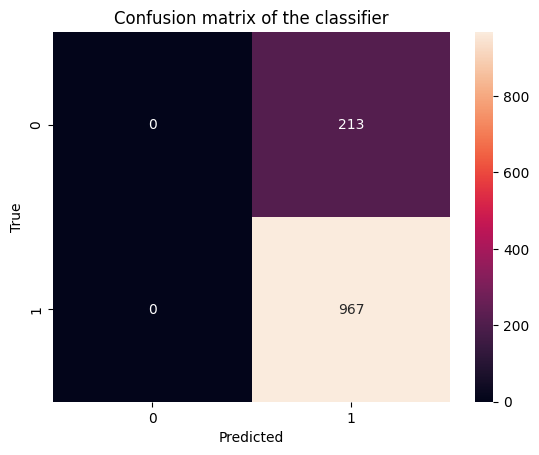

In [322]:
# import confusion_matrix
from sklearn.metrics import confusion_matrix
 
cm = confusion_matrix(y_cv, pred_cv)
print(cm)

# f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(cm, annot=True, fmt="d")
plt.title('Confusion matrix of the classifier')
plt.xlabel('Predicted')
plt.ylabel('True')

In [323]:
# import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_cv, pred_cv))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       213
           1       0.82      1.00      0.90       967

    accuracy                           0.82      1180
   macro avg       0.41      0.50      0.45      1180
weighted avg       0.67      0.82      0.74      1180



In [324]:
# fill the Loan_ID and Loan_Status
# sub['Loan_Status'] = pred_test_rfc_sam
# sub['ID'] = test_original['ID']

In [325]:
X.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'Loan_Amount_Term',
       'Credit_History', 'DTI', 'ITR', 'LTE', 'Total_Income_2', 'Net_Income',
       'Loan_Amount_to_Total_Income_Ratio',
       'Applicant_Income_to_Loan_Amount_Ratio',
       'Coapplicant_Income_to_Loan_Amount_Ratio', 'Log_Total_Income',
       'Log_LoanAmount', 'Income_per_Dependent', 'Has_Coapplicant',
       'Loan_Term_Years', 'Log_Applicant_Income_to_Loan_Amount_Ratio',
       'Log_Coapplicant_Income_to_Loan_Amount_Ratio',
       'Log_Income_per_Dependent', 'Sqrt_ApplicantIncome',
       'Sqrt_CoapplicantIncome', 'Combined_Income_Loan', 'Combined_Loan_Term',
       'Combined_Income_Loan_Term', 'LTI_2', 'EMI_Ratio', 'Affordability',
       'Coapplicant_Contribution', 'Monthly_Debt_Payments',
       'Gross_Monthly_Income', 'Income_Discrepancy', 'Discrepancy_Sign',
       'High_Discrepancy_Flag', 'Relative_Discrepancy',
       'Discrepancy_vs_Credit', 'Discrepancy_vs_LoanAmount',
       'Income_to_Loan_Ratio', 'Loan_

In [326]:
# make prediction on test set
pred_test = model.predict(test)

In [327]:
# take a look at the prediction
pred_test[:50]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1])

In [328]:
sub.head()

,ID,Target
0,70607,NaN
1,58412,NaN
2,88755,NaN
3,97271,NaN
4,70478,NaN


In [329]:
# fill the Loan_ID and Loan_Status
sub['Target'] = pred_test
sub['ID'] = test_original['ID']

In [330]:
# take a look at the submission result
sub.head(20)

,ID,Target
0,70607,1
1,58412,1
2,88755,1
3,97271,1
4,70478,1
5,19108,1
6,29374,1
7,28476,1
8,63397,1
9,97950,1


In [331]:
# convert to CSV file, without row index
sub.to_csv('logistic_FE_SAM.csv', index=False)

In [332]:
#Hyparameter tunning for Logistic Regression

In [333]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import GridSearchCV
# from sklearn.datasets import make_classification
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score


# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Logistic Regression
# log_reg = LogisticRegression()

# # Define the parameter grid
# param_grid = {
#     'penalty': ['l1', 'l2', 'elasticnet', 'none'],
#     'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
#     'solver': ['saga', 'lbfgs', 'liblinear', 'newton-cg'],  # Solvers available
#     'max_iter': [100, 200, 500],
#     'tol': [1e-4, 1e-3, 1e-2],  # Tolerance for stopping criteria
#     'fit_intercept': [True, False],
#     'multi_class': ['ovr', 'multinomial'],  # Multi-class options
#     'l1_ratio': [0.1, 0.5, 0.9],  # Only relevant for elasticnet
#     'warm_start': [True, False],  # Reuse previous solution
# }

# # Perform Grid Search
# grid_search = GridSearchCV(
#     log_reg,
#     param_grid,
#     cv=5,  # 5-fold cross-validation
#     scoring='accuracy',  # Metric to optimize
#     n_jobs=-1,  # Use all available processors
#     verbose=1
# )

# # Fit the model
# grid_search.fit(X_train, y_train)

# # Best parameters and best score
# print("Best Parameters:", grid_search.best_params_)
# print("Best Cross-Validation Accuracy:", grid_search.best_score_)

# # Evaluate on the test set
# best_model = grid_search.best_estimator_
# y_pred = best_model.predict(X_test)
# test_accuracy = accuracy_score(y_test, y_pred)
# print("Test Set Accuracy:", test_accuracy)


In [334]:
# # Best Parameters: {'C': 0.1, 'fit_intercept': True, 
# 'l1_ratio': 0.5, 'max_iter': 100, 'multi_class': 'ovr', 'penalty': 
# 'l1', 'solver': 'liblinear', 'tol': 0.01, 'warm_start': True}
# Best Cross-Validation Accuracy: 0.7137500000000001
# Test Set Accuracy: 0.685

In [335]:
# stratified 5 folds, shuffle each stratification of the data before splitting into batches
# import StratifiedKFold from sklearn and fit the model
from sklearn.model_selection import StratifiedKFold
# mean_accuracy = []
# i = 1
# kf = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)

# for train_index, test_index in kf.split(X, y):
#     print('\n{} of kfold {}'.format(i, kf.n_splits))
#     xtr, xvl = X.loc[train_index], X.loc[test_index]
#     ytr, yvl = y[train_index], y[test_index]
    
    
#     model_LR =  LogisticRegression()
#     model_LR.fit(xtr, ytr)
#     pred_test = model_LR.predict(xvl)
#     score = accuracy_score(yvl, pred_test)
#     mean_accuracy.append(score)
#     print('accuracy_score', score)
#     i+=1
    
# print("\nMean validation accuracy: ", sum(mean_accuracy)/len(mean_accuracy))


# # make prediction on test set
# pred_test = model_LR.predict(test)


# calculate probability estimates of loan approval
# column 0 is the probability for class 0 and column 1 is the probability for class 1
# probability of loan default = 1 - model.predict_proba(test)[:,1]
# pred = model_LR.predict(xvl)

In [336]:
train.isna().sum()

ApplicantIncome                                0
CoapplicantIncome                              0
Loan_Amount_Term                               0
Credit_History                                 0
Loan_Status                                    0
DTI                                            0
ITR                                            0
LTE                                            0
Total_Income_2                                 0
Net_Income                                     0
Loan_Amount_to_Total_Income_Ratio              0
Applicant_Income_to_Loan_Amount_Ratio          0
Coapplicant_Income_to_Loan_Amount_Ratio        0
Log_Total_Income                               0
Log_LoanAmount                                 0
Income_per_Dependent                           0
Has_Coapplicant                                0
Loan_Term_Years                                0
Log_Applicant_Income_to_Loan_Amount_Ratio      0
Log_Coapplicant_Income_to_Loan_Amount_Ratio    0
Log_Income_per_Depen

In [337]:
#Basline Model
from sklearn.model_selection import StratifiedKFold


predictions_LR = []
scores = []
i=0

# params = {'learning_rate': 0.185243125886494, 
#           'subsample': 0.2128564969905326, 
#           'colsample_bytree': 0.5046224462041669, 
#           'max_depth': 13, 
#           'scale_pos_weight': 4, 
#           'n_estimators': 995
#           }

fold=StratifiedKFold(n_splits=10,shuffle=True, random_state=1)

for train_index, test_index in fold.split(X,y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    Y_train, Y_test = y[train_index], y[test_index]
    classifier_LR = LogisticRegression(C=0.1, fit_intercept= True, 
l1_ratio= 0.5, max_iter=100, multi_class= 'ovr', penalty= 'l1', 
solver='liblinear', tol= 0.01, warm_start= True)
    classifier_LR.fit(X_train, Y_train)
    preds=classifier_LR.predict(X_test)
    score = accuracy_score(Y_test,preds)
    scores.append(score)
    print("Accuracy: ", score) 
    predictions_LR.append(classifier_LR.predict(test))
    i=i+1


print(np.mean(scores))

#Trial 652 finished with value: 0.9687548448537013 and parameters: {'learning_rate': 0.1805243125886494, 'subsample': 0.2128564969905326, 'colsample_bytree': 0.5046224462041669, 'max_depth': 13, 'scale_pos_weight': 6, 'n_estimators': 995}

Accuracy:  0.8338983050847457
Accuracy:  0.8338983050847457
Accuracy:  0.8338983050847457
Accuracy:  0.8305084745762712
Accuracy:  0.8322033898305085
Accuracy:  0.8322033898305085
Accuracy:  0.8322033898305085
Accuracy:  0.8322033898305085
Accuracy:  0.831918505942275
Accuracy:  0.833616298811545
0.8326551753906362


In [338]:
# make prediction on test set
pred_test_LR = classifier_LR.predict(test)

In [339]:
# fill the Loan_ID and Loan_Status
sub['Target'] = pred_test_LR
sub['ID'] = test_original['ID']

In [340]:
# convert to CSV file, without row index
sub.to_csv('logistic_with_FE_7.csv', index=False)

In [341]:
sub.head()

,ID,Target
0,70607,1
1,58412,1
2,88755,1
3,97271,1
4,70478,1


In [342]:
# # visualize ROC curve
# from sklearn import metrics
# fpr, tpr, _ = metrics.roc_curve(yvl,  pred)
# auc = metrics.roc_auc_score(yvl, pred)
# plt.figure(figsize=(12,8))
# plt.plot(fpr,tpr,label="validation, auc="+str(auc))
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.legend(loc=4)
# plt.show()

#  **Model Building : Part II**I

In [343]:
# # stratified 5 folds, shuffle each stratification of the data before splitting into batches

# mean_accuracy = []
# i = 1
# kf = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)

# for train_index, test_index in kf.split(X, y):
#     print('\n{} of kfold {}'.format(i, kf.n_splits))
#     xtr, xvl = X.loc[train_index], X.loc[test_index]
#     ytr, yvl = y[train_index], y[test_index]
    
    
#     model =  LogisticRegression(random_state=1)
#     model.fit(xtr, ytr)
#     pred_test = model.predict(xvl)
#     score = accuracy_score(yvl, pred_test)
#     mean_accuracy.append(score)
#     print('accuracy_score', score)
#     i+=1
    
# print("\nMean validation accuracy: ", sum(mean_accuracy)/len(mean_accuracy))


# # make prediction on test set
# pred_test = model.predict(test)


# # calculate probability estimates of loan approval
# # column 0 is the probability for class 0 and column 1 is the probability for class 1
# # probability of loan default = 1 - model.predict_proba(test)[:,1]
# pred = model.predict(xvl)

In [344]:
from sklearn.model_selection import StratifiedKFold


predictions_LR = []
scores = []
i=0

params = {'learning_rate': 0.185243125886494, 
          'subsample': 0.2128564969905326, 
          'colsample_bytree': 0.5046224462041669, 
          'max_depth': 13, 
          'scale_pos_weight': 4, 
          'n_estimators': 995
          }

fold=StratifiedKFold(n_splits=10,shuffle=True, random_state=1)

for train_index, test_index in fold.split(X,y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    Y_train, Y_test = y[train_index], y[test_index]
    classifier_LR = LogisticRegression(C=0.1, fit_intercept= True, 
l1_ratio= 0.5, max_iter=100, multi_class= 'ovr', penalty= 'l1', 
solver='liblinear', tol= 0.01, warm_start= True)
    classifier_LR.fit(X_train, Y_train)
    preds=classifier_LR.predict(X_test)
    score = accuracy_score(Y_test,preds)
    scores.append(score)
    print("Accuracy: ", score) 
    predictions_LR.append(classifier_LR.predict(test))
    i=i+1


print(np.mean(scores))

#Trial 652 finished with value: 0.9687548448537013 and parameters: {'learning_rate': 0.1805243125886494, 'subsample': 0.2128564969905326, 'colsample_bytree': 0.5046224462041669, 'max_depth': 13, 'scale_pos_weight': 6, 'n_estimators': 995}

Accuracy:  0.8338983050847457
Accuracy:  0.8338983050847457
Accuracy:  0.8338983050847457
Accuracy:  0.8322033898305085
Accuracy:  0.8322033898305085
Accuracy:  0.8322033898305085
Accuracy:  0.8322033898305085
Accuracy:  0.8322033898305085
Accuracy:  0.833616298811545
Accuracy:  0.833616298811545
0.832994446202987


In [345]:
#0.8328249546775632

In [346]:
# make prediction on test set
pred_test_LR = classifier_LR.predict(test)
# filling Loan_Status with predictions
sub['Target'] = pred_test_LR 

# filling Loan_ID with test Loan_ID
sub['ID'] = test_original['ID'] 

In [347]:
# Converting submission file to .csv format
sub.to_csv('LR.csv', index=False)

In [348]:
# import library
from sklearn import tree

In [349]:
from sklearn.tree import DecisionTreeClassifier


In [350]:
# from sklearn.tree import DecisionTreeClassifier
# mean_accuracy = []
# i=1
# kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
# for train_index,test_index in kf.split(X,y):
#     print('\n{} of kfold {}'.format(i,kf.n_splits))
#     xtr,xvl = X.loc[train_index],X.loc[test_index]
#     ytr,yvl = y[train_index],y[test_index]
    
#     model_DT = DecisionTreeClassifier(random_state=1)
    
#     model_DT.fit(xtr, ytr)
#     pred_test = model_DT.predict(xvl)
#     score = accuracy_score(yvl,pred_test)
#     mean_accuracy.append(score)
#     print('accuracy_score',score)
#     i+=1
    
# print("\nMean validation accuracy: ", sum(mean_accuracy)/len(mean_accuracy))
# pred_test_DT = model_DT.predict(test)

In [351]:
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier

predictions_DT = []
scores = []
i=0

          

fold=StratifiedKFold(n_splits=10,shuffle=True, random_state=1)

for train_index, test_index in fold.split(X,y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    Y_train, Y_test = y[train_index], y[test_index]
    classifier_DT = DecisionTreeClassifier(class_weight= None, criterion= 'entropy', max_depth= 5,
max_features= 'log2', max_leaf_nodes= None, min_impurity_decrease= 0.0,
min_samples_leaf=10, min_samples_split= 2, random_state= 42, splitter= 'best')
    
    classifier_DT.fit(X_train, Y_train)
    preds=classifier_DT.predict(X_test)
    score = accuracy_score(Y_test,preds)
    scores.append(score)
    print("Accuracy: ", score) 
    predictions_DT.append(classifier_DT.predict(test))
    i=i+1


print(np.mean(scores))

#Trial 652 finished with value: 0.9687548448537013 and parameters: {'learning_rate': 0.1805243125886494, 'subsample': 0.2128564969905326, 'colsample_bytree': 0.5046224462041669, 'max_depth': 13, 'scale_pos_weight': 6, 'n_estimators': 995}

Accuracy:  0.8338983050847457
Accuracy:  0.8338983050847457
Accuracy:  0.8322033898305085
Accuracy:  0.8271186440677966
Accuracy:  0.8322033898305085
Accuracy:  0.8288135593220339
Accuracy:  0.8288135593220339
Accuracy:  0.8288135593220339
Accuracy:  0.833616298811545
Accuracy:  0.833616298811545
0.8312995309487498


In [352]:
# Fitting 5 folds for each of 13824 candidates, totalling 69120 fits
# # Best Parameters: {'class_weight': None, 'criterion': 'entropy', 'max_depth': 5,
# 'max_features': 'log2', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0,
# 'min_samples_leaf': 10, 'min_samples_split': 2, 'random_state': 42, 'splitter': 'best'}
# Best Cross-Validation Accuracy: 0.8312844869421427
# Test Set Accuracy: 0.8415254237288136

In [353]:
# filling Loan_Status with predictions
sub['Target'] = classifier_DT.predict(test)         

# filling Loan_ID with test Loan_ID
sub['ID'] = test_original['ID'] 

In [354]:
# Converting submission file to .csv format
sub.to_csv('Decision Tree_3.csv', index=False)

In [355]:
# #hyperparameter tunnining for Decision Tree
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.model_selection import GridSearchCV
# from sklearn.datasets import make_classification
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score


# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Initialize Decision Tree Classifier
# dt = DecisionTreeClassifier()

# # Define the parameter grid
# param_grid = {
#     'criterion': ['gini', 'entropy'],  # Measure of split quality
#     'splitter': ['best', 'random'],    # Strategy for splitting
#     'max_depth': [None, 5, 10, 20],    # Maximum depth of the tree
#     'min_samples_split': [2, 5, 10],   # Minimum samples to split an internal node
#     'min_samples_leaf': [1, 2, 5, 10], # Minimum samples in a leaf node
#     'max_features': [None, 'sqrt', 'log2'], # Features to consider at split
#     'max_leaf_nodes': [None, 10, 20, 50],   # Maximum leaf nodes
#     'min_impurity_decrease': [0.0, 0.01, 0.1], # Impurity decrease threshold
#     'class_weight': [None, 'balanced'],     # Handle class imbalance
#     'random_state': [42],                   # Ensures reproducibility
# }

# # Perform Grid Search
# grid_search = GridSearchCV(
#     dt,
#     param_grid,
#     cv=5,  # 5-fold cross-validation
#     scoring='accuracy',  # Metric to optimize
#     n_jobs=-1,  # Use all available processors
#     verbose=1
# )

# # Fit the model
# grid_search.fit(X_train, y_train)

# # Best parameters and best score
# print("Best Parameters:", grid_search.best_params_)
# print("Best Cross-Validation Accuracy:", grid_search.best_score_)

# # Evaluate on the test set
# best_model = grid_search.best_estimator_
# y_pred = best_model.predict(X_test)
# test_accuracy = accuracy_score(y_test, y_pred)
# print("Test Set Accuracy:", test_accuracy)


In [356]:
# import library
from sklearn.ensemble import RandomForestClassifier

In [357]:
# mean_accuracy = []
# i=1
# kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
# for train_index,test_index in kf.split(X, y):
#     print('\n{} of kfold {}'.format(i,kf.n_splits))
#     xtr,xvl = X.loc[train_index],X.loc[test_index]
#     ytr,yvl = y[train_index],y[test_index]
    
#     model_RF = RandomForestClassifier(random_state=1, max_depth=10, n_estimators=10)
#     model_RF.fit(xtr, ytr)
#     pred_test_RF = model_RF.predict(xvl)
#     score = accuracy_score(yvl,pred_test_RF)
#     mean_accuracy.append(score)
#     print('accuracy_score',score)
#     i+=1
    
# print("\nMean validation accuracy: ", sum(mean_accuracy)/len(mean_accuracy))
# pred_test_RF = model_RF.predict(test)


# #Mean validation accuracy:  0.8319768260950822

In [358]:
from sklearn.model_selection import StratifiedKFold


predictions_RF= []
scores = []
i=0

params = {'learning_rate': 0.185243125886494, 
          'subsample': 0.2128564969905326, 
          'colsample_bytree': 0.5046224462041669, 
          'max_depth': 13, 
          'scale_pos_weight': 4, 
          'n_estimators': 995
          }

fold=StratifiedKFold(n_splits=10,shuffle=True, random_state=1)

for train_index, test_index in fold.split(X,y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    Y_train, Y_test = y[train_index], y[test_index]
    classifier_RF =  RandomForestClassifier(random_state=1,
                                            max_depth=3,
                                            n_estimators=1000)
    
    classifier_RF.fit(X_train, Y_train)
    preds=classifier_RF.predict(X_test)
    score = accuracy_score(Y_test,preds)
    scores.append(score)
    print("Accuracy: ", score) 
    predictions_RF.append(classifier_RF.predict(test))
    i=i+1


print(np.mean(scores))

#Trial 652 finished with value: 0.9687548448537013 and parameters: {'learning_rate': 0.1805243125886494, 'subsample': 0.2128564969905326, 'colsample_bytree': 0.5046224462041669, 'max_depth': 13, 'scale_pos_weight': 6, 'n_estimators': 995}

Accuracy:  0.8338983050847457
Accuracy:  0.8338983050847457
Accuracy:  0.8338983050847457
Accuracy:  0.8322033898305085
Accuracy:  0.8322033898305085
Accuracy:  0.8322033898305085
Accuracy:  0.8322033898305085
Accuracy:  0.8322033898305085
Accuracy:  0.833616298811545
Accuracy:  0.833616298811545
0.832994446202987


In [359]:
# #Hyperparameter tunning for RandomForest
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import GridSearchCV
# from sklearn.datasets import make_classification
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score


# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Initialize Random Forest Classifier
# rf = RandomForestClassifier(random_state=42)

# # Define the parameter grid
# param_grid = {
#     'n_estimators': [50, 100, 200],                # Number of trees
#     'max_depth': [None, 10, 20, 30],              # Maximum depth of each tree
#     'min_samples_split': [2, 5, 10],              # Minimum samples to split an internal node
#     'min_samples_leaf': [1, 2, 5],                # Minimum samples at a leaf node
#     'max_features': ['sqrt', 'log2', None],       # Features to consider for the best split
#     'bootstrap': [True, False],                   # Bootstrap samples
#     'criterion': ['gini', 'entropy'],             # Measure of split quality
#     'max_leaf_nodes': [None, 10, 20, 50],         # Maximum number of leaf nodes
#     'min_impurity_decrease': [0.0, 0.01, 0.1],    # Impurity decrease threshold
#     'class_weight': [None, 'balanced'],           # Handle class imbalance
# }

# # Perform Grid Search
# grid_search = GridSearchCV(
#     rf,
#     param_grid,
#     cv=5,                # 5-fold cross-validation
#     scoring='accuracy',  # Metric to optimize
#     n_jobs=-1,           # Use all available processors
#     verbose=1
# )

# # Fit the model
# grid_search.fit(X_train, y_train)

# # Best parameters and best score
# print("Best Parameters:", grid_search.best_params_)
# print("Best Cross-Validation Accuracy:", grid_search.best_score_)

# # Evaluate on the test set
# best_model = grid_search.best_estimator_
# y_pred = best_model.predict(X_test)
# test_accuracy = accuracy_score(y_test, y_pred)
# print("Test Set Accuracy:", test_accuracy)


In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score


# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Define hyperparameter grid for tuning
param_grid = {
    'n_estimators': [100, 200, 500, 1000],          # Number of trees
    'max_depth': [10, 20, 30, None],               # Maximum depth of trees
    'min_samples_split': [2, 5, 10, 20],           # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4, 10],             # Minimum samples required to be a leaf node
    #'max_features': ['sqrt', 'log2', None],        # Number of features to consider at each split
    'bootstrap': [True, False],                    # Use bootstrap sampling
    'class_weight': [None, 'balanced', 'balanced_subsample'], # Class weighting for imbalanced datasets
    'criterion': ['gini', 'entropy'],              # Criterion to measure the quality of splits
    'max_leaf_nodes': [None, 10, 20, 50],          # Maximum number of leaf nodes
    'oob_score': [True, False]                     # Use out-of-bag samples to estimate generalization error
}

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    scoring='accuracy',     # Optimize for accuracy
    cv=5,                   # 5-fold cross-validation
    verbose=2,              # Show progress
    n_jobs=-1               # Use all CPU cores for faster computation
)

# Perform GridSearchCV
grid_search.fit(X_train, y_train)

# Retrieve the best parameters and model
best_params = grid_search.best_params_
best_rf_model = grid_search.best_estimator_

print("Best Parameters:", best_params)

# Evaluate the tuned model on the test set
y_pred = best_rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Random Forest Test Accuracy:", accuracy)


Fitting 5 folds for each of 24576 candidates, totalling 122880 fits
[CV] END bootstrap=True, class_weight=None, criterion=gini, max_depth=10, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100, oob_score=True; total time=   2.0s
[CV] END bootstrap=True, class_weight=None, criterion=gini, max_depth=10, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100, oob_score=False; total time=   1.9s
[CV] END bootstrap=True, class_weight=None, criterion=gini, max_depth=10, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100, oob_score=False; total time=   1.9s
[CV] END bootstrap=True, class_weight=None, criterion=gini, max_depth=10, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200, oob_score=True; total time=   4.1s
[CV] END bootstrap=True, class_weight=None, criterion=gini, max_depth=10, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200, oob_score=False; tot

In [ ]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import train_test_split, GridSearchCV
# from sklearn.metrics import accuracy_score
# # Split into train and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Random Forest model
# rf_model = RandomForestClassifier(random_state=42)

# # Define hyperparameter grid
# param_grid = {
#     'n_estimators': [100, 200, 500],              # Number of trees
#     'max_depth': [None, 10, 20, 30, 50],          # Maximum depth of trees
#     'min_samples_split': [2, 5, 10],              # Minimum number of samples required to split an internal node
#     'min_samples_leaf': [1, 2, 4],                # Minimum number of samples required to be a leaf node
#     #'max_features': ['auto', 'sqrt', 'log2'],     # Number of features to consider at each split
#     'bootstrap': [True, False],                   # Whether bootstrap samples are used
#     'class_weight': [None, 'balanced'],           # Handle imbalanced datasets
#     'criterion': ['gini', 'entropy', 'log_loss'], # Function to measure split quality
#     'max_leaf_nodes': [None, 10, 20, 50],         # Maximum number of leaf nodes
#     'oob_score': [True, False]                    # Out-of-bag samples for evaluation
# }

# # Set up GridSearchCV
# grid_search = GridSearchCV(
#     estimator=rf_model,
#     param_grid=param_grid,
#     scoring='accuracy',
#     cv=5,              # 5-fold cross-validation
#     verbose=1,         # Print progress
#     n_jobs=-1          # Use all CPU cores
# )

# # Fit GridSearchCV
# grid_search.fit(X_train, y_train)

# # Get the best parameters and accuracy
# best_params = grid_search.best_params_
# best_rf_model = grid_search.best_estimator_
# print("Best Parameters:", best_params)

# # Evaluate on the test set
# y_pred = best_rf_model.predict(X_test)
# accuracy = accuracy_score(y_test, y_pred)
# print("Random Forest Test Accuracy:", accuracy)

In [438]:
# import library
from sklearn.model_selection import GridSearchCV

In [439]:
# Provide range for max_depth from 1 to 20 with an interval of 2 and from 1 to 200 with an interval of 20 for n_estimators
#paramgrid = {'max_depth': list(range(1, 20, 2)), 'n_estimators': list(range(1, 200, 20))}

In [ ]:
# pipeline = Pipeline(steps=[
#     ('targetencoder', TargetEncoder()),
#     ('randomforestclassifier', RandomForestClassifier(random_state=1))
# ])

# # Define the parameter grid
# param_grid = {
#     'randomforestclassifier__max_depth': [5, 10, 15],
#     'randomforestclassifier__n_estimators': [50, 100, 150]
# }

# # Perform grid search
# grid_search = GridSearchCV(pipeline, param_grid, cv=3)
# grid_search.fit(x_train, y_train)

# # Get the best parameters
# print("Best parameters:", grid_search.best_params_)


In [ ]:
# # split the data
# from sklearn.model_selection import train_test_split
# x_train, x_cv, y_train, y_cv = train_test_split(X, y, test_size =0.3, random_state=1)

In [ ]:
# fit the grid search model
#grid_search.fit(x_train, y_train)

In [ ]:
# # estimate the optimized value
# grid_search.best_estimator_

In [ ]:
#optuna 268, 'max_depth': 9
#grid searchrandom_state=1, max_depth=11, n_estimators=121

In [ ]:
# mean_accuracy = []
# i=1
# kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
# for train_index,test_index in kf.split(X,y):
#     print('\n{} of kfold {}'.format(i,kf.n_splits))
#     xtr,xvl = X.loc[train_index],X.loc[test_index]
#     ytr,yvl = y[train_index],y[test_index]
#     #RandomForestClassifier(random_state=1, max_depth= 9, n_estimators=268)
#     model_RF_2 = RandomForestClassifier(random_state=1, max_depth= 9, n_estimators=268)
#     model_RF_2.fit(xtr, ytr)
#     pred_test = model_RF_2.predict(xvl)
#     score = accuracy_score(yvl,pred_test)
#     mean_accuracy.append(score)
#     print('accuracy_score',score)
#     i+=1
    
# print("\nMean validation accuracy: ", sum(mean_accuracy)/len(mean_accuracy))
# pred_test_RF_2 = model_RF_2.predict(test)
# pred2=model.predict_proba(test)

In [538]:
from sklearn.model_selection import StratifiedKFold


predictions_RF2 = []
scores = []
i=0

params = {'learning_rate': 0.185243125886494, 
          'subsample': 0.2128564969905326, 
          'colsample_bytree': 0.5046224462041669, 
          'max_depth': 13, 
          'scale_pos_weight': 4, 
          'n_estimators': 995
          }

fold=StratifiedKFold(n_splits=10,shuffle=True, random_state=1)

for train_index, test_index in fold.split(X,y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    Y_train, Y_test = y[train_index], y[test_index]
    classifier_RF2 =  RandomForestClassifier(random_state=1, max_depth=10, n_estimators=10)
    
    classifier_RF2.fit(X_train, Y_train)
    preds=classifier_RF2.predict(X_test)
    score = accuracy_score(Y_test,preds)
    scores.append(score)
    print("Accuracy: ", score) 
    predictions_RF2.append(classifier_RF2.predict(test))
    i=i+1


print(np.mean(scores))

#Trial 652 finished with value: 0.9687548448537013 and parameters: {'learning_rate': 0.1805243125886494, 'subsample': 0.2128564969905326, 'colsample_bytree': 0.5046224462041669, 'max_depth': 13, 'scale_pos_weight': 6, 'n_estimators': 995}

Accuracy:  0.8288135593220339
Accuracy:  0.8322033898305085
Accuracy:  0.8338983050847457
Accuracy:  0.8271186440677966
Accuracy:  0.8322033898305085
Accuracy:  0.8355932203389831
Accuracy:  0.8254237288135593
Accuracy:  0.8271186440677966
Accuracy:  0.8353140916808149
Accuracy:  0.8285229202037352
0.8306209893240484


In [ ]:
# filling Loan_Status with predictions
sub['Target']= classifier_RF.predict(test)          

# filling Loan_ID with test Loan_ID
sub['ID']=test_original['ID'] 

In [ ]:
# Converting submission file to .csv format
sub.to_csv('Random Fore_Hyp_6_FE.csv', index=False)

In [ ]:
# from sklearn.ensemble import AdaBoostClassifier
# from sklearn.tree import DecisionTreeClassifier

# # Initialize a base decision tree classifier (weak learner)
# base_model = DecisionTreeClassifier(max_depth=1)

# mean_accuracy = []
# i=1
# kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
# for train_index,test_index in kf.split(X,y):
#     print('\n{} of kfold {}'.format(i,kf.n_splits))
#     xtr,xvl = X.loc[train_index],X.loc[test_index]
#     ytr,yvl = y[train_index],y[test_index]
#     #RandomForestClassifier(random_state=1, max_depth= 9, n_estimators=268)
#     model_Ada = AdaBoostClassifier(base_model, n_estimators=50, random_state=42)
#     model_Ada.fit(xtr, ytr)
#     pred_test = model_Ada.predict(xvl)
#     score = accuracy_score(yvl,pred_test)
#     mean_accuracy.append(score)
#     print('accuracy_score',score)
#     i+=1
    
# print("\nMean validation accuracy: ", sum(mean_accuracy)/len(mean_accuracy))
# pred_test_Ada = model.predict(test)
# pred2=model.predict_proba(test)

In [450]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold


predictions_AB = []
scores = []
i=0

params = {'learning_rate': 0.185243125886494, 
          'subsample': 0.2128564969905326, 
          'colsample_bytree': 0.5046224462041669, 
          'max_depth': 13, 
          'scale_pos_weight': 4, 
          'n_estimators': 995
          }

fold=StratifiedKFold(n_splits=10,shuffle=True, random_state=1)

for train_index, test_index in fold.split(X,y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    Y_train, Y_test = y[train_index], y[test_index]
    classifier_AB = AdaBoostClassifier( DecisionTreeClassifier(),n_estimators=50, random_state=42)
    
    classifier_AB.fit(X_train, Y_train)
    preds=classifier_AB.predict(X_test)
    score = accuracy_score(Y_test,preds)
    scores.append(score)
    print("Accuracy: ", score) 
    predictions_AB.append(classifier_AB.predict(test))
    i=i+1


print(np.mean(scores))

#Trial 652 finished with value: 0.9687548448537013 and parameters: {'learning_rate': 0.1805243125886494, 'subsample': 0.2128564969905326, 'colsample_bytree': 0.5046224462041669, 'max_depth': 13, 'scale_pos_weight': 6, 'n_estimators': 995}

Accuracy:  0.676271186440678
Accuracy:  0.7135593220338983
Accuracy:  0.7288135593220338
Accuracy:  0.7033898305084746
Accuracy:  0.7016949152542373
Accuracy:  0.7050847457627119
Accuracy:  0.7079796264855688
Accuracy:  0.7096774193548387
0.7100707893298035


In [451]:
# filling Loan_Status with predictions
sub['Target']= classifier_AB.predict(test)       

# filling Loan_ID with test Loan_ID
sub['ID']=test_original['ID'] 

In [452]:
# Converting submission file to .csv format
sub.to_csv('Adaboost_FE.csv', index=False)

In [453]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the KNN model with 5 neighbors
knn_model = KNeighborsClassifier(n_neighbors=5)


In [454]:
# from sklearn.neighbors import KNeighborsClassifier

# mean_accuracy = []
# i=1
# kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
# for train_index,test_index in kf.split(X,y):
#     print('\n{} of kfold {}'.format(i,kf.n_splits))
#     xtr,xvl = X.loc[train_index],X.loc[test_index]
#     ytr,yvl = y[train_index],y[test_index]
#     #RandomForestClassifier(random_state=1, max_depth= 9, n_estimators=268)
#     model_KN = KNeighborsClassifier(n_neighbors=5)
#     model_KN.fit(xtr, ytr)
#     pred_test = model_KN.predict(xvl)
#     score = accuracy_score(yvl,pred_test)
#     mean_accuracy.append(score)
#     print('accuracy_score',score)
#     i+=1
    
# print("\nMean validation accuracy: ", sum(mean_accuracy)/len(mean_accuracy))
# pred_test_KN = model_KN.predict(test)
# pred2=model.predict_proba(test)

In [455]:
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier


predictions_KN = []
scores = []
i=0

params = {'learning_rate': 0.185243125886494, 
          'subsample': 0.2128564969905326, 
          'colsample_bytree': 0.5046224462041669, 
          'max_depth': 13, 
          'scale_pos_weight': 4, 
          'n_estimators': 995
          }

fold=StratifiedKFold(n_splits=10,shuffle=True, random_state=1)

for train_index, test_index in fold.split(X,y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    Y_train, Y_test = y[train_index], y[test_index]
    classifier_KN =  KNeighborsClassifier(n_neighbors=5)
    
    classifier_KN.fit(X_train, Y_train)
    preds=classifier_KN.predict(X_test)
    score = accuracy_score(Y_test,preds)
    scores.append(score)
    print("Accuracy: ", score) 
    predictions_KN.append(classifier_KN.predict(test))
    i=i+1


print(np.mean(scores))

#Trial 652 finished with value: 0.9687548448537013 and parameters: {'learning_rate': 0.1805243125886494, 'subsample': 0.2128564969905326, 'colsample_bytree': 0.5046224462041669, 'max_depth': 13, 'scale_pos_weight': 6, 'n_estimators': 995}

Accuracy:  0.7898305084745763
Accuracy:  0.8169491525423729
Accuracy:  0.8135593220338984
Accuracy:  0.7966101694915254
Accuracy:  0.8186440677966101
Accuracy:  0.8
Accuracy:  0.7983050847457627
Accuracy:  0.8033898305084746
Accuracy:  0.8115449915110357
Accuracy:  0.8081494057724957
0.8056982532876752


In [456]:
# filling Loan_Status with predictions
sub['Target']=classifier_KN.predict(test)         

# filling Loan_ID with test Loan_ID
sub['ID']=test_original['ID'] 

In [457]:
# Converting submission file to .csv format
sub.to_csv('KN_FE.csv', index=False)

In [458]:
from sklearn.ensemble import GradientBoostingClassifier

# mean_accuracy = []
# i=1
# kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
# for train_index,test_index in kf.split(X,y):
#     print('\n{} of kfold {}'.format(i,kf.n_splits))
#     xtr,xvl = X.loc[train_index],X.loc[test_index]
#     ytr,yvl = y[train_index],y[test_index]
#     #RandomForestClassifier(random_state=1, max_depth= 9, n_estimators=268)
#     model_GB = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
#     model_GB.fit(xtr, ytr)
#     pred_test = model_GB.predict(xvl)
#     score = accuracy_score(yvl,pred_test)
#     mean_accuracy.append(score)
#     print('accuracy_score',score)
#     i+=1
    
# print("\nMean validation accuracy: ", sum(mean_accuracy)/len(mean_accuracy))
# pred_test_GB = model.predict(test)
# pred2=model_GB.predict_proba(test)

In [459]:
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier

predictions_GB = []
scores = []
i=0

params = {'learning_rate': 0.185243125886494, 
          'subsample': 0.2128564969905326, 
          'colsample_bytree': 0.5046224462041669, 
          'max_depth': 13, 
          'scale_pos_weight': 4, 
          'n_estimators': 995
          }

fold=StratifiedKFold(n_splits=10,shuffle=True, random_state=1)

for train_index, test_index in fold.split(X,y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    Y_train, Y_test = y[train_index], y[test_index]
    classifier_GB = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
    
    classifier_GB.fit(X_train, Y_train)
    preds=classifier_GB.predict(X_test)
    score = accuracy_score(Y_test,preds)
    scores.append(score)
    print("Accuracy: ", score) 
    predictions_GB.append(classifier_GB.predict(test))
    i=i+1


print(np.mean(scores))

#Trial 652 finished with value: 0.9687548448537013 and parameters: {'learning_rate': 0.1805243125886494, 'subsample': 0.2128564969905326, 'colsample_bytree': 0.5046224462041669, 'max_depth': 13, 'scale_pos_weight': 6, 'n_estimators': 995}

Accuracy:  0.8338983050847457
Accuracy:  0.8288135593220339
Accuracy:  0.8322033898305085
Accuracy:  0.8288135593220339
Accuracy:  0.8322033898305085
Accuracy:  0.8355932203389831
Accuracy:  0.8271186440677966
Accuracy:  0.8305084745762712
Accuracy:  0.833616298811545
Accuracy:  0.830220713073005
0.8312989554257433


In [460]:
# filling Loan_Status with predictions
sub['Target']=classifier_GB.predict(test) 

# filling Loan_ID with test Loan_ID
sub['ID']=test_original['ID'] 

In [461]:
# Converting submission file to .csv format
sub.to_csv('Gradient_FE.csv', index=False)

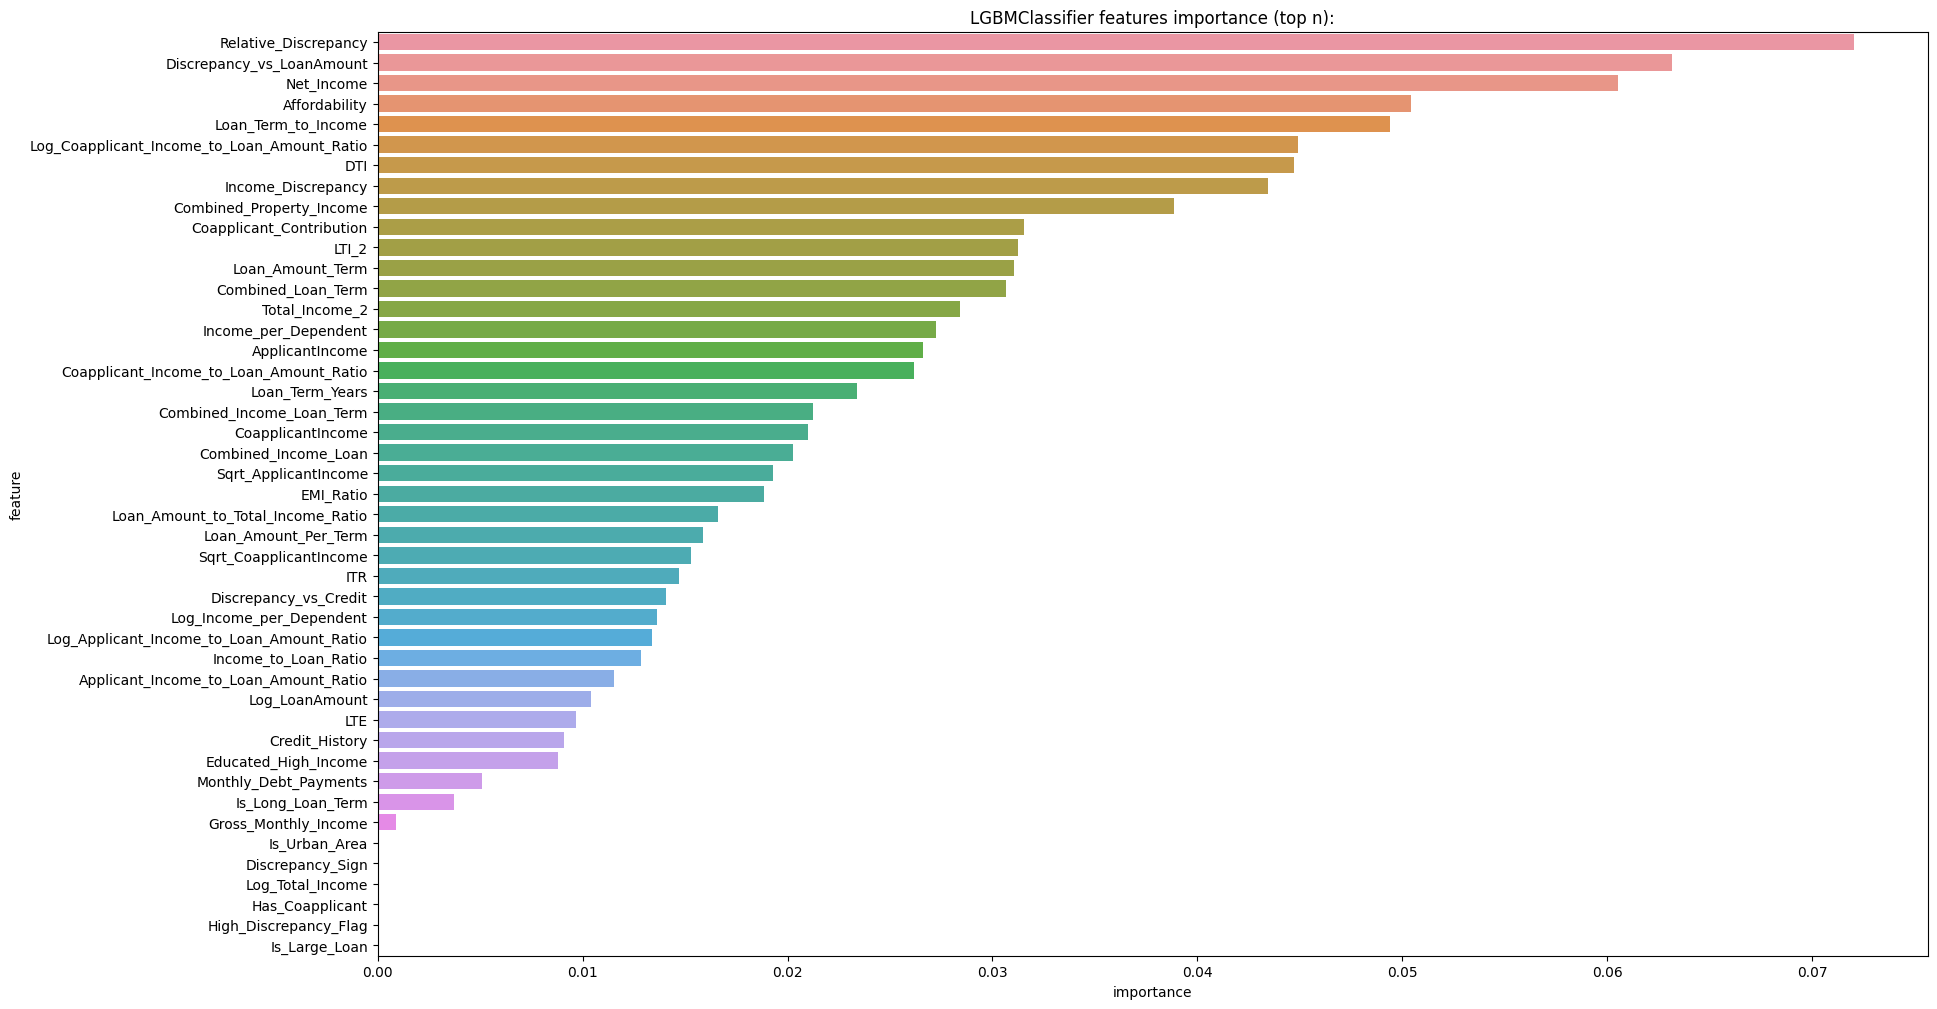

In [462]:
feature_importance_df = pd.DataFrame(classifier_GB.feature_importances_, columns=['importance'])
feature_importance_df['feature'] = X_train.columns

plt.figure(figsize=(20, 12));
sns.barplot(x="importance", y="feature", data=feature_importance_df.sort_values(by = ['importance'], ascending = False).head(50))
plt.title('GradientBoostingClassifier features importance (top n):');

In [463]:
# # # extract feature importances, convert into a Series
# importances = pd.Series(classifier_GB.feature_importances_, index=X.columns)

# # # plot the horizontal bar chart
# importances.plot(kind='barh', figsize=(12,8))

In [464]:
from sklearn.naive_bayes import BernoulliNB

# Initialize the Bernoulli Naive Bayes model
nb_model = BernoulliNB()

In [465]:
from sklearn.naive_bayes import BernoulliNB

# mean_accuracy = []
# i=1
# kf = StratifiedKFold(n_splits=10,random_state=1,shuffle=True)
# for train_index,test_index in kf.split(X,y):
#     print('\n{} of kfold {}'.format(i,kf.n_splits))
#     xtr,xvl = X.loc[train_index],X.loc[test_index]
#     ytr,yvl = y[train_index],y[test_index]
#     #RandomForestClassifier(random_state=1, max_depth= 9, n_estimators=268)
#     model_BAY = BernoulliNB()
#     model_BAY.fit(xtr, ytr)
#     pred_test = model_BAY.predict(xvl)
#     score = accuracy_score(yvl,pred_test)
#     mean_accuracy.append(score)
#     print('accuracy_score',score)
#     i+=1
    
# print("\nMean validation accuracy: ", sum(mean_accuracy)/len(mean_accuracy))
# pred_test_BAY = model_BAY.predict(test)
# pred2=model.predict_proba(test)

In [466]:
from sklearn.model_selection import StratifiedKFold
from sklearn.naive_bayes import BernoulliNB


predictions_NB = []
scores = []
i=0

params = {'learning_rate': 0.185243125886494, 
          'subsample': 0.2128564969905326, 
          'colsample_bytree': 0.5046224462041669, 
          'max_depth': 13, 
          'scale_pos_weight': 4, 
          'n_estimators': 995
          }

fold=StratifiedKFold(n_splits=10,shuffle=True, random_state=1)

for train_index, test_index in fold.split(X,y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    Y_train, Y_test = y[train_index], y[test_index]
    classifier_NB = BernoulliNB()
    
    classifier_NB.fit(X_train, Y_train)
    preds=classifier_NB.predict(X_test)
    score = accuracy_score(Y_test,preds)
    scores.append(score)
    print("Accuracy: ", score) 
    predictions_NB.append(classifier_NB.predict(test))
    i=i+1


print(np.mean(scores))

#Trial 652 finished with value: 0.9687548448537013 and parameters: {'learning_rate': 0.1805243125886494, 'subsample': 0.2128564969905326, 'colsample_bytree': 0.5046224462041669, 'max_depth': 13, 'scale_pos_weight': 6, 'n_estimators': 995}

Accuracy:  0.8338983050847457
Accuracy:  0.8338983050847457
Accuracy:  0.8338983050847457
Accuracy:  0.8322033898305085
Accuracy:  0.8322033898305085
Accuracy:  0.8322033898305085
Accuracy:  0.8322033898305085
Accuracy:  0.8322033898305085
Accuracy:  0.833616298811545
Accuracy:  0.833616298811545
0.832994446202987


In [467]:
# filling Loan_Status with predictions
sub['Target']=classifier_NB.predict(test)         

# filling Loan_ID with test Loan_ID
sub['ID']=test_original['ID'] 

In [468]:
# Converting submission file to .csv format
sub.to_csv('Bay.csv', index=False)

In [469]:
# import library
from xgboost import XGBClassifier

In [470]:
# mean_accuracy = []
# i=1
# kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
# for train_index,test_index in kf.split(X,y):
#     print('\n{} of kfold {}'.format(i,kf.n_splits))
#     xtr,xvl = X.loc[train_index],X.loc[test_index]
#     ytr,yvl = y[train_index],y[test_index]
    
#     model_XGB = XGBClassifier( DMatrix = True,enable_categorical=True ,random_state=1, n_estimators=50, max_depth=4)
#     model_XGB.fit(xtr, ytr)
#     pred_test = model.predict(xvl)
#     score = accuracy_score(yvl,pred_test)
#     mean_accuracy.append(score)
#     print('accuracy_score',score)
#     i+=1
    
# print("\nMean validation accuracy: ", sum(mean_accuracy)/len(mean_accuracy))
# pred_test_XGB = model_XGB.predict(test)
# pred3=model.predict_proba(test)

# # warnings.filterwarnings(action='ignore', category=DeprecationWarning)

In [471]:
from sklearn.model_selection import StratifiedKFold


predictions_XGB= []
scores = []
i=0

params = {'learning_rate': 0.185243125886494, 
          'subsample': 0.2128564969905326, 
          'colsample_bytree': 0.5046224462041669, 
          'max_depth': 13, 
          'scale_pos_weight': 4, 
          'n_estimators': 995
          }

fold=StratifiedKFold(n_splits=10,shuffle=True, random_state=1)

for train_index, test_index in fold.split(X,y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    Y_train, Y_test = y[train_index], y[test_index]
    classifier_XGB= XGBClassifier( DMatrix = True,enable_categorical=True ,random_state=1, n_estimators=50, max_depth=4)
    
    classifier_XGB.fit(X_train, Y_train)
    preds=classifier_XGB.predict(X_test)
    score = accuracy_score(Y_test,preds)
    scores.append(score)
    print("Accuracy: ", score) 
    #predictions_XGB.append(classifier_XGB.predict(test))
    i=i+1


print(np.mean(scores))

#Trial 652 finished with value: 0.9687548448537013 and parameters: {'learning_rate': 0.1805243125886494, 'subsample': 0.2128564969905326, 'colsample_bytree': 0.5046224462041669, 'max_depth': 13, 'scale_pos_weight': 6, 'n_estimators': 995}

Accuracy:  0.8338983050847457
Accuracy:  0.8338983050847457
Accuracy:  0.8288135593220339
Accuracy:  0.8305084745762712
Accuracy:  0.8254237288135593
Accuracy:  0.8305084745762712
Accuracy:  0.8322033898305085
Accuracy:  0.8288135593220339
Accuracy:  0.8285229202037352
Accuracy:  0.8217317487266553
0.829432246554056


In [472]:
# filling Loan_Status with predictions
sub['Target']= classifier_XGB.predict(test)         

# filling Loan_ID with test Loan_ID
sub['ID']=test_original['ID'] 

In [473]:
# Converting submission file to .csv format
sub.to_csv('XGBOOST_2.csv', index=False)

In [474]:
# # extract feature importances, convert into a Series
# importances = pd.Series(classifier_XGB.feature_importances_, index=X.columns)

# # plot the horizontal bar chart
# importances.plot(kind='barh', figsize=(12,8))

In [475]:
# import library
from sklearn.model_selection import GridSearchCV

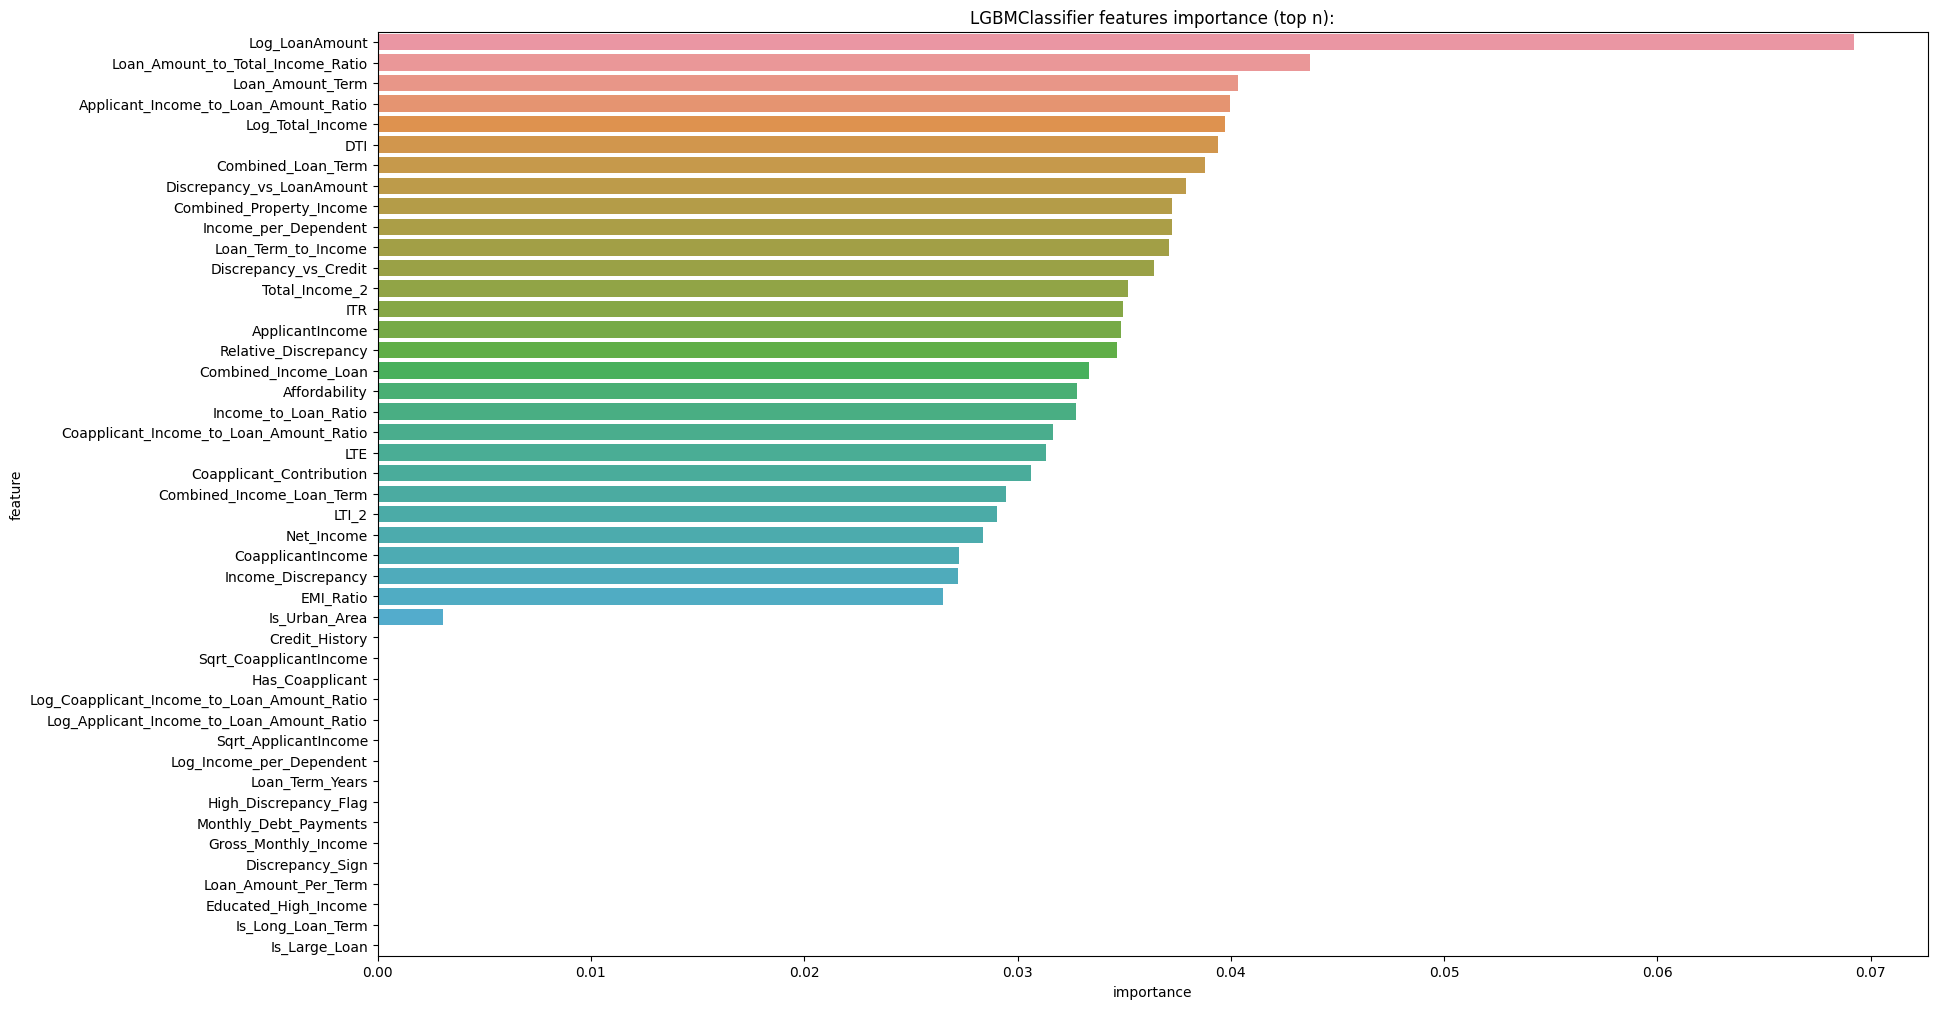

In [476]:
feature_importance_df = pd.DataFrame(classifier_XGB.feature_importances_, columns=['importance'])
feature_importance_df['feature'] = X_train.columns

plt.figure(figsize=(20, 12));
sns.barplot(x="importance", y="feature", data=feature_importance_df.sort_values(by = ['importance'], ascending = False).head(50))
plt.title('LGBMClassifier features importance (top n):');

In [477]:
# Provide range for max_depth from 1 to 20 with an interval of 2 and from 1 to 200 with an interval of 20 for n_estimators
paramgrid = {'max_depth': list(range(1, 20, 2)), 'n_estimators': list(range(1, 200, 20))}
#CV = 0.8329942065237705, LB= 0.83436

In [478]:
#  param_grid = {
#     'n_estimators': [100, 200],
#     'max_depth': [3, 5, 7],
#     'learning_rate': [0.01, 0.1, 0.2],
#     'subsample': [0.7, 1.0],
# }


In [479]:
# default 3-fold cross validation, cv=3
grid_search = GridSearchCV(XGBClassifier(random_state=1,enable_categorical=True), paramgrid)

In [480]:
# split the data
from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(X, y, test_size =0.3, random_state=1)

In [481]:
# # fit the grid search model
# grid_search.fit(x_train, y_train)

In [482]:
# # estimate the optimized value
# grid_search.best_estimator_

In [483]:
# mean_accuracy = []
# i=1
# kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
# for train_index,test_index in kf.split(X,y):
#     print('\n{} of kfold {}'.format(i,kf.n_splits))
#     xtr,xvl = X.loc[train_index],X.loc[test_index]
#     ytr,yvl = y[train_index],y[test_index]
    
#     model = XGBClassifier(random_state=1,enable_categorical=True, n_estimators=1, max_depth=1)
#     model.fit(xtr, ytr)
#     pred_test = model.predict(xvl)
#     score = accuracy_score(yvl,pred_test)
#     mean_accuracy.append(score)
#     print('accuracy_score',score)
#     i+=1
    
# print("\nMean validation accuracy: ", sum(mean_accuracy)/len(mean_accuracy))
# pred_test = model.predict(test)
# pred3 = model.predict_proba(test)[:,1]

In [484]:
# # filling Loan_Status with predictions
# sub['Loan_Status'] = pred_test            

# # filling Loan_ID with test Loan_ID
# sub['ID']=test_original['ID'] 

In [485]:
# # Converting submission file to .csv format
# sub.to_csv('XGBoost_Hyper_4_FE.csv', index=False)

In [486]:
# # extract feature importances, convert into a Series
# importances = pd.Series(model.feature_importances_, index=X.columns)

# # plot the horizontal bar chart
# importances.plot(kind='barh', figsize=(12,8))

In [487]:
# #Optuna Tunning
# import optuna
# import xgboost as xgb
# from sklearn.model_selection import cross_val_score

# #Objective function for Optuna
# def objective(trial):
#     param = {
#         'n_estimators': trial.suggest_int('n_estimators', 100, 400),
#         'max_depth': trial.suggest_int('max_depth', 3, 9),
#         #'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
#         #'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
#     }
    
#     rf_model = RandomForestClassifier(**param,random_state=2)
#     accuracy = cross_val_score(rf_model, x_train, y_train, cv=3, scoring='accuracy').mean()
    
#     return accuracy

# # Run Optuna
# study = optuna.create_study(direction="maximize")
# study.optimize(objective, n_trials=20)

# # Best parameters and best score
# print("Best parameters:", study.best_params)
# print("Best score:", study.best_value)


In [488]:
import optuna
import xgboost as xgb
from sklearn.model_selection import cross_val_score

# Objective function for Optuna
# def objective(trial):
#     param = {
#         'n_estimators': trial.suggest_int('n_estimators', 100, 400),
#         'max_depth': trial.suggest_int('max_depth', 3, 9),
#         'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
#         'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
#     }
    
#     xgb_model = xgb.XGBClassifier(**param,enable_categorical=True,random_state=2)
#     accuracy = cross_val_score(xgb_model, x_train, y_train, cv=3, scoring='accuracy').mean()
    
#     return accuracy

# # Run Optuna
# study = optuna.create_study(direction="maximize")
# study.optimize(objective, n_trials=20)

# # Best parameters and best score
# print("Best parameters:", study.best_params)
# print("Best score:", study.best_value)


In [489]:
# RandomForestClassifier(max_depth=11, n_estimators=121, random_state=1

In [490]:
# mean_accuracy = []
# i=1
# kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
# for train_index,test_index in kf.split(X,y):
#     print('\n{} of kfold {}'.format(i,kf.n_splits))
#     xtr,xvl = X.loc[train_index],X.loc[test_index]
#     ytr,yvl = y[train_index],y[test_index]
    
#     model = XGBClassifier( DMatrix = True,enable_categorical=True, random_state=1,
#                           n_estimators=220, max_depth=3,learning_rate=0.02063016934405066,subsample=0.7389243611130352)
#     model.fit(xtr, ytr)
#     pred_test = model.predict(xvl)
#     score = accuracy_score(yvl,pred_test)
#     mean_accuracy.append(score)
#     print('accuracy_score',score)
#     i+=1
    
# print("\nMean validation accuracy: ", sum(mean_accuracy)/len(mean_accuracy))
# pred_test = model.predict(test)
# pred3=model.predict_proba(test)

# # warnings.filterwarnings(action='ignore', category=DeprecationWarning)

In [491]:
# # filling Loan_Status with predictions
# sub['Loan_Status'] = pred_test            

# # filling Loan_ID with test Loan_ID
# sub['ID']=test_original['ID'] 

In [492]:
# # Converting submission file to .csv format
# sub.to_csv('XGBoost_Hyper_2.csv', index=False)

In [493]:
# # extract feature importances, convert into a Series
# importances = pd.Series(model.feature_importances_, index=X.columns)

# # plot the horizontal bar chart
# importances.plot(kind='barh', figsize=(12,8))

In [494]:
# Optuna='n_estimators': 220, 'max_depth': 3, 'learning_rate': 0.02063016934405066, 'subsample': 0.7389243611130352}

In [495]:
# %%time

# params_cb = {
    
#     'verbose': False,
#     'random_state': 1,
#     'task_type': 'CPU',
#     'min_data_in_leaf': 5,
#     'n_estimators': 1800,
#     'random_strength': 0.79,
#     'learning_rate':0.01,
#     'depth': 8,
#     'bagging_temperature': 0.6,
#     'l2_leaf_reg': 4,
#     'rsm': 0.6,
# }



In [496]:
from catboost import CatBoostClassifier

In [497]:
categorical_features = ['Gender','Married','Education','Self_Employed']

In [498]:
# mean_accuracy = []
# i=1
# kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
# for train_index,test_index in kf.split(X,y):
#     print('\n{} of kfold {}'.format(i,kf.n_splits))
#     xtr,xvl = X.loc[train_index],X.loc[test_index]
#     ytr,yvl = y[train_index],y[test_index]
    
#     model_CB = CatBoostClassifier(**params_cb)
#     model_CB.fit(xtr, ytr)
#     pred_test = model.predict(xvl)
#     score = accuracy_score(yvl,pred_test)
#     mean_accuracy.append(score)
#     print('accuracy_score',score)
#     i+=1
    
# print("\nMean validation accuracy: ", sum(mean_accuracy)/len(mean_accuracy))
# pred_test_CB = model_CB.predict(test)
# pred3=model_CB.predict_proba(test)

In [499]:
# from sklearn.model_selection import StratifiedKFold


# predictions_lgb = []
# scores = []
# i=0

# params = {'learning_rate': 0.185243125886494, 
#           'subsample': 0.2128564969905326, 
#           'colsample_bytree': 0.5046224462041669, 
#           'max_depth': 13, 
#           'scale_pos_weight': 4, 
#           'n_estimators': 995
#           }

# fold=StratifiedKFold(n_splits=10,shuffle=True, random_state=1)

# for train_index, test_index in fold.split(X,y):
#     X_train, X_test = X.iloc[train_index], X.iloc[test_index]
#     Y_train, Y_test = y[train_index], y[test_index]
#     classifier2 = LGBMClassifier(**params)
#     classifier2.fit(X_train, Y_train)
#     preds=classifier2.predict(X_test)
#     score = accuracy_score(Y_test,preds)
#     scores.append(score)
#     print("Accuracy: ", score) 
#     predictions_lgb.append(classifier2.predict(test))
#     i=i+1


# print("mean accuracy:",np.mean(scores))


In [500]:
# # filling Loan_Status with predictions
# sub['Target'] = pred_test_CB          

# # filling Loan_ID with test Loan_ID
# sub['ID']=test_original['ID'] 

In [501]:
# # Converting submission file to .csv format
# sub.to_csv('CatBoost_Hyper_2.csv', index=False)

In [502]:
# # extract feature importances, convert into a Series
# importances = pd.Series(model_CB.feature_importances_, index=X.columns)

# # plot the horizontal bar chart
# importances.plot(kind='barh', figsize=(12,8))

In [503]:
# categorical_features = ['Gender','Married','Education','Self_Employed']
# #Optuna Tunning
# import optuna
# import xgboost as xgb
# from sklearn.model_selection import cross_val_score

# #Objective function for Optuna
# def objective(trial):
#     param = {
#         'n_estimators': trial.suggest_int('n_estimators', 100, 400),
#         'max_depth': trial.suggest_int('max_depth', 3, 9),
#         'learning_rate':trial.suggest_int('learning_rate',1,9)
#         #'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
#         #'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
#     }
    
#     rf_model = CatBoostClassifier(cat_features=categorical_features,**param,random_state=2)
#     accuracy = cross_val_score(rf_model, x_train, y_train, cv=3, scoring='accuracy').mean()
    
#     return accuracy

# # Run Optuna
# study = optuna.create_study(direction="maximize")
# study.optimize(objective, n_trials=20)

# # Best parameters and best score
# print("Best parameters:", study.best_params)
# print("Best score:", study.best_value)

##  Light GBM Classifier

In [504]:
from sklearn.model_selection import StratifiedKFold


predictions_lg = []
scores = []
i=0

# params = {'learning_rate': 0.0185243125886494, 
#           'subsample': 0.2128564969905326, 
#           'verbose': -1,
#           'colsample_bytree': 0.5046224462041669, 
#           'max_depth': 5, 
#           'scale_pos_weight': 4, 
#           'n_estimators': 995
#        }
params: {
          'learning_rate': 0.04093975382268954,
             'num_leaves': 32, 
              'max_depth': 4,
             'feature_fraction': 0.97370847063221, 
             'bagging_fraction': 0.8792991333520006,
             'min_child_samples': 24,
             'n_estimators': 9095
        }
fold=StratifiedKFold(n_splits=10,shuffle=True, random_state=1)

for train_index, test_index in fold.split(X,y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    Y_train, Y_test = y[train_index], y[test_index]
    classifier2_LGBM = LGBMClassifier(**params,verbose=-1)
    classifier2_LGBM.fit(X_train, Y_train)
    preds=classifier2_LGBM.predict(X_test)
    score = accuracy_score(Y_test,preds)
    scores.append(score)
    print("Accuracy: ", score) 
    predictions_lg.append(classifier2_LGBM.predict(test))
    i=i+1


print("Mean accuracy:",np.mean(scores))

#Trial 652 finished with value: 0.9687548448537013 and parameters: {'learning_rate': 0.1805243125886494, 'subsample': 0.2128564969905326, 'colsample_bytree': 0.5046224462041669, 'max_depth': 13, 'scale_pos_weight': 6, 'n_estimators': 995}

Accuracy:  0.8084745762711865
Accuracy:  0.8186440677966101
Accuracy:  0.8186440677966101
Accuracy:  0.7915254237288135
Accuracy:  0.7915254237288135
Accuracy:  0.7966101694915254
Accuracy:  0.8033898305084746
Accuracy:  0.8067796610169492
Accuracy:  0.7962648556876061
Accuracy:  0.7928692699490663
Mean accuracy: 0.8024727345975655


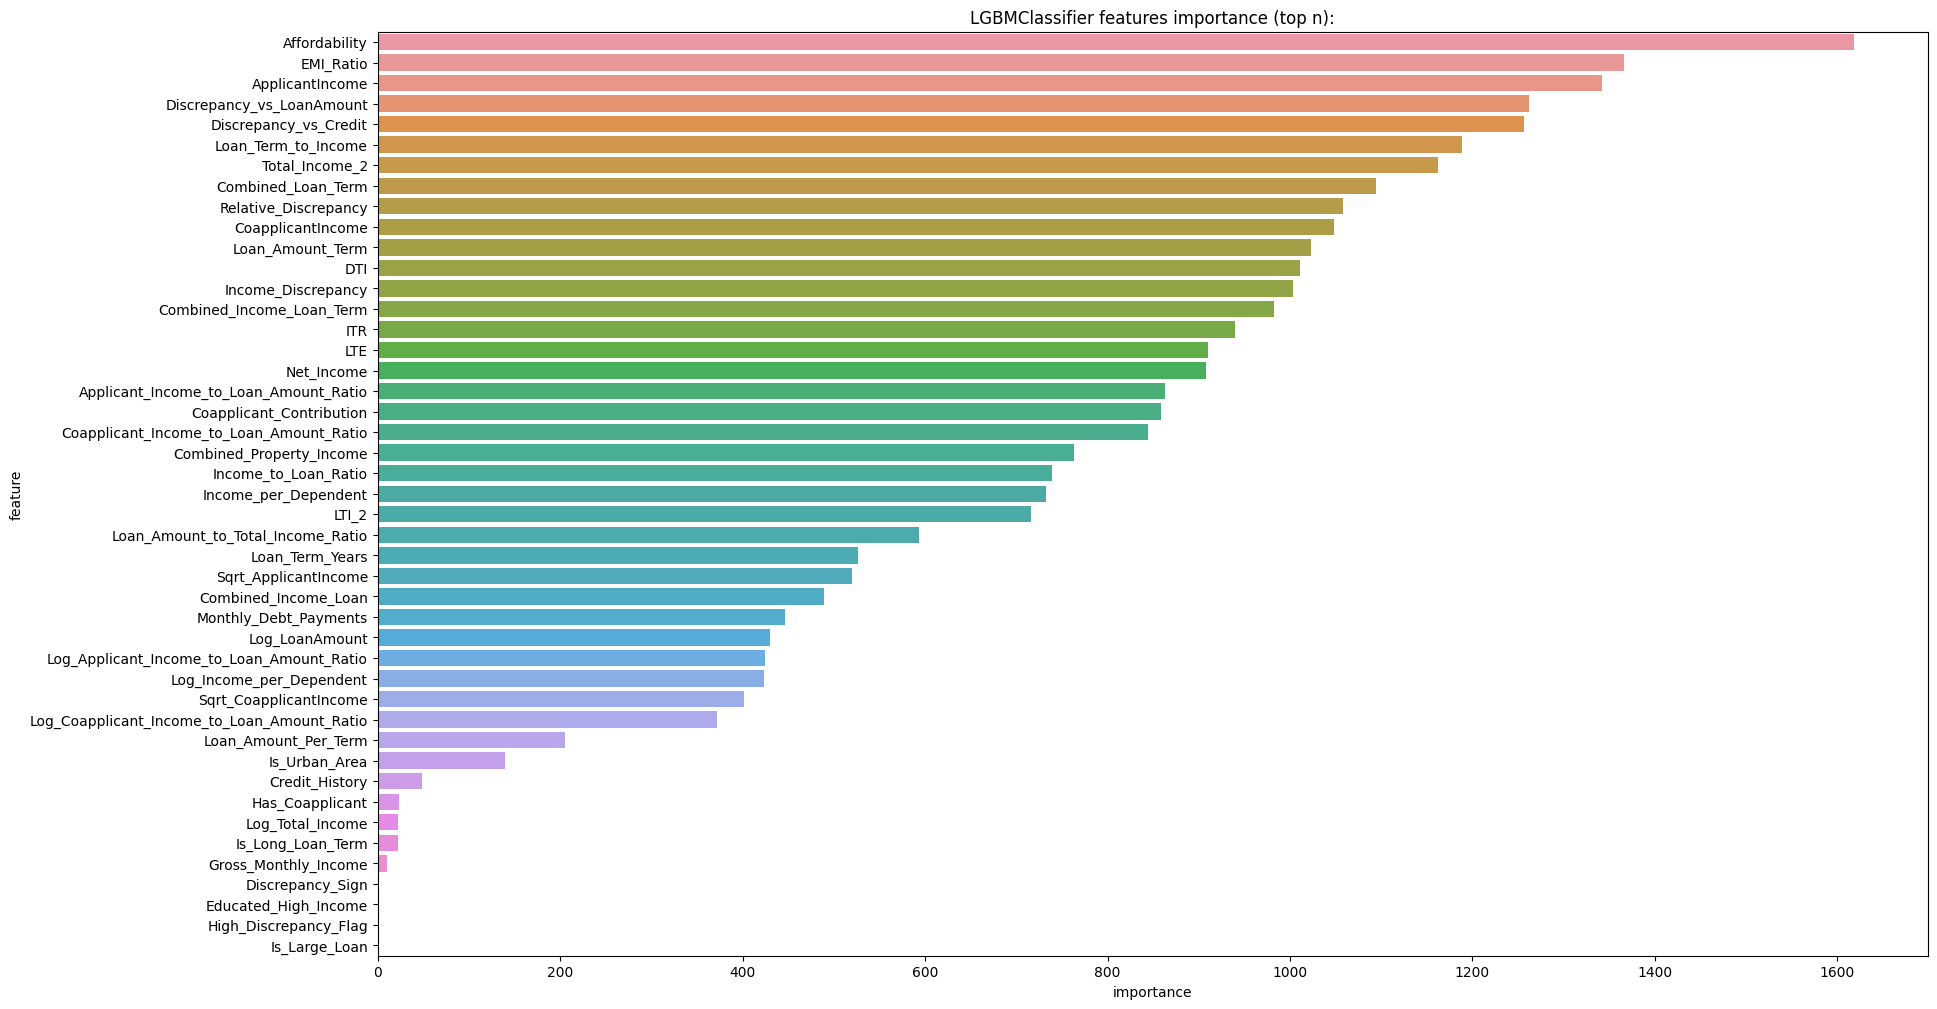

In [505]:
feature_importance_df = pd.DataFrame(classifier2_LGBM.feature_importances_, columns=['importance'])
feature_importance_df['feature'] = X_train.columns

plt.figure(figsize=(20, 12));
sns.barplot(x="importance", y="feature", data=feature_importance_df.sort_values(by = ['importance'], ascending = False).head(50))
plt.title('LGBMClassifier features importance (top n):');

In [506]:
print(feature_importance_df.sort_values(by = ['importance'], ascending = False).head(50))

    importance                                      feature
27        1618                                Affordability
26        1366                                    EMI_Ratio
0         1342                              ApplicantIncome
36        1262                    Discrepancy_vs_LoanAmount
35        1257                        Discrepancy_vs_Credit
41        1188                          Loan_Term_to_Income
7         1162                               Total_Income_2
23        1094                           Combined_Loan_Term
34        1058                         Relative_Discrepancy
1         1048                            CoapplicantIncome
2         1023                             Loan_Amount_Term
4         1011                                          DTI
31        1003                           Income_Discrepancy
24         983                    Combined_Income_Loan_Term
5          940                                          ITR
6          910                          

In [507]:
sub = sub.copy()
sub.head()
predictions_lg = pd.DataFrame(predictions_lg)
predictions_lg.T.head()

,0,1,2,3,4,5,6,7,8,9
0,1,1,0,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1,1,1
2,1,1,1,1,1,1,1,1,1,1
3,1,1,1,1,1,1,1,1,1,1
4,1,1,1,1,1,1,1,1,1,1


In [508]:
sub.head()

,ID,Target
0,70607,1
1,58412,1
2,88755,1
3,97271,1
4,70478,1


In [509]:
predictions_lg = predictions_lg.mode()
predictions_lg = predictions_lg.T
predictions_lg

,0,1
0,1.0,NaN
1,1.0,NaN
2,1.0,NaN
3,1.0,NaN
4,1.0,NaN
...,...,...
2523,1.0,NaN
2524,1.0,NaN
2525,1.0,NaN
2526,1.0,NaN


In [510]:
sub["Target"] = predictions_lg[0]
sub["ID"] = sub.ID
sub.head()

,ID,Target
0,70607,1.0
1,58412,1.0
2,88755,1.0
3,97271,1.0
4,70478,1.0


In [511]:
# Converting submission file to .csv format
sub.to_csv('LGB_1.csv', index=False)

In [512]:
train.head()

,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Loan_Status,DTI,ITR,LTE,Total_Income_2,Net_Income,...,Discrepancy_vs_Credit,Discrepancy_vs_LoanAmount,Income_to_Loan_Ratio,Loan_Amount_Per_Term,Combined_Property_Income,Is_Urban_Area,Loan_Term_to_Income,Educated_High_Income,Is_Long_Loan_Term,Is_Large_Loan
0,8328.0,0.000000,363,1,1,0.009366,489.882353,0.046832,8328.000000,5999.953168,...,-2328.000000,-129.333333,462.666667,0.046832,12000,1,0.060490,0,1,0
1,150.0,3857.458782,370,1,0,0.101622,21.316270,0.508108,4007.458782,5999.491892,...,1992.541218,10.542546,21.203486,0.508108,6000,0,0.061656,0,1,1
2,4989.0,314.472511,348,1,0,0.009770,311.968971,0.048851,5303.472511,5999.951149,...,696.527489,38.695972,294.637362,0.048851,0,0,0.057990,0,0,0
3,150.0,0.000000,359,1,1,0.206797,0.646552,0.646240,150.000000,3749.353760,...,3600.000000,15.450644,0.643777,0.646240,3750,0,0.095708,0,0,1
4,8059.0,0.000000,372,1,1,0.014624,474.058824,0.045699,8059.000000,3749.954301,...,-4309.000000,-239.388889,447.722222,0.045699,0,0,0.099174,0,1,0


In [513]:
categorical_features = ['Married','Self_Employed','Credit_History','Property_Area']

In [514]:

params = {'learning_rate': 0.0185243125886494, 
          'subsample': 0.6128564969905326, 
          
          #'colsample_bytree': 0.5046224462041669, 
          'max_depth': 10, 
          'scale_pos_weight': 7, 
          'n_estimators': 995
         }

In [515]:
from sklearn.model_selection import StratifiedKFold


predictions_cat= []
scores = []
i=0

params = {'learning_rate': 0.0185243125886494, 
          'subsample': 0.5046224462041669, 
          'verbose': False,
          
          #'colsample_bytree': 0.5046224462041669, 
          'max_depth': 5, 
          'scale_pos_weight': 4, 
          'n_estimators': 995
          }

fold=StratifiedKFold(n_splits=10,shuffle=True, random_state=1)

for train_index, test_index in fold.split(X,y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    Y_train, Y_test = y[train_index], y[test_index]
    classifier2 = CatBoostClassifier(**params)
    classifier2.fit(X_train, Y_train)
    preds=classifier2.predict(X_test)
    score = accuracy_score(Y_test,preds)
    scores.append(score)
    print("Accuracy: ", score) 
    predictions_cat.append(classifier2.predict(test))
    i=i+1


print("mean accuracy:",np.mean(scores))


Accuracy:  0.8338983050847457
Accuracy:  0.8338983050847457
Accuracy:  0.8338983050847457
Accuracy:  0.8322033898305085
Accuracy:  0.8322033898305085
Accuracy:  0.8322033898305085
Accuracy:  0.8322033898305085
Accuracy:  0.8322033898305085
Accuracy:  0.833616298811545
Accuracy:  0.833616298811545
mean accuracy: 0.832994446202987


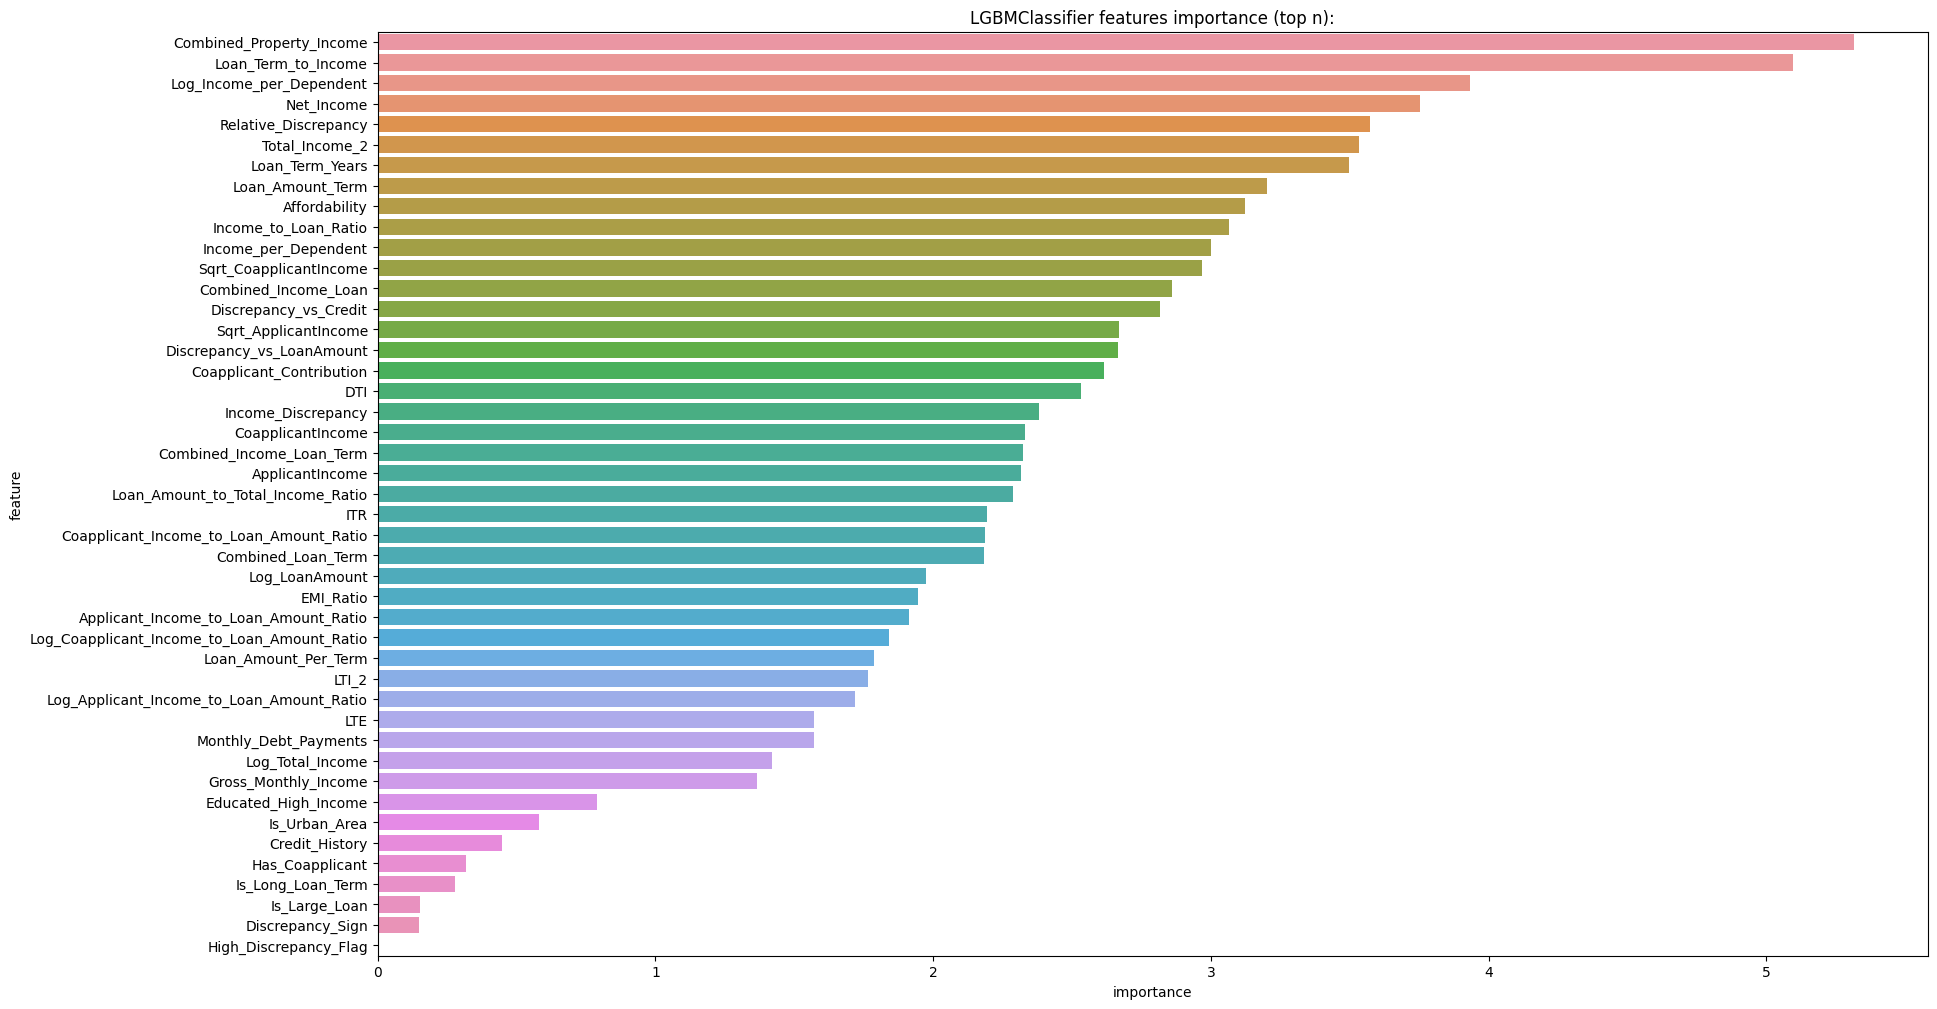

In [517]:
feature_importance_df = pd.DataFrame(classifier2.feature_importances_, columns=['importance'])
feature_importance_df['feature'] = X_train.columns

plt.figure(figsize=(20, 12));
sns.barplot(x="importance", y="feature", data=feature_importance_df.sort_values(by = ['importance'], ascending = False).head(50)
           )
plt.title('LGBMClassifier features importance (top n):');

In [255]:
predictions_cat

[array([1, 1, 1, ..., 1, 1, 1]),
 array([1, 1, 1, ..., 1, 1, 1]),
 array([1, 1, 1, ..., 1, 1, 1]),
 array([1, 1, 1, ..., 1, 1, 1]),
 array([1, 1, 1, ..., 1, 1, 1]),
 array([1, 1, 1, ..., 1, 1, 1]),
 array([1, 1, 1, ..., 1, 1, 1]),
 array([1, 1, 1, ..., 1, 1, 1]),
 array([1, 1, 1, ..., 1, 1, 1]),
 array([1, 1, 1, ..., 1, 1, 1])]

In [256]:
sub = sub.copy()
sub.head()
predictions = pd.DataFrame(predictions_cat)
predictions.T.head()

,0,1,2,3,4,5,6,7,8,9
0,1,1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1,1,1
2,1,1,1,1,1,1,1,1,1,1
3,1,1,1,1,1,1,1,1,1,1
4,1,1,1,1,1,1,1,1,1,1


In [257]:
predictions = predictions.mode()
predictions = predictions.T
predictions

,0
0,1
1,1
2,1
3,1
4,1
...,...
2523,1
2524,1
2525,1
2526,1


In [258]:
sub["Target"] = predictions[0]
sub["ID"] = sub.ID
sub.head()

,ID,Target
0,70607,1
1,58412,1
2,88755,1
3,97271,1
4,70478,1


In [259]:
# Converting submission file to .csv format
sub.to_csv('CatBoost_3.csv', index=False)

In [261]:
X.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'Loan_Amount_Term',
       'Credit_History', 'DTI', 'ITR', 'LTE', 'Total_Income_2', 'Net_Income',
       'Loan_Amount_to_Total_Income_Ratio',
       'Applicant_Income_to_Loan_Amount_Ratio',
       'Coapplicant_Income_to_Loan_Amount_Ratio', 'Log_Total_Income',
       'Log_LoanAmount', 'Income_per_Dependent', 'Has_Coapplicant',
       'Loan_Term_Years', 'Log_Applicant_Income_to_Loan_Amount_Ratio',
       'Log_Coapplicant_Income_to_Loan_Amount_Ratio',
       'Log_Income_per_Dependent', 'Sqrt_ApplicantIncome',
       'Sqrt_CoapplicantIncome', 'Combined_Income_Loan', 'Combined_Loan_Term',
       'Combined_Income_Loan_Term', 'LTI_2', 'EMI_Ratio', 'Affordability',
       'Coapplicant_Contribution', 'Monthly_Debt_Payments',
       'Gross_Monthly_Income', 'Income_Discrepancy', 'Discrepancy_Sign',
       'High_Discrepancy_Flag', 'Relative_Discrepancy',
       'Discrepancy_vs_Credit', 'Discrepancy_vs_LoanAmount',
       'Income_to_Loan_Ratio', 'Loan_

In [ ]:
train.head()

## Hyparameter Tunning

In [364]:
# X = train.copy()
from lightgbm import early_stopping, log_evaluation

def objective(trial):
    fold_pred=[]
    oof_pred = []


    param = {}
    param['objective'] = "binary"

    # param["learning_rate"] = trial.suggest_float("learning_rate", 1e-2, 0.25, log=True)
    #  #param['reg_lambda'] = trial.suggest_loguniform("reg_lambda", 1e-8, 100.0)
    #  #param['reg_alpha'] = trial.suggest_loguniform("reg_alpha", 1e-8, 100.0)
    # param['subsample'] = trial.suggest_float("subsample", 0.1, 1.0)
    # param['colsample_bytree'] = trial.suggest_float("colsample_bytree", 0.1, 1.0)
    # param['max_depth'] = trial.suggest_int("max_depth", 5, 20)
    # param['scale_pos_weight'] = trial.suggest_int('scale_pos_weight', 2,6)
    # param['n_estimators'] = trial.suggest_int('n_estimators', 400,1200)


    #["objective"]= trial.suggest_categorical("objective", ["binary", "multiclass"]),
    param["learning_rate"] =trial.suggest_float("learning_rate", 0.01, 0.3, log=True),
    param["num_leaves"]=trial.suggest_int("num_leaves", 20, 300),
    param["max_depth"]=trial.suggest_int("max_depth", -1, 15),
    param["feature_fraction"]= trial.suggest_float("feature_fraction", 0.6, 1.0),
    param["bagging_fraction"]= trial.suggest_float("bagging_fraction", 0.6, 1.0),
    param["min_child_samples"]= trial.suggest_int("min_child_samples", 5, 50),
    


    fold=StratifiedKFold(n_splits=8,shuffle=True, random_state=42) #15#5#10 
    i=1
    for train_index, test_index in fold.split(X,y):
        
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        # m2 = CatBoostRegressor(**param)
        m2 = LGBMClassifier(**param)

        m2.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_test, y_test)], callbacks=[log_evaluation(1200)])#erly100
        preds=m2.predict(X_test)
        oof_pred.append(accuracy_score(y_test,preds))

    return np.mean(oof_pred)

In [ ]:
!pip install optuna -qq

In [357]:
import optuna

In [1]:
# study = optuna.create_study(direction="maximize")
# study.optimize(objective, n_trials=1000)

In [ ]:
trial.params   best params

# Ensemble

## Blending

In [518]:
########################################################################################
# Gradient Boosting Classifier - Base
########################################################################################

model = GradientBoostingClassifier(n_estimators=90, max_depth=3, random_state=8) 
model.fit(x_train,y_train)
gb_pred = model.predict(test)

##########################################################################################
# Gradient Boost Classifier - Edge Cases
#########################################################################################

model = GradientBoostingClassifier(n_estimators=100, max_depth=3, random_state=23) 
model.fit(x_train,y_train)
GB2_pred = model.predict(test)
# gb_pred2 = []
# for pp in p_pred:
#     if 0.48 < pp[1] < 0.5:
#         gb_pred2.append(1)
#     else:
#         gb_pred2.append(0)
###########################################################################################
# XGB - Edge Cases
##########################################################################################

model= xgb.XGBClassifier(seed=3)
model.fit(x_train, y_train)
xgb_pred = model.predict(test)

# xgb_pred = []
# for pp in p_pred:
#     if 0.49 < pp[1] < 0.5:
#         xgb_pred.append(1)
#     else:
#         xgb_pred.append(0)

##########################################################################################
# Random Forests - Base
#########################################################################################

model = RandomForestClassifier(random_state=3, n_estimators=20)
model.fit(x_train, y_train)
rf_pred = model.predict(test)


############################################################################################
#Clean Datast by removing redundant columns
###########################################################################################

# comb_ = comb.drop(redundant, axis=1)
# train = comb_[:seps]
# test = comb_[seps:]
# train.fillna(method="ffill", inplace=True)
# train.dropna(inplace=True)
# train.reset_index(drop=True, inplace=True)
# y_train = train['depressed']
# x_train = train.drop(labels=['depressed'], axis=1)
# x_test = test.drop(labels=['depressed'], axis=1)

###########################################################################################
# Gradient Boost with Clean Dataset
###########################################################################################

model = GradientBoostingClassifier(n_estimators=100, max_depth=3, random_state=23) 
model.fit(x_train,y_train)
GB3_pred = model.predict(test)
# gb_pred3 = []
# for pp in p_pred:
#     if 0.484 < pp[1] < 0.5:
#         gb_pred3.append(1)
#     else:
#         gb_pred3.append(0)
        
###########################################################################################
# Blending the Models
###########################################################################################

blend = []
for p in range(len(gb_pred)):
    if (gb_pred[p] > 0) & (GB2_pred[p] > 0) | (xgb_pred[p] > 0) | (rf_pred[p] > 0) |(GB3_pred [p] > 0):
        blend.append(1)
    else:
        blend.append(0)

# submiss = pd.DataFrame({"surveyid": sub['ID'],  "Target": blend})
# submiss = submiss[['ID', 'Target']]
# submiss.to_csv("Blending.csv", index = False)

In [519]:
# Converting submission file to .csv format
sub.to_csv('Bleding_3.csv', index=False)

In [520]:
sub["Target"] = blend
sub["ID"] = sub.ID
sub.head()

,ID,Target
0,70607,1
1,58412,1
2,88755,1
3,97271,1
4,70478,1


### Bagging

In [521]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

mean_accuracy = []
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    
    model_BB =  BaggingClassifier(base_estimator=  XGBClassifier( DMatrix = True,enable_categorical=True, random_state=1,
                          n_estimators=220, max_depth=3,learning_rate=0.02063016934405066,subsample=0.7389243611130352), n_estimators=50, random_state=42)
    model_BB.fit(xtr, ytr)
    pred_test = model_BB.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    mean_accuracy.append(score)
    print('accuracy_score',score)
    i+=1
    
print("\nMean validation accuracy: ", sum(mean_accuracy)/len(mean_accuracy))
pred_test_BB = model_BB.predict(test)
pred3=model_BB.predict_proba(test)


1 of kfold 5
accuracy_score 0.8330508474576271

2 of kfold 5
accuracy_score 0.8330508474576271

3 of kfold 5
accuracy_score 0.8330508474576271

4 of kfold 5
accuracy_score 0.8329092451229856

5 of kfold 5
accuracy_score 0.8329092451229856

Mean validation accuracy:  0.8329942065237705


In [522]:
# filling Loan_Status with predictions
sub['Target'] = pred_test_BB          

# filling Loan_ID with test Loan_ID
sub['ID']=test_original['ID'] 

In [523]:
# Converting submission file to .csv format
sub.to_csv('ESEM_BB_3.csv', index=False)

In [524]:
# from sklearn.ensemble import VotingClassifier
# from sklearn.linear_model import LogisticRegression
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier

# # Define base models
# model1 = LogisticRegression()
# model2 = DecisionTreeClassifier()
# model3 = RandomForestClassifier()

# # Define voting classifier
# voting_model = VotingClassifier(estimators=[('lr', model_LR), 
#                                             ('dt', model_DT), ('rf', model_RF),
#                                             ('ADA',model_Ada),('GB',model_XGB),('CAT',model_CB)], voting='hard')
# voting_model.fit(x_train, y_train)

## Voting


In [525]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [526]:
mean_accuracy = []
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    
    voting_model = VotingClassifier(estimators=[('lr', classifier_LR), 
                                            ('dt', classifier_DT), ('rf', classifier_AB),
                                            ('ADA',classifier_AB),('GB',classifier_XGB),('CAT',classifier2)], voting='soft')
    voting_model.fit(xtr, ytr)
    pred_test = voting_model.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    mean_accuracy.append(score)
    print('accuracy_score',score)
    i+=1
    
print("\nMean validation accuracy: ", sum(mean_accuracy)/len(mean_accuracy))
pred_test_VT =voting_model.predict(test)
#pred3= voting_model.predict_proba(test)


1 of kfold 5
accuracy_score 0.7974576271186441

2 of kfold 5
accuracy_score 0.7966101694915254

3 of kfold 5
accuracy_score 0.7847457627118644

4 of kfold 5
accuracy_score 0.8006785411365565

5 of kfold 5
accuracy_score 0.7862595419847328

Mean validation accuracy:  0.7931503284886647


In [527]:
# filling Loan_Status with predictions
sub['Target'] = pred_test_VT         

# filling Loan_ID with test Loan_ID
sub['ID']=test_original['ID']

In [528]:
# Converting submission file to .csv format
sub.to_csv('ESRM_VT_5.csv', index=False)

# Stacking

In [529]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from lightgbm import LGBMClassifier

# Assuming train_df, test_df, and target variable `Loan_Status` are defined
X_train = train.drop(columns=['Loan_Status'])
y_train = train['Loan_Status']
X_test = test.copy()

# Define base models
base_models = [
    RandomForestClassifier(n_estimators=100, random_state=42),
    LGBMClassifier(n_estimators=100, random_state=42),
    # Add more models as needed
    classifier_LR,classifier_RF,classifier_RF2,
    classifier_AB,classifier_KN,classifier_GB,
    classifier_KN,classifier_GB,classifier_NB,
    classifier_XGB,classifier2_LGBM,classifier2
]

# First-level predictions
train_meta = np.zeros((X_train.shape[0], len(base_models)))
test_meta = np.zeros((X_test.shape[0], len(base_models)))

kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Generate predictions from base models
for i, model in enumerate(base_models):
    test_fold_preds = []
    for train_idx, val_idx in kf.split(X_train, y_train):
        X_fold_train, X_fold_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
        y_fold_train, y_fold_val = y_train.iloc[train_idx], y_train.iloc[val_idx]
        
        # Train the model
        model.fit(X_fold_train, y_fold_train)
        
        # Predict on validation set
        train_meta[val_idx, i] = model.predict(X_fold_val)
        
        # Predict on test set
        test_fold_preds.append(model.predict(X_test))
    
    # Average test set predictions across folds
    test_meta[:, i] = np.mean(test_fold_preds, axis=0)

# Second-level model
# stacking_model = LogisticRegression(random_state=42)
stacking_model = classifier2
stacking_model.fit(train_meta, y_train)

# Make predictions on the test set
stacking_preds = stacking_model.predict(test_meta)

# Create a submission file
submission = pd.DataFrame({'ID': test_df['ID'], 'Target': stacking_preds})

# Ensure submission file matches the required format
submission['Target'] = submission['Target'].map({1: 1, 0: 0})  # Convert to expected output labels
submission.to_csv('submission_stack.csv', index=False)


[LightGBM] [Info] Number of positive: 3920, number of negative: 798
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001928 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8052
[LightGBM] [Info] Number of data points in the train set: 4718, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.830861 -> initscore=1.591738
[LightGBM] [Info] Start training from score 1.591738
[LightGBM] [Info] Number of positive: 3959, number of negative: 759
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001816 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8050
[LightGBM] [Info] Number of data points in the train set: 4718, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.839127 -> initscore=1.651745
[LightGBM] [Info] Start training from score 1.651745
[LightGBM] [Info] Number

In [530]:
#Accuracy of stacked model
from sklearn.metrics import accuracy_score

# Evaluate the stacked model using the training meta-features
stacking_train_preds = stacking_model.predict(train_meta)

# Calculate accuracy on the training data
stacked_model_accuracy = accuracy_score(y_train, stacking_train_preds)

print(f"Accuracy of the stacked model on training data: {stacked_model_accuracy:.4f}")


Accuracy of the stacked model on training data: 0.8337
